In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
'''
우리가 정보를 수집한 인터파크에서는 뮤지컬 장르를 오리지널, 라이선스, 창작, 어린이/가족 등으로 나눕니다.
이는 영화도 로맨스만 좋아하는 사람이 있거나 SF를 좋아하는 사람이 있듯이, 뮤지컬 또한 해당 방식으로 분류한 장르에 대해서
고정된 수요가 존재함을 의미합니다.

우리는 2014년 ~ 2021년의 뮤지컬 자료를 수집하였습니다.
출처는 PlayDB와 인터파크이고, 뮤지컬의 장르, 상연기간, 예매자 성별/연령별 통계, 평점, 평점 수 등을 모았습니다.

현 문서의 내용은 Cold Start 상황에서 그나마 최대한 사용자에게 어울릴만한 추천을 해주는 것을 목표로 하고 있습니다.
이용자들의 개별화된 데이터가 없기 때문에 수집한 데이터를 활용하여 이용자를 적절한 군집에 포함시켜야 합니다.
확보한 데이터 내에서 사용자를 가를 수 있는 항목은 성별과 연령대가 있겠습니다.

장르와 성별, 연령대의 상관관계를 알아보기 위해 우선 2019년 자료를 분석해보았습니다.
'''

'\n우리가 정보를 수집한 인터파크에서는 뮤지컬 장르를 오리지널, 라이선스, 창작, 어린이/가족 등으로 나눕니다.\n이는 영화도 로맨스만 좋아하는 사람이 있거나 SF를 좋아하는 사람이 있듯이, 뮤지컬 또한 해당 방식으로 분류한 장르에 대해서\n고정된 수요가 존재함을 의미합니다.\n\n우리는 2014년 ~ 2021년의 뮤지컬 자료를 수집하였습니다.\n출처는 PlayDB와 인터파크이고, 뮤지컬의 장르, 상연기간, 예매자 성별/연령별 통계, 평점, 평점 수 등을 모았습니다.\n\n현 문서의 내용은 Cold Start 상황에서 그나마 최대한 사용자에게 어울릴만한 추천을 해주는 것을 목표로 하고 있습니다.\n이용자들의 개별화된 데이터가 없기 때문에 수집한 데이터를 활용하여 이용자를 적절한 군집에 포함시켜야 합니다.\n확보한 데이터 내에서 사용자를 가를 수 있는 항목은 성별과 연령대가 있겠습니다.\n\n장르와 성별, 연령대의 상관관계를 알아보기 위해 우선 2019년 자료를 분석해보았습니다.\n'

# 뮤지컬 장르별 분석

In [3]:
df = pd.read_excel('musical_2019_mod.xlsx', engine = 'openpyxl')
df['genre'].unique()

array(['라이선스', '창작', '뮤지컬', '어린이/가족', '퍼포먼스', '오리지널'], dtype=object)

In [4]:
# 장르별로 구분

df_a = df[df['genre'] == '라이선스']
df_b = df[df['genre'] == '창작']
df_c = df[df['genre'] == '뮤지컬']
df_d = df[df['genre'] == '어린이/가족']
df_e = df[df['genre'] == '퍼포먼스']
df_f = df[df['genre'] == '오리지널']

### 라이선스
- 해외 원작자에게 저작료를 지급하고 판권을 사들인 뒤 우리말로 공연하는 것

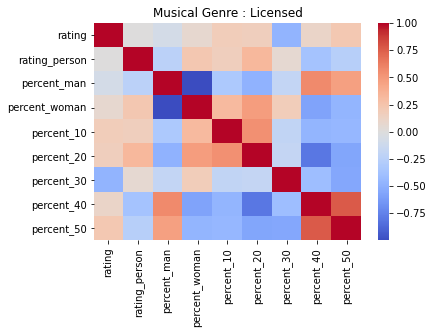

라이선스 뮤지컬 10대 비율 :  4.27
라이선스 뮤지컬 20대 비율 :  29.82
라이선스 뮤지컬 30대 비율 :  33.01
라이선스 뮤지컬 40대 비율 :  23.38
라이선스 뮤지컬 50대 비율 :  8.06


라이선스 뮤지컬 남성 비율 :  20.13
라이선스 뮤지컬 여성 비율 :  79.87


In [5]:
sns.heatmap(df_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
df_a_10 = np.round(df_a['percent_10'].mean(), 2)
df_a_20 = np.round(df_a['percent_20'].mean(), 2)
df_a_30 = np.round(df_a['percent_30'].mean(), 2)
df_a_40 = np.round(df_a['percent_40'].mean(), 2)
df_a_50 = np.round(df_a['percent_50'].mean(), 2)
df_a_m = np.round(df_a['percent_man'].mean(), 2)
df_a_w = np.round(df_a['percent_woman'].mean(), 2)
print("라이선스 뮤지컬 10대 비율 : ", df_a_10)
print("라이선스 뮤지컬 20대 비율 : ", df_a_20)
print("라이선스 뮤지컬 30대 비율 : ", df_a_30)
print("라이선스 뮤지컬 40대 비율 : ", df_a_40)
print("라이선스 뮤지컬 50대 비율 : ", df_a_50)
print('\n')
print("라이선스 뮤지컬 남성 비율 : ", df_a_m)
print("라이선스 뮤지컬 여성 비율 : ", df_a_w)

### 창작

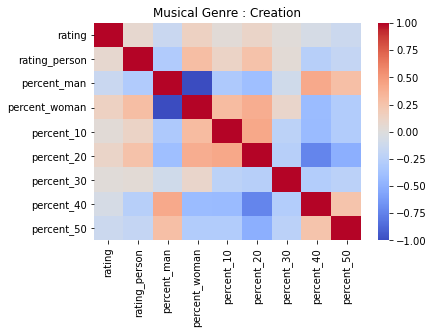

창작 뮤지컬 10대 비율 :  4.53
창작 뮤지컬 20대 비율 :  31.23
창작 뮤지컬 30대 비율 :  32.05
창작 뮤지컬 40대 비율 :  23.41
창작 뮤지컬 50대 비율 :  7.19


창작 뮤지컬 남성 비율 :  22.66
창작 뮤지컬 여성 비율 :  77.34


In [6]:
sns.heatmap(df_b.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
df_b_10 = np.round(df_b['percent_10'].mean(), 2)
df_b_20 = np.round(df_b['percent_20'].mean(), 2)
df_b_30 = np.round(df_b['percent_30'].mean(), 2)
df_b_40 = np.round(df_b['percent_40'].mean(), 2)
df_b_50 = np.round(df_b['percent_50'].mean(), 2)
df_b_m = np.round(df_b['percent_man'].mean(), 2)
df_b_w = np.round(df_b['percent_woman'].mean(), 2)
print("창작 뮤지컬 10대 비율 : ", df_b_10)
print("창작 뮤지컬 20대 비율 : ", df_b_20)
print("창작 뮤지컬 30대 비율 : ", df_b_30)
print("창작 뮤지컬 40대 비율 : ", df_b_40)
print("창작 뮤지컬 50대 비율 : ", df_b_50)
print('\n')
print("창작 뮤지컬 남성 비율 : ", df_b_m)
print("창작 뮤지컬 여성 비율 : ", df_b_w)

### 뮤지컬

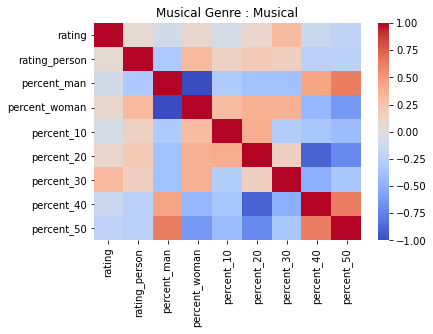

뮤지컬 뮤지컬 10대 비율 :  3.8
뮤지컬 뮤지컬 20대 비율 :  35.04
뮤지컬 뮤지컬 30대 비율 :  32.02
뮤지컬 뮤지컬 40대 비율 :  21.41
뮤지컬 뮤지컬 50대 비율 :  6.27


뮤지컬 뮤지컬 남성 비율 :  15.88
뮤지컬 뮤지컬 여성 비율 :  84.12


In [7]:
sns.heatmap(df_c.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
df_c_10 = np.round(df_c['percent_10'].mean(), 2)
df_c_20 = np.round(df_c['percent_20'].mean(), 2)
df_c_30 = np.round(df_c['percent_30'].mean(), 2)
df_c_40 = np.round(df_c['percent_40'].mean(), 2)
df_c_50 = np.round(df_c['percent_50'].mean(), 2)
df_c_m = np.round(df_c['percent_man'].mean(), 2)
df_c_w = np.round(df_c['percent_woman'].mean(), 2)
print("뮤지컬 뮤지컬 10대 비율 : ", df_c_10)
print("뮤지컬 뮤지컬 20대 비율 : ", df_c_20)
print("뮤지컬 뮤지컬 30대 비율 : ", df_c_30)
print("뮤지컬 뮤지컬 40대 비율 : ", df_c_40)
print("뮤지컬 뮤지컬 50대 비율 : ", df_c_50)
print('\n')
print("뮤지컬 뮤지컬 남성 비율 : ", df_c_m)
print("뮤지컬 뮤지컬 여성 비율 : ", df_c_w)

### 어린이/가족

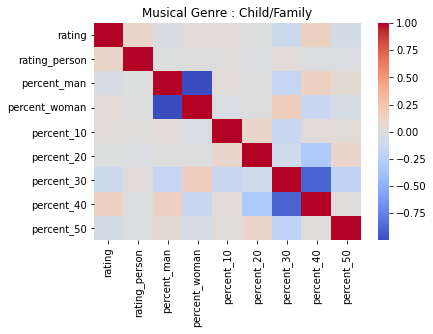

어린이/가족 뮤지컬 10대 비율 :  0.16
어린이/가족 뮤지컬 20대 비율 :  4.27
어린이/가족 뮤지컬 30대 비율 :  72.02
어린이/가족 뮤지컬 40대 비율 :  22.13
어린이/가족 뮤지컬 50대 비율 :  0.83


어린이/가족 뮤지컬 남성 비율 :  20.96
어린이/가족 뮤지컬 여성 비율 :  79.04


In [8]:
sns.heatmap(df_d.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_d_10 = np.round(df_d['percent_10'].mean(), 2)
df_d_20 = np.round(df_d['percent_20'].mean(), 2)
df_d_30 = np.round(df_d['percent_30'].mean(), 2)
df_d_40 = np.round(df_d['percent_40'].mean(), 2)
df_d_50 = np.round(df_d['percent_50'].mean(), 2)
df_d_m = np.round(df_d['percent_man'].mean(), 2)
df_d_w = np.round(df_d['percent_woman'].mean(), 2)
print("어린이/가족 뮤지컬 10대 비율 : ", df_d_10)
print("어린이/가족 뮤지컬 20대 비율 : ", df_d_20)
print("어린이/가족 뮤지컬 30대 비율 : ", df_d_30)
print("어린이/가족 뮤지컬 40대 비율 : ", df_d_40)
print("어린이/가족 뮤지컬 50대 비율 : ", df_d_50)
print('\n')
print("어린이/가족 뮤지컬 남성 비율 : ", df_d_m)
print("어린이/가족 뮤지컬 여성 비율 : ", df_d_w)

### 퍼포먼스

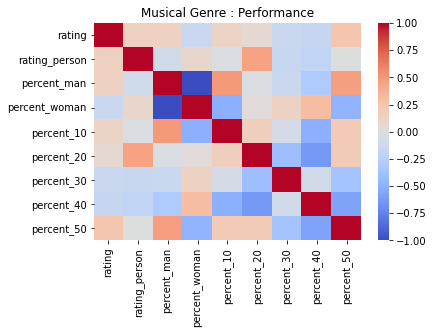

퍼포먼스 뮤지컬 10대 비율 :  2.02
퍼포먼스 뮤지컬 20대 비율 :  10.46
퍼포먼스 뮤지컬 30대 비율 :  34.98
퍼포먼스 뮤지컬 40대 비율 :  43.1
퍼포먼스 뮤지컬 50대 비율 :  7.71


퍼포먼스 뮤지컬 남성 비율 :  31.85
퍼포먼스 뮤지컬 여성 비율 :  68.15


In [9]:
sns.heatmap(df_e.corr(), cmap='coolwarm')
plt.title('Musical Genre : Performance')
plt.show()
df_e_10 = np.round(df_e['percent_10'].mean(), 2)
df_e_20 = np.round(df_e['percent_20'].mean(), 2)
df_e_30 = np.round(df_e['percent_30'].mean(), 2)
df_e_40 = np.round(df_e['percent_40'].mean(), 2)
df_e_50 = np.round(df_e['percent_50'].mean(), 2)
df_e_m = np.round(df_e['percent_man'].mean(), 2)
df_e_w = np.round(df_e['percent_woman'].mean(), 2)
print("퍼포먼스 뮤지컬 10대 비율 : ", df_e_10)
print("퍼포먼스 뮤지컬 20대 비율 : ", df_e_20)
print("퍼포먼스 뮤지컬 30대 비율 : ", df_e_30)
print("퍼포먼스 뮤지컬 40대 비율 : ", df_e_40)
print("퍼포먼스 뮤지컬 50대 비율 : ", df_e_50)
print('\n')
print("퍼포먼스 뮤지컬 남성 비율 : ", df_e_m)
print("퍼포먼스 뮤지컬 여성 비율 : ", df_e_w)

### 오리지널

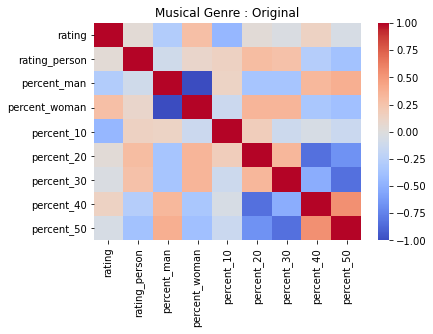

오리지널 뮤지컬 10대 비율 :  1.29
오리지널 뮤지컬 20대 비율 :  22.38
오리지널 뮤지컬 30대 비율 :  30.79
오리지널 뮤지컬 40대 비율 :  28.76
오리지널 뮤지컬 50대 비율 :  14.35


오리지널 뮤지컬 남성 비율 :  31.85
오리지널 뮤지컬 여성 비율 :  68.15


In [10]:
sns.heatmap(df_f.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
df_f_10 = np.round(df_f['percent_10'].mean(), 2)
df_f_20 = np.round(df_f['percent_20'].mean(), 2)
df_f_30 = np.round(df_f['percent_30'].mean(), 2)
df_f_40 = np.round(df_f['percent_40'].mean(), 2)
df_f_50 = np.round(df_f['percent_50'].mean(), 2)
df_f_m = np.round(df_e['percent_man'].mean(), 2)
df_f_w = np.round(df_e['percent_woman'].mean(), 2)
print("오리지널 뮤지컬 10대 비율 : ", df_f_10)
print("오리지널 뮤지컬 20대 비율 : ", df_f_20)
print("오리지널 뮤지컬 30대 비율 : ", df_f_30)
print("오리지널 뮤지컬 40대 비율 : ", df_f_40)
print("오리지널 뮤지컬 50대 비율 : ", df_f_50)
print('\n')
print("오리지널 뮤지컬 남성 비율 : ", df_f_m)
print("오리지널 뮤지컬 여성 비율 : ", df_f_w)

### 위 내용을 분석한 결과 다음의 내용을 알 수 있습니다.
- 관객의 성별 비율은 항상 서로 강한 음의 상관관계를 가진다.
- 한정된 자리수를 놓고 한쪽이 늘면 다른쪽이 주는 상황이 생길 때 음의 상관관계가 생긴다.
- 연령대에서도 유사한 원리를 바탕으로 같은 분석을 할 수 있다.
- 다만 성별에 대한 상관계수는 어떤 상황에서도 -1의 상관계수밖에 못가지기 때문에 분석에 활용하기가 부적절하다.
- 뮤지컬을 예매한 관객 통계의 평균치를 내보면 좀 더 수치적인 비교가 가능할 것이다.

#### 1) 성별
- 남성의 경우 오리지널, 퍼포먼스 장르에서 비율이 30%대로 높았고, 뮤지컬 장르에서 15%대로 낮았으며, 나머지는 20% 초반대였다.
- 제로섬 게임이므로 여성은 이와 정확히 반대되는 결과를 가진다.

#### 2) 연령별
- 대부분 20대, 30대, 40대가 주요 고객층이나, 세부 장르에 따라 차이가 존재한다.
- 라이선스, 창작의 경우 20, 30, 40대가 각각 3:3:2 비율로 관객을 구성한다.
- 어린이/가족의 경우 타 연령대는 거의 없고 30대, 40대가 7:2 비율로 대부분을 차지한다.
- 퍼포먼스의 경우 20대의 참여율이 10%대로 떨어지며, 대신 40대가 40% 이상을 차지한다.
- 오리지널의 경우 50대의 비율이 14%에 달하며, 30대, 40대가 각각 30% 가량을 차지한다.

연령대별 교차구간이 붉은색을 띨 수록 해당 연령대끼리는 관심사가 비슷한 반면, 파란색을 띨 수록 공연마다 연령대별로 취향을 많이 타거나, 같은 자리를 두고 경쟁하는 강도가 높아진다고 볼 수 있습니다. 이는 다른 측면으로 그만큼 해당 뮤지컬 장르가 대중적임을 의미합니다. 왜냐하면 애당초 경쟁에 참가 자체를 안할 경우 히트맵에서는 매우 옅은 색상으로 표시가 되기 때문입니다.

그 외에, 영향을 줄 수 있는 인자로 다음을 검토해보았습니다.
-
- 요인 : 표값, 극장 종류, 입장 가능 연령
-
- 입장 제한이 10세 이하인 경우 40대가 다른 뮤지컬에 비해 증가하는 경향이 약하게 있으나, 아닌 경우도 많음.
- 이런 경우가 진성 뮤지컬 팬들이나 특정 배우의 팬이 몰리는 뮤지컬일때 예외가 많이 발생함.
- 그 외에는 표값이나 입장 연령과 이렇다할 상관관계가 보이지 않음.

- 극장 종류의 경우 어떤 상관성이 있어는 보이는데, 각 극장의 규모, 시내상의 위치, 인근 상권 등의 정보를 알지 못하는 한계가 있으나, 이름있는 라이선스, 오리지널 등이 주로 대형 극장에서 선보이므로 간접적인 정보를 통해 유추할 수 있음.
-
- 하지만 표값은 이미 폐막한 극의 경우 정보를 알 수 없고, 극장 종류 또한 대형 극장 몇 곳을 제외하면 객석 정보가 없는 곳이 많음
- 이는 결국 표값이 비쌀 것으로 추정되는 대형극(오리지널, 라이선스, 일부 창작 등)이 열릴 수 있는 대형 극장 정보와 연관됨
-
- 따라서 정보를 모으기가 번거롭고 그 양도 제한적인 위 정보는 사용하지 않기로 하였습니다.

# 이전 연도 자료 취합
- 시간이 지날수록 달라지는 경향이 있는지 확인하기 위해 2014년부터 자료를 취합했습니다.

### 연도별 파일 취합

In [11]:
df_2021 = pd.read_excel('musical_2_mod.xlsx', engine = 'openpyxl')
df_2019 = pd.read_excel('musical_2019_mod.xlsx', engine = 'openpyxl')
df_2018 = pd.read_excel('musical_2018_mod.xlsx', engine = 'openpyxl')
df_2017 = pd.read_excel('musical_2017_mod.xlsx', engine = 'openpyxl')
df_2016 = pd.read_excel('musical_2016_mod.xlsx', engine = 'openpyxl')
df_2015 = pd.read_excel('musical_2015_mod.xlsx', engine = 'openpyxl')
df_2014 = pd.read_excel('musical_2014_mod.xlsx', engine = 'openpyxl')

### 장르별 분리

In [12]:
df_2021_a = df_2021[df_2021['genre'] == '라이선스']
df_2021_b = df_2021[df_2021['genre'] == '창작']
df_2021_c = df_2021[df_2021['genre'] == '뮤지컬']
df_2021_d = df_2021[df_2021['genre'] == '어린이/가족']
df_2021_e = df_2021[df_2021['genre'] == '퍼포먼스']
df_2021_f = df_2021[df_2021['genre'] == '오리지널']
###
df_2019_a = df_2019[df_2019['genre'] == '라이선스']
df_2019_b = df_2019[df_2019['genre'] == '창작']
df_2019_c = df_2019[df_2019['genre'] == '뮤지컬']
df_2019_d = df_2019[df_2019['genre'] == '어린이/가족']
df_2019_e = df_2019[df_2019['genre'] == '퍼포먼스']
df_2019_f = df_2019[df_2019['genre'] == '오리지널']
####
df_2018_a = df_2018[df_2018['genre'] == '라이선스']
df_2018_b = df_2018[df_2018['genre'] == '창작']
df_2018_c = df_2018[df_2018['genre'] == '뮤지컬']
df_2018_d = df_2018[df_2018['genre'] == '어린이/가족']
df_2018_e = df_2018[df_2018['genre'] == '퍼포먼스']
df_2018_f = df_2018[df_2018['genre'] == '오리지널']
###
df_2017_a = df_2017[df_2017['genre'] == '라이선스']
df_2017_b = df_2017[df_2017['genre'] == '창작']
df_2017_c = df_2017[df_2017['genre'] == '뮤지컬']
df_2017_d = df_2017[df_2017['genre'] == '어린이/가족']
df_2017_e = df_2017[df_2017['genre'] == '퍼포먼스']
df_2017_f = df_2017[df_2017['genre'] == '오리지널']
###
df_2016_a = df_2016[df_2016['genre'] == '라이선스']
df_2016_b = df_2016[df_2016['genre'] == '창작']
df_2016_c = df_2016[df_2016['genre'] == '뮤지컬']
df_2016_d = df_2016[df_2016['genre'] == '어린이/가족']
df_2016_e = df_2016[df_2016['genre'] == '퍼포먼스']
df_2016_f = df_2016[df_2016['genre'] == '오리지널']
###
df_2015_a = df_2015[df_2015['genre'] == '라이선스']
df_2015_b = df_2015[df_2015['genre'] == '창작']
df_2015_c = df_2015[df_2015['genre'] == '뮤지컬']
df_2015_d = df_2015[df_2015['genre'] == '어린이/가족']
df_2015_e = df_2015[df_2015['genre'] == '퍼포먼스']
df_2015_f = df_2015[df_2015['genre'] == '오리지널']
###
df_2014_a = df_2014[df_2014['genre'] == '라이선스']
df_2014_b = df_2014[df_2014['genre'] == '창작']
df_2014_c = df_2014[df_2014['genre'] == '뮤지컬']
df_2014_d = df_2014[df_2014['genre'] == '어린이/가족']
df_2014_e = df_2014[df_2014['genre'] == '퍼포먼스']
df_2014_f = df_2014[df_2014['genre'] == '오리지널']

### 2021년 각 장르별 연령대별 평균값 구하기

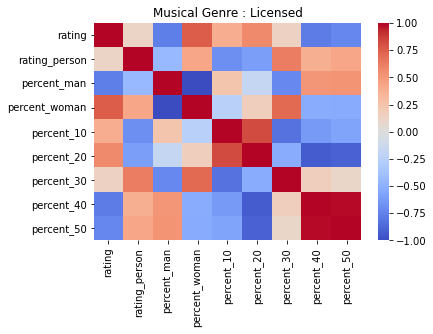

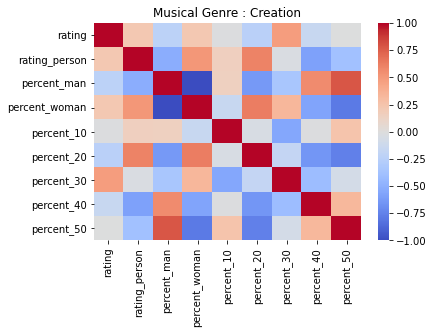

C:\Users\pc\anaconda3\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


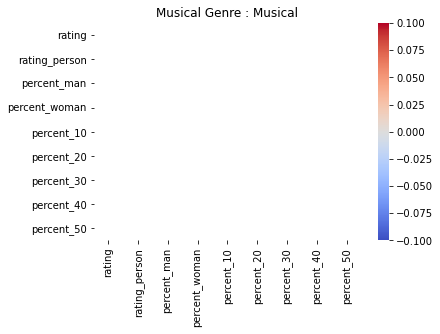

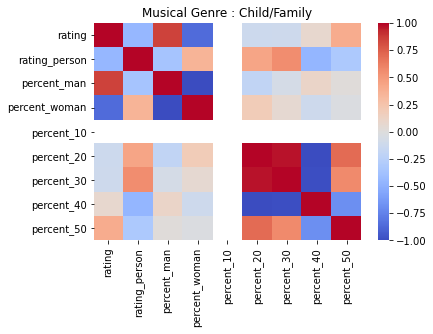

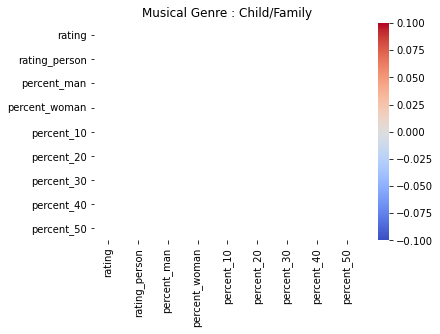

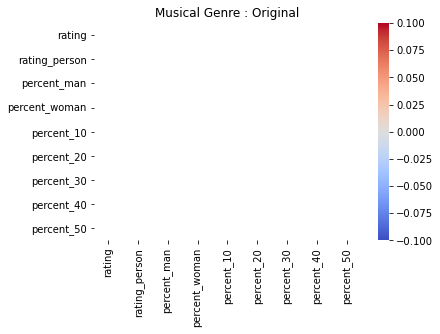

In [13]:
sns.heatmap(df_2021_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
df_2021_a_10 = np.round(df_2021_a['percent_10'].mean(), 2)
df_2021_a_20 = np.round(df_2021_a['percent_20'].mean(), 2)
df_2021_a_30 = np.round(df_2021_a['percent_30'].mean(), 2)
df_2021_a_40 = np.round(df_2021_a['percent_40'].mean(), 2)
df_2021_a_50 = np.round(df_2021_a['percent_50'].mean(), 2)
df_2021_a_m = np.round(df_2021_a['percent_man'].mean(), 2)
df_2021_a_w = np.round(df_2021_a['percent_woman'].mean(), 2)
###
sns.heatmap(df_2021_b.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
df_2021_b_10 = np.round(df_2021_b['percent_10'].mean(), 2)
df_2021_b_20 = np.round(df_2021_b['percent_20'].mean(), 2)
df_2021_b_30 = np.round(df_2021_b['percent_30'].mean(), 2)
df_2021_b_40 = np.round(df_2021_b['percent_40'].mean(), 2)
df_2021_b_50 = np.round(df_2021_b['percent_50'].mean(), 2)
df_2021_b_m = np.round(df_2021_b['percent_man'].mean(), 2)
df_2021_b_w = np.round(df_2021_b['percent_woman'].mean(), 2)
###
sns.heatmap(df_2021_c.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
df_2021_c_10 = np.round(df_2021_c['percent_10'].mean(), 2)
df_2021_c_20 = np.round(df_2021_c['percent_20'].mean(), 2)
df_2021_c_30 = np.round(df_2021_c['percent_30'].mean(), 2)
df_2021_c_40 = np.round(df_2021_c['percent_40'].mean(), 2)
df_2021_c_50 = np.round(df_2021_c['percent_50'].mean(), 2)
df_2021_c_m = np.round(df_2021_c['percent_man'].mean(), 2)
df_2021_c_w = np.round(df_2021_c['percent_woman'].mean(), 2)
###
sns.heatmap(df_2021_d.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2021_d_10 = np.round(df_2021_d['percent_10'].mean(), 2)
df_2021_d_20 = np.round(df_2021_d['percent_20'].mean(), 2)
df_2021_d_30 = np.round(df_2021_d['percent_30'].mean(), 2)
df_2021_d_40 = np.round(df_2021_d['percent_40'].mean(), 2)
df_2021_d_50 = np.round(df_2021_d['percent_50'].mean(), 2)
df_2021_d_m = np.round(df_2021_d['percent_man'].mean(), 2)
df_2021_d_w = np.round(df_2021_d['percent_woman'].mean(), 2)
###
sns.heatmap(df_2021_e.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2021_e_10 = np.round(df_2021_e['percent_10'].mean(), 2)
df_2021_e_20 = np.round(df_2021_e['percent_20'].mean(), 2)
df_2021_e_30 = np.round(df_2021_e['percent_30'].mean(), 2)
df_2021_e_40 = np.round(df_2021_e['percent_40'].mean(), 2)
df_2021_e_50 = np.round(df_2021_e['percent_50'].mean(), 2)
df_2021_e_m = np.round(df_2021_e['percent_man'].mean(), 2)
df_2021_e_w = np.round(df_2021_e['percent_woman'].mean(), 2)
###
sns.heatmap(df_2021_f.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
df_2021_f_10 = np.round(df_2021_f['percent_10'].mean(), 2)
df_2021_f_20 = np.round(df_2021_f['percent_20'].mean(), 2)
df_2021_f_30 = np.round(df_2021_f['percent_30'].mean(), 2)
df_2021_f_40 = np.round(df_2021_f['percent_40'].mean(), 2)
df_2021_f_50 = np.round(df_2021_f['percent_50'].mean(), 2)
df_2021_f_m = np.round(df_2021_f['percent_man'].mean(), 2)
df_2021_f_w = np.round(df_2021_f['percent_woman'].mean(), 2)

### 2019년 정보 각 장르별 연령대별 평균값 구하기

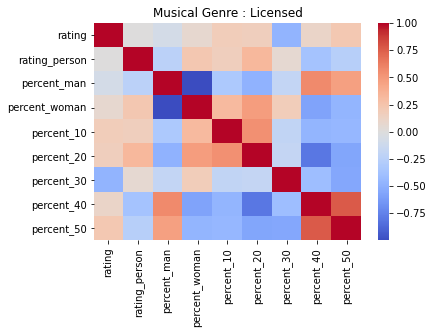

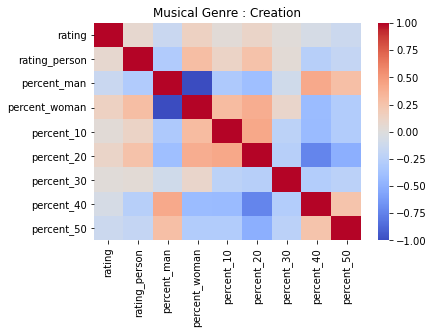

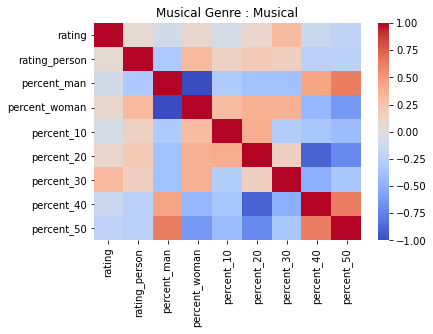

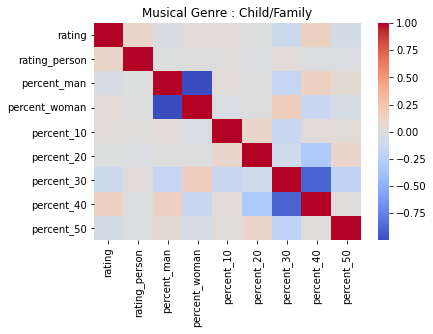

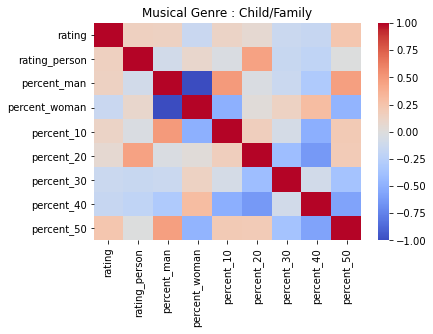

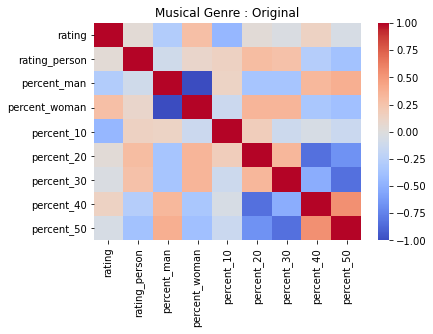

In [14]:
sns.heatmap(df_2019_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
df_2019_a_10 = np.round(df_2019_a['percent_10'].mean(), 2)
df_2019_a_20 = np.round(df_2019_a['percent_20'].mean(), 2)
df_2019_a_30 = np.round(df_2019_a['percent_30'].mean(), 2)
df_2019_a_40 = np.round(df_2019_a['percent_40'].mean(), 2)
df_2019_a_50 = np.round(df_2019_a['percent_50'].mean(), 2)
df_2019_a_m = np.round(df_2019_a['percent_man'].mean(), 2)
df_2019_a_w = np.round(df_2019_a['percent_woman'].mean(), 2)
###
sns.heatmap(df_2019_b.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
df_2019_b_10 = np.round(df_2019_b['percent_10'].mean(), 2)
df_2019_b_20 = np.round(df_2019_b['percent_20'].mean(), 2)
df_2019_b_30 = np.round(df_2019_b['percent_30'].mean(), 2)
df_2019_b_40 = np.round(df_2019_b['percent_40'].mean(), 2)
df_2019_b_50 = np.round(df_2019_b['percent_50'].mean(), 2)
df_2019_b_m = np.round(df_2019_b['percent_man'].mean(), 2)
df_2019_b_w = np.round(df_2019_b['percent_woman'].mean(), 2)
###
sns.heatmap(df_2019_c.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
df_2019_c_10 = np.round(df_2019_c['percent_10'].mean(), 2)
df_2019_c_20 = np.round(df_2019_c['percent_20'].mean(), 2)
df_2019_c_30 = np.round(df_2019_c['percent_30'].mean(), 2)
df_2019_c_40 = np.round(df_2019_c['percent_40'].mean(), 2)
df_2019_c_50 = np.round(df_2019_c['percent_50'].mean(), 2)
df_2019_c_m = np.round(df_2019_c['percent_man'].mean(), 2)
df_2019_c_w = np.round(df_2019_c['percent_woman'].mean(), 2)
###
sns.heatmap(df_2019_d.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2019_d_10 = np.round(df_2019_d['percent_10'].mean(), 2)
df_2019_d_20 = np.round(df_2019_d['percent_20'].mean(), 2)
df_2019_d_30 = np.round(df_2019_d['percent_30'].mean(), 2)
df_2019_d_40 = np.round(df_2019_d['percent_40'].mean(), 2)
df_2019_d_50 = np.round(df_2019_d['percent_50'].mean(), 2)
df_2019_d_m = np.round(df_2019_d['percent_man'].mean(), 2)
df_2019_d_w = np.round(df_2019_d['percent_woman'].mean(), 2)
###
sns.heatmap(df_2019_e.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2019_e_10 = np.round(df_2019_e['percent_10'].mean(), 2)
df_2019_e_20 = np.round(df_2019_e['percent_20'].mean(), 2)
df_2019_e_30 = np.round(df_2019_e['percent_30'].mean(), 2)
df_2019_e_40 = np.round(df_2019_e['percent_40'].mean(), 2)
df_2019_e_50 = np.round(df_2019_e['percent_50'].mean(), 2)
df_2019_e_m = np.round(df_2019_e['percent_man'].mean(), 2)
df_2019_e_w = np.round(df_2019_e['percent_woman'].mean(), 2)
###
sns.heatmap(df_2019_f.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
df_2019_f_10 = np.round(df_2019_f['percent_10'].mean(), 2)
df_2019_f_20 = np.round(df_2019_f['percent_20'].mean(), 2)
df_2019_f_30 = np.round(df_2019_f['percent_30'].mean(), 2)
df_2019_f_40 = np.round(df_2019_f['percent_40'].mean(), 2)
df_2019_f_50 = np.round(df_2019_f['percent_50'].mean(), 2)
df_2019_f_m = np.round(df_2019_f['percent_man'].mean(), 2)
df_2019_f_w = np.round(df_2019_f['percent_woman'].mean(), 2)

### 2018년 정보 각 장르별 연령대별 평균값 구하기

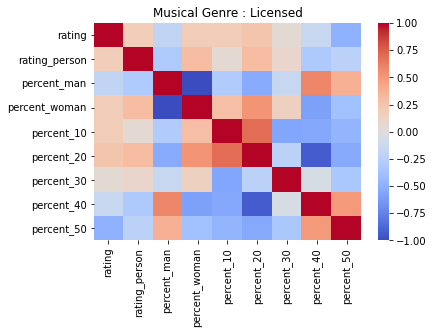

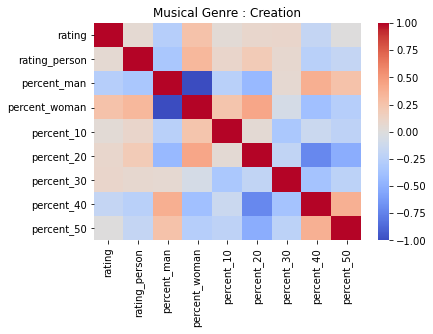

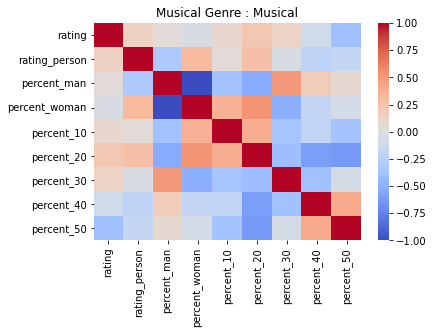

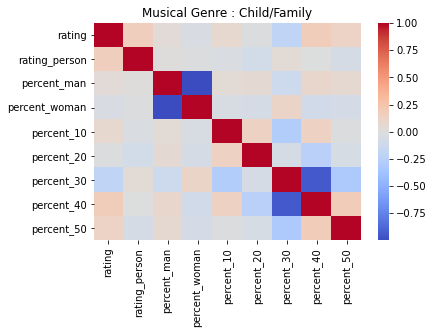

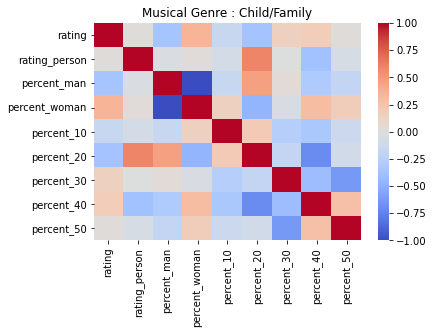

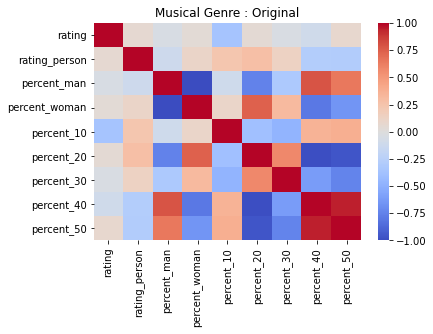

In [15]:
sns.heatmap(df_2018_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
df_2018_a_10 = np.round(df_2018_a['percent_10'].mean(), 2)
df_2018_a_20 = np.round(df_2018_a['percent_20'].mean(), 2)
df_2018_a_30 = np.round(df_2018_a['percent_30'].mean(), 2)
df_2018_a_40 = np.round(df_2018_a['percent_40'].mean(), 2)
df_2018_a_50 = np.round(df_2018_a['percent_50'].mean(), 2)
df_2018_a_m = np.round(df_2018_a['percent_man'].mean(), 2)
df_2018_a_w = np.round(df_2018_a['percent_woman'].mean(), 2)
###
sns.heatmap(df_2018_b.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
df_2018_b_10 = np.round(df_2018_b['percent_10'].mean(), 2)
df_2018_b_20 = np.round(df_2018_b['percent_20'].mean(), 2)
df_2018_b_30 = np.round(df_2018_b['percent_30'].mean(), 2)
df_2018_b_40 = np.round(df_2018_b['percent_40'].mean(), 2)
df_2018_b_50 = np.round(df_2018_b['percent_50'].mean(), 2)
df_2018_b_m = np.round(df_2018_b['percent_man'].mean(), 2)
df_2018_b_w = np.round(df_2018_b['percent_woman'].mean(), 2)
###
sns.heatmap(df_2018_c.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
df_2018_c_10 = np.round(df_2018_c['percent_10'].mean(), 2)
df_2018_c_20 = np.round(df_2018_c['percent_20'].mean(), 2)
df_2018_c_30 = np.round(df_2018_c['percent_30'].mean(), 2)
df_2018_c_40 = np.round(df_2018_c['percent_40'].mean(), 2)
df_2018_c_50 = np.round(df_2018_c['percent_50'].mean(), 2)
df_2018_c_m = np.round(df_2018_c['percent_man'].mean(), 2)
df_2018_c_w = np.round(df_2018_c['percent_woman'].mean(), 2)
###
sns.heatmap(df_2018_d.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2018_d_10 = np.round(df_2018_d['percent_10'].mean(), 2)
df_2018_d_20 = np.round(df_2018_d['percent_20'].mean(), 2)
df_2018_d_30 = np.round(df_2018_d['percent_30'].mean(), 2)
df_2018_d_40 = np.round(df_2018_d['percent_40'].mean(), 2)
df_2018_d_50 = np.round(df_2018_d['percent_50'].mean(), 2)
df_2018_d_m = np.round(df_2018_d['percent_man'].mean(), 2)
df_2018_d_w = np.round(df_2018_d['percent_woman'].mean(), 2)
###
sns.heatmap(df_2018_e.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2018_e_10 = np.round(df_2018_e['percent_10'].mean(), 2)
df_2018_e_20 = np.round(df_2018_e['percent_20'].mean(), 2)
df_2018_e_30 = np.round(df_2018_e['percent_30'].mean(), 2)
df_2018_e_40 = np.round(df_2018_e['percent_40'].mean(), 2)
df_2018_e_50 = np.round(df_2018_e['percent_50'].mean(), 2)
df_2018_e_m = np.round(df_2018_e['percent_man'].mean(), 2)
df_2018_e_w = np.round(df_2018_e['percent_woman'].mean(), 2)
###
sns.heatmap(df_2018_f.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
df_2018_f_10 = np.round(df_2018_f['percent_10'].mean(), 2)
df_2018_f_20 = np.round(df_2018_f['percent_20'].mean(), 2)
df_2018_f_30 = np.round(df_2018_f['percent_30'].mean(), 2)
df_2018_f_40 = np.round(df_2018_f['percent_40'].mean(), 2)
df_2018_f_50 = np.round(df_2018_f['percent_50'].mean(), 2)
df_2018_f_m = np.round(df_2018_f['percent_man'].mean(), 2)
df_2018_f_w = np.round(df_2018_f['percent_woman'].mean(), 2)

### 2017년 정보 각 장르별 연령대별 평균값 구하기

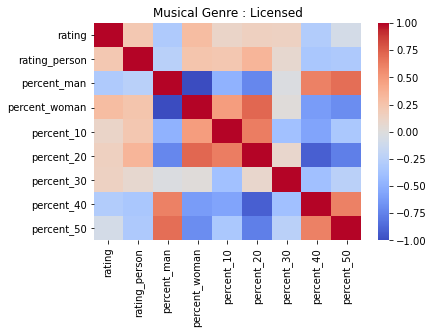

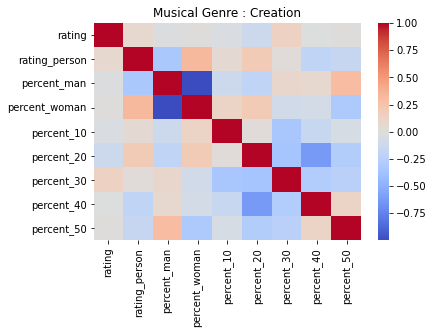

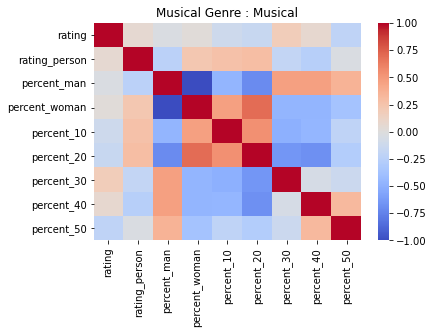

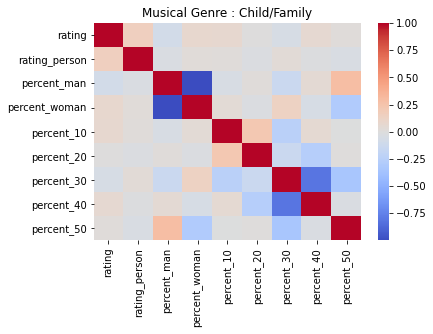

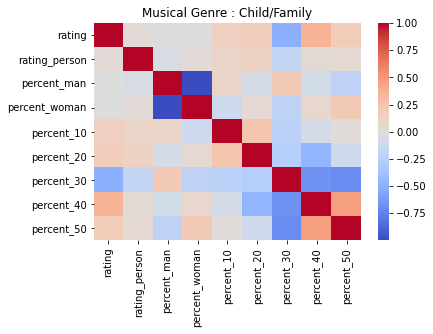

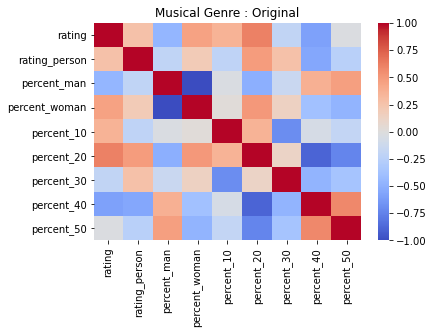

In [16]:
sns.heatmap(df_2017_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
df_2017_a_10 = np.round(df_2017_a['percent_10'].mean(), 2)
df_2017_a_20 = np.round(df_2017_a['percent_20'].mean(), 2)
df_2017_a_30 = np.round(df_2017_a['percent_30'].mean(), 2)
df_2017_a_40 = np.round(df_2017_a['percent_40'].mean(), 2)
df_2017_a_50 = np.round(df_2017_a['percent_50'].mean(), 2)
df_2017_a_m = np.round(df_2017_a['percent_man'].mean(), 2)
df_2017_a_w = np.round(df_2017_a['percent_woman'].mean(), 2)
###
sns.heatmap(df_2017_b.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
df_2017_b_10 = np.round(df_2017_b['percent_10'].mean(), 2)
df_2017_b_20 = np.round(df_2017_b['percent_20'].mean(), 2)
df_2017_b_30 = np.round(df_2017_b['percent_30'].mean(), 2)
df_2017_b_40 = np.round(df_2017_b['percent_40'].mean(), 2)
df_2017_b_50 = np.round(df_2017_b['percent_50'].mean(), 2)
df_2017_b_m = np.round(df_2017_b['percent_man'].mean(), 2)
df_2017_b_w = np.round(df_2017_b['percent_woman'].mean(), 2)
###
sns.heatmap(df_2017_c.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
df_2017_c_10 = np.round(df_2017_c['percent_10'].mean(), 2)
df_2017_c_20 = np.round(df_2017_c['percent_20'].mean(), 2)
df_2017_c_30 = np.round(df_2017_c['percent_30'].mean(), 2)
df_2017_c_40 = np.round(df_2017_c['percent_40'].mean(), 2)
df_2017_c_50 = np.round(df_2017_c['percent_50'].mean(), 2)
df_2017_c_m = np.round(df_2017_c['percent_man'].mean(), 2)
df_2017_c_w = np.round(df_2017_c['percent_woman'].mean(), 2)
###
sns.heatmap(df_2017_d.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2017_d_10 = np.round(df_2017_d['percent_10'].mean(), 2)
df_2017_d_20 = np.round(df_2017_d['percent_20'].mean(), 2)
df_2017_d_30 = np.round(df_2017_d['percent_30'].mean(), 2)
df_2017_d_40 = np.round(df_2017_d['percent_40'].mean(), 2)
df_2017_d_50 = np.round(df_2017_d['percent_50'].mean(), 2)
df_2017_d_m = np.round(df_2017_d['percent_man'].mean(), 2)
df_2017_d_w = np.round(df_2017_d['percent_woman'].mean(), 2)
###
sns.heatmap(df_2017_e.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2017_e_10 = np.round(df_2017_e['percent_10'].mean(), 2)
df_2017_e_20 = np.round(df_2017_e['percent_20'].mean(), 2)
df_2017_e_30 = np.round(df_2017_e['percent_30'].mean(), 2)
df_2017_e_40 = np.round(df_2017_e['percent_40'].mean(), 2)
df_2017_e_50 = np.round(df_2017_e['percent_50'].mean(), 2)
df_2017_e_m = np.round(df_2017_e['percent_man'].mean(), 2)
df_2017_e_w = np.round(df_2017_e['percent_woman'].mean(), 2)
###
sns.heatmap(df_2017_f.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
df_2017_f_10 = np.round(df_2017_f['percent_10'].mean(), 2)
df_2017_f_20 = np.round(df_2017_f['percent_20'].mean(), 2)
df_2017_f_30 = np.round(df_2017_f['percent_30'].mean(), 2)
df_2017_f_40 = np.round(df_2017_f['percent_40'].mean(), 2)
df_2017_f_50 = np.round(df_2017_f['percent_50'].mean(), 2)
df_2017_f_m = np.round(df_2017_f['percent_man'].mean(), 2)
df_2017_f_w = np.round(df_2017_f['percent_woman'].mean(), 2)

### 2016년 정보 각 장르별 연령대별 평균값 구하기

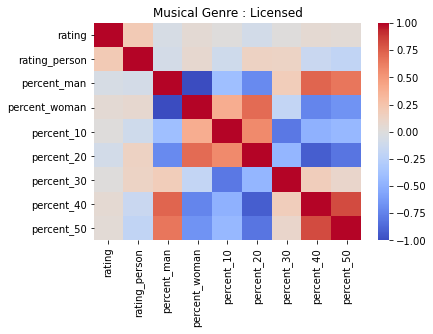

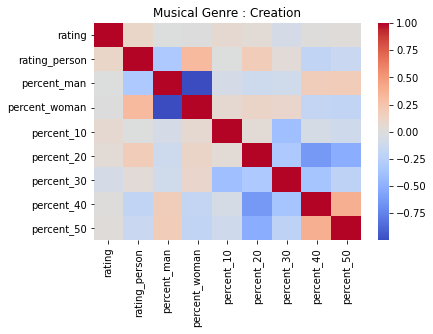

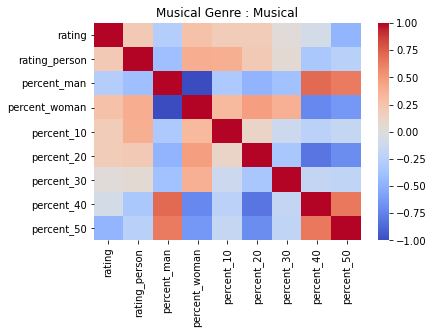

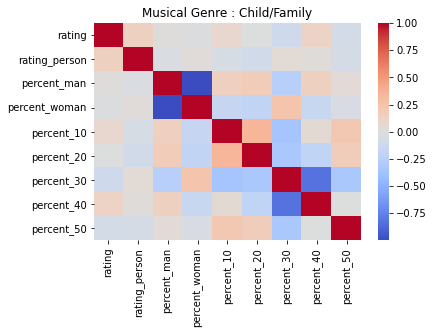

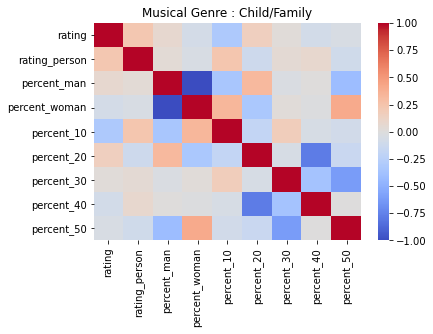

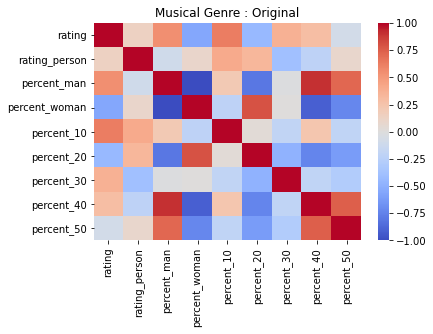

In [17]:
sns.heatmap(df_2016_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
df_2016_a_10 = np.round(df_2016_a['percent_10'].mean(), 2)
df_2016_a_20 = np.round(df_2016_a['percent_20'].mean(), 2)
df_2016_a_30 = np.round(df_2016_a['percent_30'].mean(), 2)
df_2016_a_40 = np.round(df_2016_a['percent_40'].mean(), 2)
df_2016_a_50 = np.round(df_2016_a['percent_50'].mean(), 2)
df_2016_a_m = np.round(df_2016_a['percent_man'].mean(), 2)
df_2016_a_w = np.round(df_2016_a['percent_woman'].mean(), 2)
###
sns.heatmap(df_2016_b.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
df_2016_b_10 = np.round(df_2016_b['percent_10'].mean(), 2)
df_2016_b_20 = np.round(df_2016_b['percent_20'].mean(), 2)
df_2016_b_30 = np.round(df_2016_b['percent_30'].mean(), 2)
df_2016_b_40 = np.round(df_2016_b['percent_40'].mean(), 2)
df_2016_b_50 = np.round(df_2016_b['percent_50'].mean(), 2)
df_2016_b_m = np.round(df_2016_b['percent_man'].mean(), 2)
df_2016_b_w = np.round(df_2016_b['percent_woman'].mean(), 2)
###
sns.heatmap(df_2016_c.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
df_2016_c_10 = np.round(df_2016_c['percent_10'].mean(), 2)
df_2016_c_20 = np.round(df_2016_c['percent_20'].mean(), 2)
df_2016_c_30 = np.round(df_2016_c['percent_30'].mean(), 2)
df_2016_c_40 = np.round(df_2016_c['percent_40'].mean(), 2)
df_2016_c_50 = np.round(df_2016_c['percent_50'].mean(), 2)
df_2016_c_m = np.round(df_2016_c['percent_man'].mean(), 2)
df_2016_c_w = np.round(df_2016_c['percent_woman'].mean(), 2)
###
sns.heatmap(df_2016_d.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2016_d_10 = np.round(df_2016_d['percent_10'].mean(), 2)
df_2016_d_20 = np.round(df_2016_d['percent_20'].mean(), 2)
df_2016_d_30 = np.round(df_2016_d['percent_30'].mean(), 2)
df_2016_d_40 = np.round(df_2016_d['percent_40'].mean(), 2)
df_2016_d_50 = np.round(df_2016_d['percent_50'].mean(), 2)
df_2016_d_m = np.round(df_2016_d['percent_man'].mean(), 2)
df_2016_d_w = np.round(df_2016_d['percent_woman'].mean(), 2)
###
sns.heatmap(df_2016_e.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2016_e_10 = np.round(df_2016_e['percent_10'].mean(), 2)
df_2016_e_20 = np.round(df_2016_e['percent_20'].mean(), 2)
df_2016_e_30 = np.round(df_2016_e['percent_30'].mean(), 2)
df_2016_e_40 = np.round(df_2016_e['percent_40'].mean(), 2)
df_2016_e_50 = np.round(df_2016_e['percent_50'].mean(), 2)
df_2016_e_m = np.round(df_2016_e['percent_man'].mean(), 2)
df_2016_e_w = np.round(df_2016_e['percent_woman'].mean(), 2)
###
sns.heatmap(df_2016_f.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
df_2016_f_10 = np.round(df_2016_f['percent_10'].mean(), 2)
df_2016_f_20 = np.round(df_2016_f['percent_20'].mean(), 2)
df_2016_f_30 = np.round(df_2016_f['percent_30'].mean(), 2)
df_2016_f_40 = np.round(df_2016_f['percent_40'].mean(), 2)
df_2016_f_50 = np.round(df_2016_f['percent_50'].mean(), 2)
df_2016_f_m = np.round(df_2016_f['percent_man'].mean(), 2)
df_2016_f_w = np.round(df_2016_f['percent_woman'].mean(), 2)


### 2015년 정보 각 장르별 연령대별 평균값 구하기

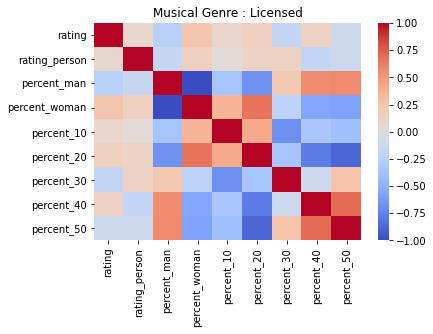

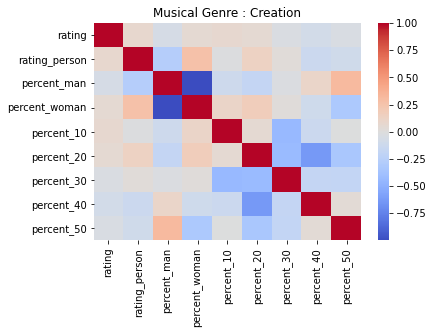

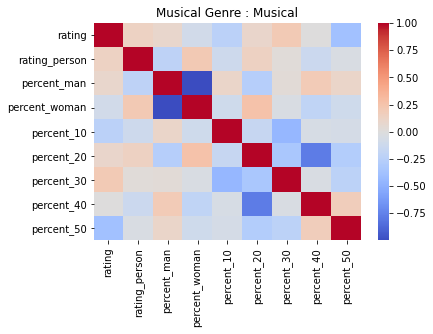

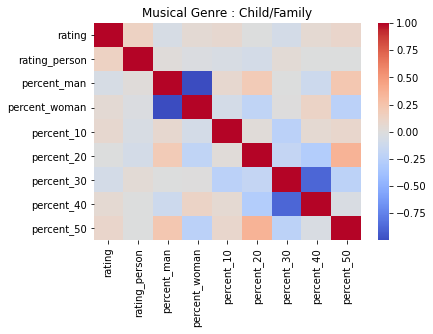

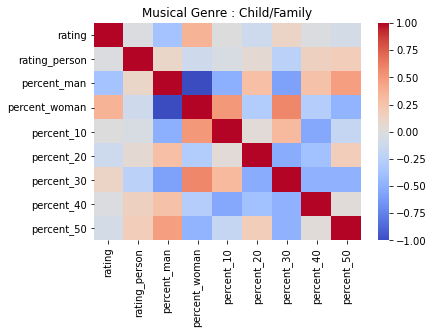

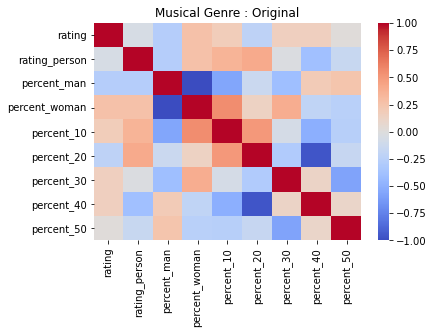

In [18]:
sns.heatmap(df_2015_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
df_2015_a_10 = np.round(df_2015_a['percent_10'].mean(), 2)
df_2015_a_20 = np.round(df_2015_a['percent_20'].mean(), 2)
df_2015_a_30 = np.round(df_2015_a['percent_30'].mean(), 2)
df_2015_a_40 = np.round(df_2015_a['percent_40'].mean(), 2)
df_2015_a_50 = np.round(df_2015_a['percent_50'].mean(), 2)
df_2015_a_m = np.round(df_2015_a['percent_man'].mean(), 2)
df_2015_a_w = np.round(df_2015_a['percent_woman'].mean(), 2)
###
sns.heatmap(df_2015_b.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
df_2015_b_10 = np.round(df_2015_b['percent_10'].mean(), 2)
df_2015_b_20 = np.round(df_2015_b['percent_20'].mean(), 2)
df_2015_b_30 = np.round(df_2015_b['percent_30'].mean(), 2)
df_2015_b_40 = np.round(df_2015_b['percent_40'].mean(), 2)
df_2015_b_50 = np.round(df_2015_b['percent_50'].mean(), 2)
df_2015_b_m = np.round(df_2015_b['percent_man'].mean(), 2)
df_2015_b_w = np.round(df_2015_b['percent_woman'].mean(), 2)
###
sns.heatmap(df_2015_c.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
df_2015_c_10 = np.round(df_2015_c['percent_10'].mean(), 2)
df_2015_c_20 = np.round(df_2015_c['percent_20'].mean(), 2)
df_2015_c_30 = np.round(df_2015_c['percent_30'].mean(), 2)
df_2015_c_40 = np.round(df_2015_c['percent_40'].mean(), 2)
df_2015_c_50 = np.round(df_2015_c['percent_50'].mean(), 2)
df_2015_c_m = np.round(df_2015_c['percent_man'].mean(), 2)
df_2015_c_w = np.round(df_2015_c['percent_woman'].mean(), 2)
###
sns.heatmap(df_2015_d.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2015_d_10 = np.round(df_2015_d['percent_10'].mean(), 2)
df_2015_d_20 = np.round(df_2015_d['percent_20'].mean(), 2)
df_2015_d_30 = np.round(df_2015_d['percent_30'].mean(), 2)
df_2015_d_40 = np.round(df_2015_d['percent_40'].mean(), 2)
df_2015_d_50 = np.round(df_2015_d['percent_50'].mean(), 2)
df_2015_d_m = np.round(df_2015_d['percent_man'].mean(), 2)
df_2015_d_w = np.round(df_2015_d['percent_woman'].mean(), 2)
###
sns.heatmap(df_2015_e.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2015_e_10 = np.round(df_2015_e['percent_10'].mean(), 2)
df_2015_e_20 = np.round(df_2015_e['percent_20'].mean(), 2)
df_2015_e_30 = np.round(df_2015_e['percent_30'].mean(), 2)
df_2015_e_40 = np.round(df_2015_e['percent_40'].mean(), 2)
df_2015_e_50 = np.round(df_2015_e['percent_50'].mean(), 2)
df_2015_e_m = np.round(df_2015_e['percent_man'].mean(), 2)
df_2015_e_w = np.round(df_2015_e['percent_woman'].mean(), 2)
###
sns.heatmap(df_2015_f.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
df_2015_f_10 = np.round(df_2015_f['percent_10'].mean(), 2)
df_2015_f_20 = np.round(df_2015_f['percent_20'].mean(), 2)
df_2015_f_30 = np.round(df_2015_f['percent_30'].mean(), 2)
df_2015_f_40 = np.round(df_2015_f['percent_40'].mean(), 2)
df_2015_f_50 = np.round(df_2015_f['percent_50'].mean(), 2)
df_2015_f_m = np.round(df_2015_f['percent_man'].mean(), 2)
df_2015_f_w = np.round(df_2015_f['percent_woman'].mean(), 2)


### 2014년 정보 각 장르별 연령대별 평균값 구하기

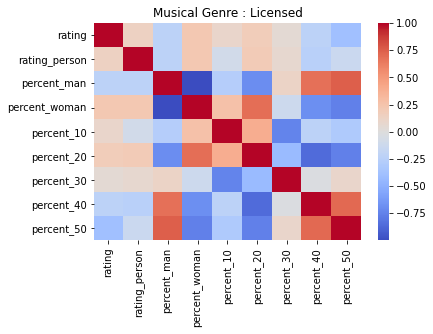

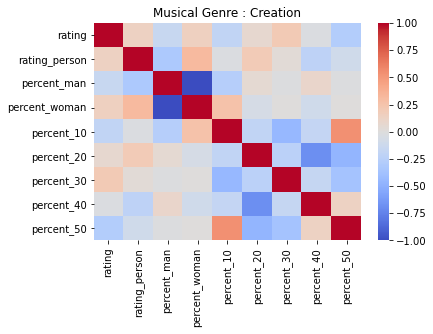

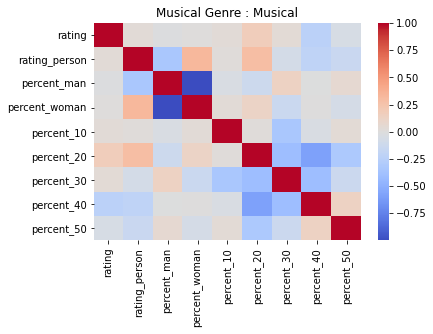

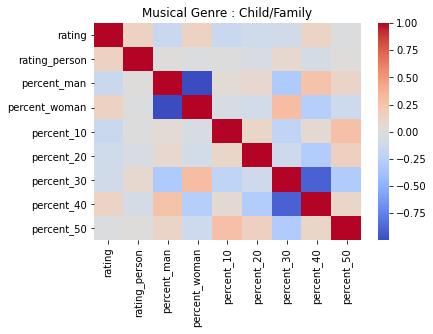

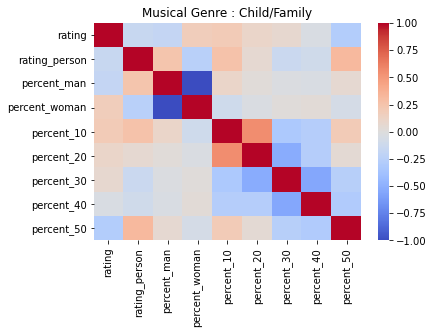

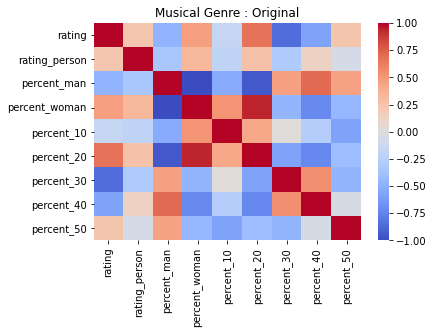

In [19]:
sns.heatmap(df_2014_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
df_2014_a_10 = np.round(df_2014_a['percent_10'].mean(), 2)
df_2014_a_20 = np.round(df_2014_a['percent_20'].mean(), 2)
df_2014_a_30 = np.round(df_2014_a['percent_30'].mean(), 2)
df_2014_a_40 = np.round(df_2014_a['percent_40'].mean(), 2)
df_2014_a_50 = np.round(df_2014_a['percent_50'].mean(), 2)
df_2014_a_m = np.round(df_2014_a['percent_man'].mean(), 2)
df_2014_a_w = np.round(df_2014_a['percent_woman'].mean(), 2)
###
sns.heatmap(df_2014_b.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
df_2014_b_10 = np.round(df_2014_b['percent_10'].mean(), 2)
df_2014_b_20 = np.round(df_2014_b['percent_20'].mean(), 2)
df_2014_b_30 = np.round(df_2014_b['percent_30'].mean(), 2)
df_2014_b_40 = np.round(df_2014_b['percent_40'].mean(), 2)
df_2014_b_50 = np.round(df_2014_b['percent_50'].mean(), 2)
df_2014_b_m = np.round(df_2014_b['percent_man'].mean(), 2)
df_2014_b_w = np.round(df_2014_b['percent_woman'].mean(), 2)
###
sns.heatmap(df_2014_c.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
df_2014_c_10 = np.round(df_2014_c['percent_10'].mean(), 2)
df_2014_c_20 = np.round(df_2014_c['percent_20'].mean(), 2)
df_2014_c_30 = np.round(df_2014_c['percent_30'].mean(), 2)
df_2014_c_40 = np.round(df_2014_c['percent_40'].mean(), 2)
df_2014_c_50 = np.round(df_2014_c['percent_50'].mean(), 2)
df_2014_c_m = np.round(df_2014_c['percent_man'].mean(), 2)
df_2014_c_w = np.round(df_2014_c['percent_woman'].mean(), 2)
###
sns.heatmap(df_2014_d.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2014_d_10 = np.round(df_2014_d['percent_10'].mean(), 2)
df_2014_d_20 = np.round(df_2014_d['percent_20'].mean(), 2)
df_2014_d_30 = np.round(df_2014_d['percent_30'].mean(), 2)
df_2014_d_40 = np.round(df_2014_d['percent_40'].mean(), 2)
df_2014_d_50 = np.round(df_2014_d['percent_50'].mean(), 2)
df_2014_d_m = np.round(df_2014_d['percent_man'].mean(), 2)
df_2014_d_w = np.round(df_2014_d['percent_woman'].mean(), 2)
###
sns.heatmap(df_2014_e.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child/Family')
plt.show()
df_2014_e_10 = np.round(df_2014_e['percent_10'].mean(), 2)
df_2014_e_20 = np.round(df_2014_e['percent_20'].mean(), 2)
df_2014_e_30 = np.round(df_2014_e['percent_30'].mean(), 2)
df_2014_e_40 = np.round(df_2014_e['percent_40'].mean(), 2)
df_2014_e_50 = np.round(df_2014_e['percent_50'].mean(), 2)
df_2014_e_m = np.round(df_2014_e['percent_man'].mean(), 2)
df_2014_e_w = np.round(df_2014_e['percent_woman'].mean(), 2)
###
sns.heatmap(df_2014_f.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
df_2014_f_10 = np.round(df_2014_f['percent_10'].mean(), 2)
df_2014_f_20 = np.round(df_2014_f['percent_20'].mean(), 2)
df_2014_f_30 = np.round(df_2014_f['percent_30'].mean(), 2)
df_2014_f_40 = np.round(df_2014_f['percent_40'].mean(), 2)
df_2014_f_50 = np.round(df_2014_f['percent_50'].mean(), 2)
df_2014_f_m = np.round(df_2014_f['percent_man'].mean(), 2)
df_2014_f_w = np.round(df_2014_f['percent_woman'].mean(), 2)


# 장르별 비교

라이선스

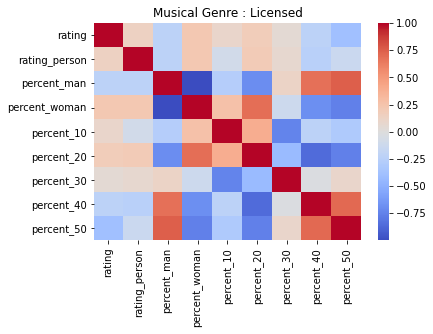

2014년
연령별
라이선스 뮤지컬 10대 비율 :  4.85
라이선스 뮤지컬 20대 비율 :  37.98
라이선스 뮤지컬 30대 비율 :  35.23
라이선스 뮤지컬 40대 비율 :  16.95
라이선스 뮤지컬 50대 비율 :  4.29
성별
라이선스 뮤지컬 남성 비율 :  21.0
라이선스 뮤지컬 여성 비율 :  79.0


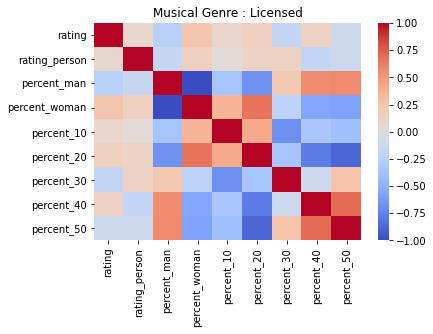

2015년
연령별
라이선스 뮤지컬 10대 비율 :  5.3
라이선스 뮤지컬 20대 비율 :  37.93
라이선스 뮤지컬 30대 비율 :  33.8
라이선스 뮤지컬 40대 비율 :  17.35
라이선스 뮤지컬 50대 비율 :  4.23
성별
라이선스 뮤지컬 남성 비율 :  19.93
라이선스 뮤지컬 여성 비율 :  80.07


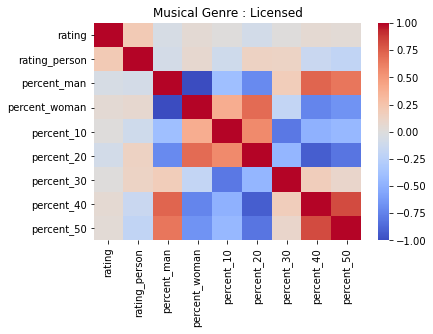

2016년
연령별
라이선스 뮤지컬 10대 비율 :  4.93
라이선스 뮤지컬 20대 비율 :  36.63
라이선스 뮤지컬 30대 비율 :  34.94
라이선스 뮤지컬 40대 비율 :  17.92
라이선스 뮤지컬 50대 비율 :  4.76
성별
라이선스 뮤지컬 남성 비율 :  18.8
라이선스 뮤지컬 여성 비율 :  81.2


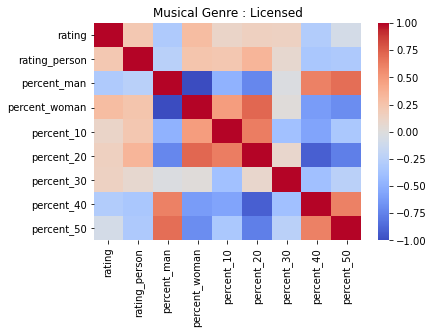

2017년
연령별
라이선스 뮤지컬 10대 비율 :  4.16
라이선스 뮤지컬 20대 비율 :  32.03
라이선스 뮤지컬 30대 비율 :  34.84
라이선스 뮤지컬 40대 비율 :  22.24
라이선스 뮤지컬 50대 비율 :  5.44
성별
라이선스 뮤지컬 남성 비율 :  17.45
라이선스 뮤지컬 여성 비율 :  82.55


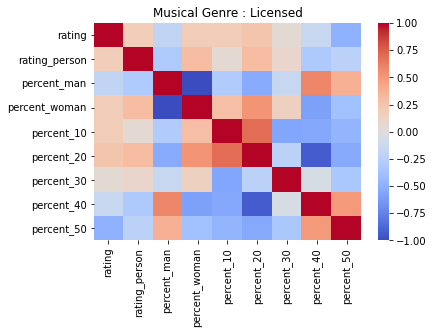

2018년
연령별
라이선스 뮤지컬 10대 비율 :  4.51
라이선스 뮤지컬 20대 비율 :  30.81
라이선스 뮤지컬 30대 비율 :  33.0
라이선스 뮤지컬 40대 비율 :  23.43
라이선스 뮤지컬 50대 비율 :  6.88
성별
라이선스 뮤지컬 남성 비율 :  21.8
라이선스 뮤지컬 여성 비율 :  78.2


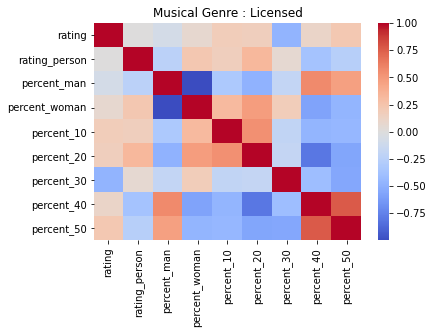

2019년
연령별
라이선스 뮤지컬 10대 비율 :  4.27
라이선스 뮤지컬 20대 비율 :  29.82
라이선스 뮤지컬 30대 비율 :  33.01
라이선스 뮤지컬 40대 비율 :  23.38
라이선스 뮤지컬 50대 비율 :  8.06
성별
라이선스 뮤지컬 남성 비율 :  20.13
라이선스 뮤지컬 여성 비율 :  79.87


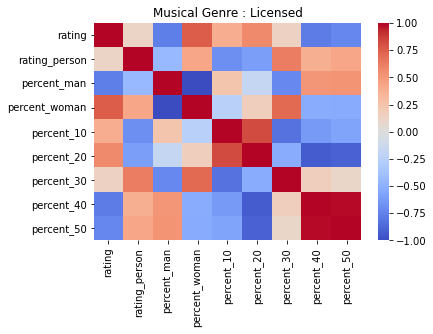

2021년
연령별
라이선스 뮤지컬 10대 비율 :  5.04
라이선스 뮤지컬 20대 비율 :  40.38
라이선스 뮤지컬 30대 비율 :  32.78
라이선스 뮤지컬 40대 비율 :  15.98
라이선스 뮤지컬 50대 비율 :  4.82
성별
라이선스 뮤지컬 남성 비율 :  19.64
라이선스 뮤지컬 여성 비율 :  80.36


In [20]:
sns.heatmap(df_2014_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
print('2014년')
print('연령별')
print("라이선스 뮤지컬 10대 비율 : ", df_2014_a_10)
print("라이선스 뮤지컬 20대 비율 : ", df_2014_a_20)
print("라이선스 뮤지컬 30대 비율 : ", df_2014_a_30)
print("라이선스 뮤지컬 40대 비율 : ", df_2014_a_40)
print("라이선스 뮤지컬 50대 비율 : ", df_2014_a_50)
print('성별')
print("라이선스 뮤지컬 남성 비율 : ", df_2014_a_m)
print("라이선스 뮤지컬 여성 비율 : ", df_2014_a_w)
###
sns.heatmap(df_2015_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
print('2015년')
print('연령별')
print("라이선스 뮤지컬 10대 비율 : ", df_2015_a_10)
print("라이선스 뮤지컬 20대 비율 : ", df_2015_a_20)
print("라이선스 뮤지컬 30대 비율 : ", df_2015_a_30)
print("라이선스 뮤지컬 40대 비율 : ", df_2015_a_40)
print("라이선스 뮤지컬 50대 비율 : ", df_2015_a_50)
print('성별')
print("라이선스 뮤지컬 남성 비율 : ", df_2015_a_m)
print("라이선스 뮤지컬 여성 비율 : ", df_2015_a_w)

###
sns.heatmap(df_2016_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
print('2016년')
print('연령별')
print("라이선스 뮤지컬 10대 비율 : ", df_2016_a_10)
print("라이선스 뮤지컬 20대 비율 : ", df_2016_a_20)
print("라이선스 뮤지컬 30대 비율 : ", df_2016_a_30)
print("라이선스 뮤지컬 40대 비율 : ", df_2016_a_40)
print("라이선스 뮤지컬 50대 비율 : ", df_2016_a_50)
print('성별')
print("라이선스 뮤지컬 남성 비율 : ", df_2016_a_m)
print("라이선스 뮤지컬 여성 비율 : ", df_2016_a_w)
###
sns.heatmap(df_2017_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
print('2017년')
print('연령별')
print("라이선스 뮤지컬 10대 비율 : ", df_2017_a_10)
print("라이선스 뮤지컬 20대 비율 : ", df_2017_a_20)
print("라이선스 뮤지컬 30대 비율 : ", df_2017_a_30)
print("라이선스 뮤지컬 40대 비율 : ", df_2017_a_40)
print("라이선스 뮤지컬 50대 비율 : ", df_2017_a_50)
print('성별')
print("라이선스 뮤지컬 남성 비율 : ", df_2017_a_m)
print("라이선스 뮤지컬 여성 비율 : ", df_2017_a_w)
###
sns.heatmap(df_2018_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
print('2018년')
print('연령별')
print("라이선스 뮤지컬 10대 비율 : ", df_2018_a_10)
print("라이선스 뮤지컬 20대 비율 : ", df_2018_a_20)
print("라이선스 뮤지컬 30대 비율 : ", df_2018_a_30)
print("라이선스 뮤지컬 40대 비율 : ", df_2018_a_40)
print("라이선스 뮤지컬 50대 비율 : ", df_2018_a_50)
print('성별')
print("라이선스 뮤지컬 남성 비율 : ", df_2018_a_m)
print("라이선스 뮤지컬 여성 비율 : ", df_2018_a_w)
###
sns.heatmap(df_2019_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
print('2019년')
print('연령별')
print("라이선스 뮤지컬 10대 비율 : ", df_2019_a_10)
print("라이선스 뮤지컬 20대 비율 : ", df_2019_a_20)
print("라이선스 뮤지컬 30대 비율 : ", df_2019_a_30)
print("라이선스 뮤지컬 40대 비율 : ", df_2019_a_40)
print("라이선스 뮤지컬 50대 비율 : ", df_2019_a_50)
print('성별')
print("라이선스 뮤지컬 남성 비율 : ", df_2019_a_m)
print("라이선스 뮤지컬 여성 비율 : ", df_2019_a_w)
###
sns.heatmap(df_2021_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Licensed')
plt.show()
print('2021년')
print('연령별')
print("라이선스 뮤지컬 10대 비율 : ", df_2021_a_10)
print("라이선스 뮤지컬 20대 비율 : ", df_2021_a_20)
print("라이선스 뮤지컬 30대 비율 : ", df_2021_a_30)
print("라이선스 뮤지컬 40대 비율 : ", df_2021_a_40)
print("라이선스 뮤지컬 50대 비율 : ", df_2021_a_50)
print('성별')
print("라이선스 뮤지컬 남성 비율 : ", df_2021_a_m)
print("라이선스 뮤지컬 여성 비율 : ", df_2021_a_w)

### 창작

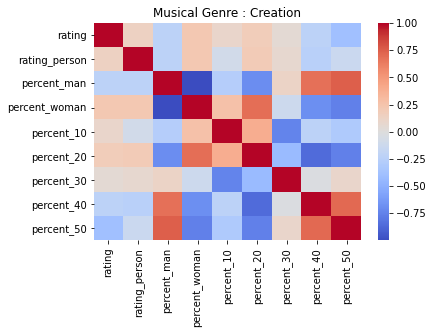

2014년
연령별
창작 뮤지컬 10대 비율 :  5.71
창작 뮤지컬 20대 비율 :  38.68
창작 뮤지컬 30대 비율 :  33.93
창작 뮤지컬 40대 비율 :  16.79
창작 뮤지컬 50대 비율 :  4.06
성별
창작 뮤지컬 남성 비율 :  26.34
창작 뮤지컬 여성 비율 :  73.66


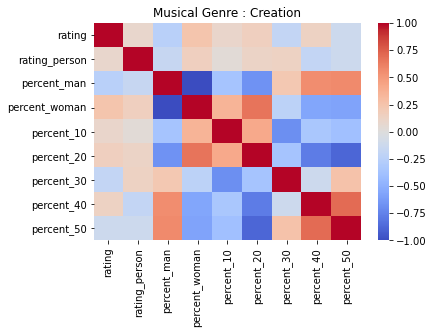

2015년
연령별
창작 뮤지컬 10대 비율 :  5.24
창작 뮤지컬 20대 비율 :  36.34
창작 뮤지컬 30대 비율 :  34.19
창작 뮤지컬 40대 비율 :  17.67
창작 뮤지컬 50대 비율 :  5.31
성별
창작 뮤지컬 남성 비율 :  27.36
창작 뮤지컬 여성 비율 :  72.64


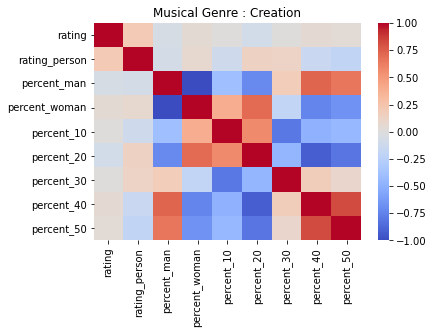

2016년
연령별
창작 뮤지컬 10대 비율 :  4.88
창작 뮤지컬 20대 비율 :  35.2
창작 뮤지컬 30대 비율 :  34.06
창작 뮤지컬 40대 비율 :  19.08
창작 뮤지컬 50대 비율 :  5.47
성별
창작 뮤지컬 남성 비율 :  25.96
창작 뮤지컬 여성 비율 :  74.04


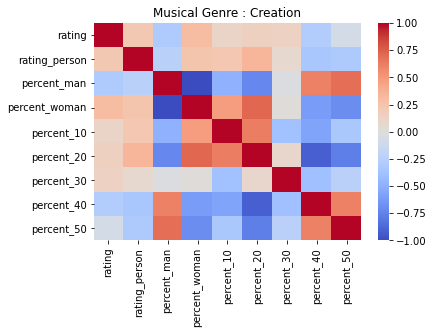

2017년
연령별
창작 뮤지컬 10대 비율 :  5.06
창작 뮤지컬 20대 비율 :  34.02
창작 뮤지컬 30대 비율 :  33.07
창작 뮤지컬 40대 비율 :  20.47
창작 뮤지컬 50대 비율 :  6.1
성별
창작 뮤지컬 남성 비율 :  24.7
창작 뮤지컬 여성 비율 :  75.3


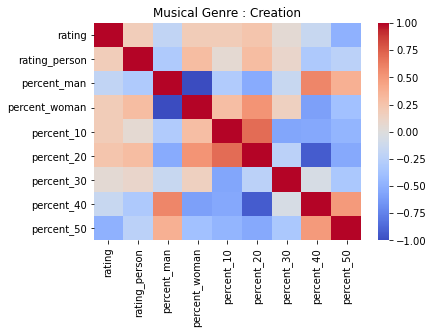

2018년
연령별
창작 뮤지컬 10대 비율 :  5.69
창작 뮤지컬 20대 비율 :  34.62
창작 뮤지컬 30대 비율 :  31.3
창작 뮤지컬 40대 비율 :  20.75
창작 뮤지컬 50대 비율 :  6.23
성별
창작 뮤지컬 남성 비율 :  21.58
창작 뮤지컬 여성 비율 :  78.42


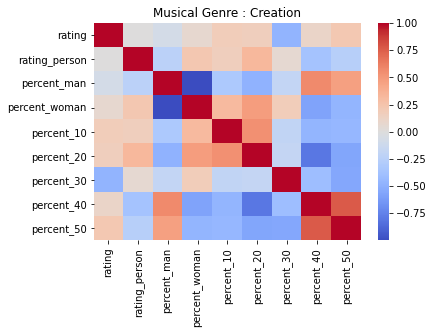

2019년
연령별
창작 뮤지컬 10대 비율 :  4.53
창작 뮤지컬 20대 비율 :  31.23
창작 뮤지컬 30대 비율 :  32.05
창작 뮤지컬 40대 비율 :  23.41
창작 뮤지컬 50대 비율 :  7.19
성별
창작 뮤지컬 남성 비율 :  22.66
창작 뮤지컬 여성 비율 :  77.34


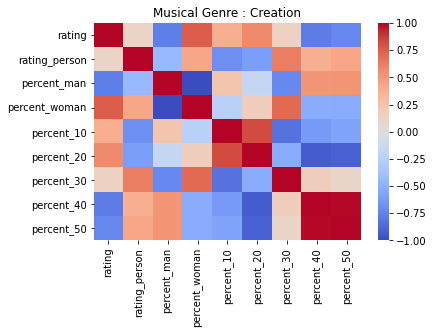

2021년
연령별
창작 뮤지컬 10대 비율 :  5.85
창작 뮤지컬 20대 비율 :  31.51
창작 뮤지컬 30대 비율 :  32.36
창작 뮤지컬 40대 비율 :  21.73
창작 뮤지컬 50대 비율 :  6.91
성별
창작 뮤지컬 남성 비율 :  19.26
창작 뮤지컬 여성 비율 :  80.74


In [21]:
sns.heatmap(df_2014_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
print('2014년')
print('연령별')
print("창작 뮤지컬 10대 비율 : ", df_2014_b_10)
print("창작 뮤지컬 20대 비율 : ", df_2014_b_20)
print("창작 뮤지컬 30대 비율 : ", df_2014_b_30)
print("창작 뮤지컬 40대 비율 : ", df_2014_b_40)
print("창작 뮤지컬 50대 비율 : ", df_2014_b_50)
print('성별')
print("창작 뮤지컬 남성 비율 : ", df_2014_b_m)
print("창작 뮤지컬 여성 비율 : ", df_2014_b_w)
###
sns.heatmap(df_2015_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
print('2015년')
print('연령별')
print("창작 뮤지컬 10대 비율 : ", df_2015_b_10)
print("창작 뮤지컬 20대 비율 : ", df_2015_b_20)
print("창작 뮤지컬 30대 비율 : ", df_2015_b_30)
print("창작 뮤지컬 40대 비율 : ", df_2015_b_40)
print("창작 뮤지컬 50대 비율 : ", df_2015_b_50)
print('성별')
print("창작 뮤지컬 남성 비율 : ", df_2015_b_m)
print("창작 뮤지컬 여성 비율 : ", df_2015_b_w)

###
sns.heatmap(df_2016_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
print('2016년')
print('연령별')
print("창작 뮤지컬 10대 비율 : ", df_2016_b_10)
print("창작 뮤지컬 20대 비율 : ", df_2016_b_20)
print("창작 뮤지컬 30대 비율 : ", df_2016_b_30)
print("창작 뮤지컬 40대 비율 : ", df_2016_b_40)
print("창작 뮤지컬 50대 비율 : ", df_2016_b_50)
print('성별')
print("창작 뮤지컬 남성 비율 : ", df_2016_b_m)
print("창작 뮤지컬 여성 비율 : ", df_2016_b_w)
###
sns.heatmap(df_2017_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
print('2017년')
print('연령별')
print("창작 뮤지컬 10대 비율 : ", df_2017_b_10)
print("창작 뮤지컬 20대 비율 : ", df_2017_b_20)
print("창작 뮤지컬 30대 비율 : ", df_2017_b_30)
print("창작 뮤지컬 40대 비율 : ", df_2017_b_40)
print("창작 뮤지컬 50대 비율 : ", df_2017_b_50)
print('성별')
print("창작 뮤지컬 남성 비율 : ", df_2017_b_m)
print("창작 뮤지컬 여성 비율 : ", df_2017_b_w)
###
sns.heatmap(df_2018_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
print('2018년')
print('연령별')
print("창작 뮤지컬 10대 비율 : ", df_2018_b_10)
print("창작 뮤지컬 20대 비율 : ", df_2018_b_20)
print("창작 뮤지컬 30대 비율 : ", df_2018_b_30)
print("창작 뮤지컬 40대 비율 : ", df_2018_b_40)
print("창작 뮤지컬 50대 비율 : ", df_2018_b_50)
print('성별')
print("창작 뮤지컬 남성 비율 : ", df_2018_b_m)
print("창작 뮤지컬 여성 비율 : ", df_2018_b_w)
###
sns.heatmap(df_2019_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
print('2019년')
print('연령별')
print("창작 뮤지컬 10대 비율 : ", df_2019_b_10)
print("창작 뮤지컬 20대 비율 : ", df_2019_b_20)
print("창작 뮤지컬 30대 비율 : ", df_2019_b_30)
print("창작 뮤지컬 40대 비율 : ", df_2019_b_40)
print("창작 뮤지컬 50대 비율 : ", df_2019_b_50)
print('성별')
print("창작 뮤지컬 남성 비율 : ", df_2019_b_m)
print("창작 뮤지컬 여성 비율 : ", df_2019_b_w)
###
sns.heatmap(df_2021_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Creation')
plt.show()
print('2021년')
print('연령별')
print("창작 뮤지컬 10대 비율 : ", df_2021_b_10)
print("창작 뮤지컬 20대 비율 : ", df_2021_b_20)
print("창작 뮤지컬 30대 비율 : ", df_2021_b_30)
print("창작 뮤지컬 40대 비율 : ", df_2021_b_40)
print("창작 뮤지컬 50대 비율 : ", df_2021_b_50)
print('성별')
print("창작 뮤지컬 남성 비율 : ", df_2021_b_m)
print("창작 뮤지컬 여성 비율 : ", df_2021_b_w)


### 뮤지컬

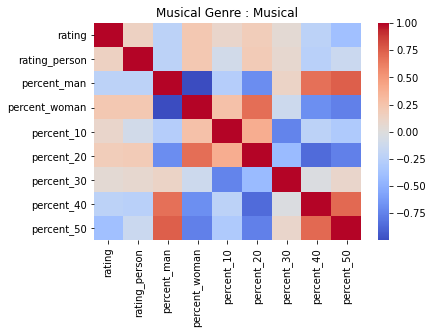

2014년
연령별
뮤지컬 뮤지컬 10대 비율 :  3.99
뮤지컬 뮤지컬 20대 비율 :  34.14
뮤지컬 뮤지컬 30대 비율 :  38.04
뮤지컬 뮤지컬 40대 비율 :  18.18
뮤지컬 뮤지컬 50대 비율 :  4.5
성별
뮤지컬 뮤지컬 남성 비율 :  28.39
뮤지컬 뮤지컬 여성 비율 :  71.61


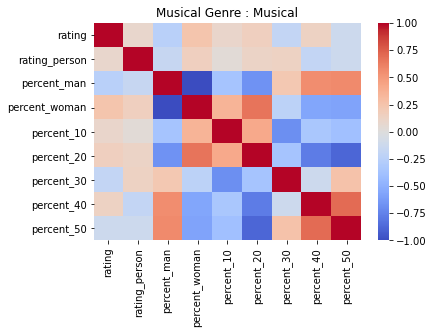

2015년
연령별
뮤지컬 뮤지컬 10대 비율 :  4.81
뮤지컬 뮤지컬 20대 비율 :  35.48
뮤지컬 뮤지컬 30대 비율 :  37.13
뮤지컬 뮤지컬 40대 비율 :  17.52
뮤지컬 뮤지컬 50대 비율 :  4.16
성별
뮤지컬 뮤지컬 남성 비율 :  25.24
뮤지컬 뮤지컬 여성 비율 :  74.76


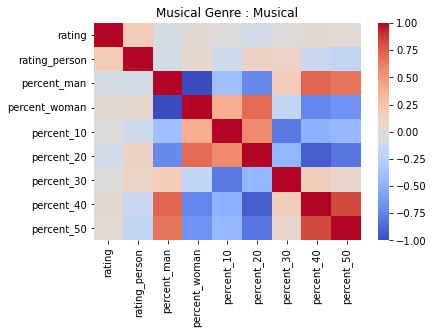

2016년
연령별
뮤지컬 뮤지컬 10대 비율 :  3.57
뮤지컬 뮤지컬 20대 비율 :  37.93
뮤지컬 뮤지컬 30대 비율 :  34.91
뮤지컬 뮤지컬 40대 비율 :  17.55
뮤지컬 뮤지컬 50대 비율 :  5.09
성별
뮤지컬 뮤지컬 남성 비율 :  17.51
뮤지컬 뮤지컬 여성 비율 :  82.49


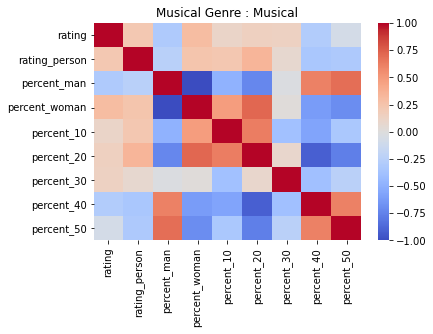

2017년
연령별
뮤지컬 뮤지컬 10대 비율 :  4.52
뮤지컬 뮤지컬 20대 비율 :  37.38
뮤지컬 뮤지컬 30대 비율 :  36.32
뮤지컬 뮤지컬 40대 비율 :  17.01
뮤지컬 뮤지컬 50대 비율 :  3.76
성별
뮤지컬 뮤지컬 남성 비율 :  14.47
뮤지컬 뮤지컬 여성 비율 :  85.52


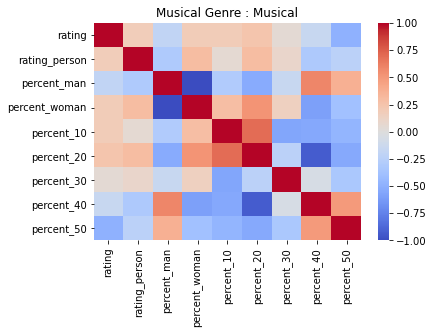

2018년
연령별
뮤지컬 뮤지컬 10대 비율 :  3.67
뮤지컬 뮤지컬 20대 비율 :  32.73
뮤지컬 뮤지컬 30대 비율 :  35.55
뮤지컬 뮤지컬 40대 비율 :  20.02
뮤지컬 뮤지컬 50대 비율 :  5.63
성별
뮤지컬 뮤지컬 남성 비율 :  20.94
뮤지컬 뮤지컬 여성 비율 :  79.06


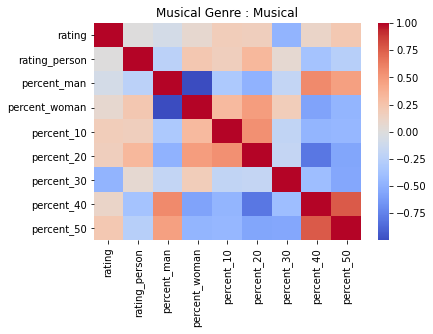

2019년
연령별
뮤지컬 뮤지컬 10대 비율 :  3.8
뮤지컬 뮤지컬 20대 비율 :  35.04
뮤지컬 뮤지컬 30대 비율 :  32.02
뮤지컬 뮤지컬 40대 비율 :  21.41
뮤지컬 뮤지컬 50대 비율 :  6.27
성별
뮤지컬 뮤지컬 남성 비율 :  15.88
뮤지컬 뮤지컬 여성 비율 :  84.12


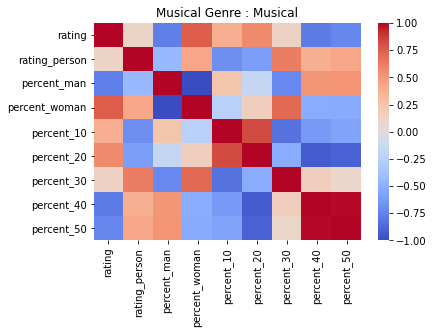

2021년
연령별
뮤지컬 뮤지컬 10대 비율 :  0.5
뮤지컬 뮤지컬 20대 비율 :  7.1
뮤지컬 뮤지컬 30대 비율 :  33.2
뮤지컬 뮤지컬 40대 비율 :  54.3
뮤지컬 뮤지컬 50대 비율 :  4.0
성별
뮤지컬 뮤지컬 남성 비율 :  29.1
뮤지컬 뮤지컬 여성 비율 :  70.9


In [22]:
sns.heatmap(df_2014_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
print('2014년')
print('연령별')
print("뮤지컬 뮤지컬 10대 비율 : ", df_2014_c_10)
print("뮤지컬 뮤지컬 20대 비율 : ", df_2014_c_20)
print("뮤지컬 뮤지컬 30대 비율 : ", df_2014_c_30)
print("뮤지컬 뮤지컬 40대 비율 : ", df_2014_c_40)
print("뮤지컬 뮤지컬 50대 비율 : ", df_2014_c_50)
print('성별')
print("뮤지컬 뮤지컬 남성 비율 : ", df_2014_c_m)
print("뮤지컬 뮤지컬 여성 비율 : ", df_2014_c_w)
###
sns.heatmap(df_2015_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
print('2015년')
print('연령별')
print("뮤지컬 뮤지컬 10대 비율 : ", df_2015_c_10)
print("뮤지컬 뮤지컬 20대 비율 : ", df_2015_c_20)
print("뮤지컬 뮤지컬 30대 비율 : ", df_2015_c_30)
print("뮤지컬 뮤지컬 40대 비율 : ", df_2015_c_40)
print("뮤지컬 뮤지컬 50대 비율 : ", df_2015_c_50)
print('성별')
print("뮤지컬 뮤지컬 남성 비율 : ", df_2015_c_m)
print("뮤지컬 뮤지컬 여성 비율 : ", df_2015_c_w)

###
sns.heatmap(df_2016_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
print('2016년')
print('연령별')
print("뮤지컬 뮤지컬 10대 비율 : ", df_2016_c_10)
print("뮤지컬 뮤지컬 20대 비율 : ", df_2016_c_20)
print("뮤지컬 뮤지컬 30대 비율 : ", df_2016_c_30)
print("뮤지컬 뮤지컬 40대 비율 : ", df_2016_c_40)
print("뮤지컬 뮤지컬 50대 비율 : ", df_2016_c_50)
print('성별')
print("뮤지컬 뮤지컬 남성 비율 : ", df_2016_c_m)
print("뮤지컬 뮤지컬 여성 비율 : ", df_2016_c_w)
###
sns.heatmap(df_2017_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
print('2017년')
print('연령별')
print("뮤지컬 뮤지컬 10대 비율 : ", df_2017_c_10)
print("뮤지컬 뮤지컬 20대 비율 : ", df_2017_c_20)
print("뮤지컬 뮤지컬 30대 비율 : ", df_2017_c_30)
print("뮤지컬 뮤지컬 40대 비율 : ", df_2017_c_40)
print("뮤지컬 뮤지컬 50대 비율 : ", df_2017_c_50)
print('성별')
print("뮤지컬 뮤지컬 남성 비율 : ", df_2017_c_m)
print("뮤지컬 뮤지컬 여성 비율 : ", df_2017_c_w)
###
sns.heatmap(df_2018_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
print('2018년')
print('연령별')
print("뮤지컬 뮤지컬 10대 비율 : ", df_2018_c_10)
print("뮤지컬 뮤지컬 20대 비율 : ", df_2018_c_20)
print("뮤지컬 뮤지컬 30대 비율 : ", df_2018_c_30)
print("뮤지컬 뮤지컬 40대 비율 : ", df_2018_c_40)
print("뮤지컬 뮤지컬 50대 비율 : ", df_2018_c_50)
print('성별')
print("뮤지컬 뮤지컬 남성 비율 : ", df_2018_c_m)
print("뮤지컬 뮤지컬 여성 비율 : ", df_2018_c_w)
###
sns.heatmap(df_2019_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
print('2019년')
print('연령별')
print("뮤지컬 뮤지컬 10대 비율 : ", df_2019_c_10)
print("뮤지컬 뮤지컬 20대 비율 : ", df_2019_c_20)
print("뮤지컬 뮤지컬 30대 비율 : ", df_2019_c_30)
print("뮤지컬 뮤지컬 40대 비율 : ", df_2019_c_40)
print("뮤지컬 뮤지컬 50대 비율 : ", df_2019_c_50)
print('성별')
print("뮤지컬 뮤지컬 남성 비율 : ", df_2019_c_m)
print("뮤지컬 뮤지컬 여성 비율 : ", df_2019_c_w)
###
sns.heatmap(df_2021_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Musical')
plt.show()
print('2021년')
print('연령별')
print("뮤지컬 뮤지컬 10대 비율 : ", df_2021_c_10)
print("뮤지컬 뮤지컬 20대 비율 : ", df_2021_c_20)
print("뮤지컬 뮤지컬 30대 비율 : ", df_2021_c_30)
print("뮤지컬 뮤지컬 40대 비율 : ", df_2021_c_40)
print("뮤지컬 뮤지컬 50대 비율 : ", df_2021_c_50)
print('성별')
print("뮤지컬 뮤지컬 남성 비율 : ", df_2021_c_m)
print("뮤지컬 뮤지컬 여성 비율 : ", df_2021_c_w)

### 어린이/가족

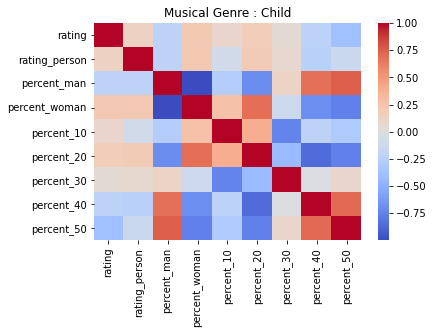

2014년
연령별
어린이/가족 뮤지컬 10대 비율 :  0.17
어린이/가족 뮤지컬 20대 비율 :  4.85
어린이/가족 뮤지컬 30대 비율 :  74.03
어린이/가족 뮤지컬 40대 비율 :  19.78
어린이/가족 뮤지컬 50대 비율 :  0.57
성별
어린이/가족 뮤지컬 남성 비율 :  25.93
어린이/가족 뮤지컬 여성 비율 :  74.07


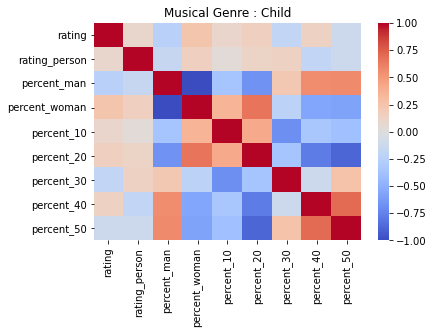

2015년
연령별
어린이/가족 뮤지컬 10대 비율 :  0.45
어린이/가족 뮤지컬 20대 비율 :  5.54
어린이/가족 뮤지컬 30대 비율 :  70.66
어린이/가족 뮤지컬 40대 비율 :  22.03
어린이/가족 뮤지컬 50대 비율 :  0.77
성별
어린이/가족 뮤지컬 남성 비율 :  25.97
어린이/가족 뮤지컬 여성 비율 :  74.03


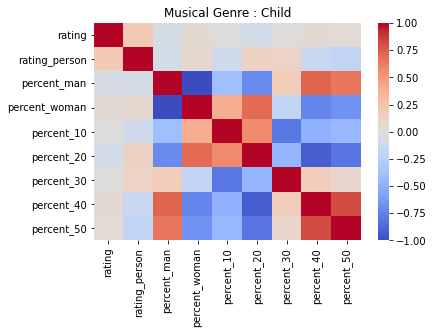

2016년
연령별
어린이/가족 뮤지컬 10대 비율 :  0.36
어린이/가족 뮤지컬 20대 비율 :  4.9
어린이/가족 뮤지컬 30대 비율 :  70.42
어린이/가족 뮤지컬 40대 비율 :  22.43
어린이/가족 뮤지컬 50대 비율 :  1.25
성별
어린이/가족 뮤지컬 남성 비율 :  24.82
어린이/가족 뮤지컬 여성 비율 :  75.18


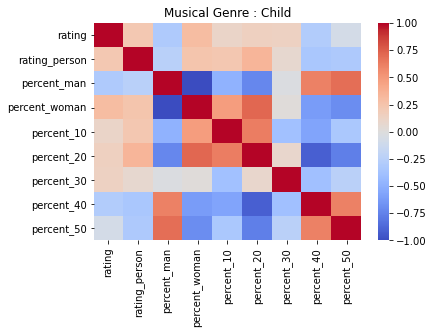

2017년
연령별
어린이/가족 뮤지컬 10대 비율 :  0.24
어린이/가족 뮤지컬 20대 비율 :  4.26
어린이/가족 뮤지컬 30대 비율 :  71.29
어린이/가족 뮤지컬 40대 비율 :  22.12
어린이/가족 뮤지컬 50대 비율 :  1.22
성별
어린이/가족 뮤지컬 남성 비율 :  23.02
어린이/가족 뮤지컬 여성 비율 :  76.98


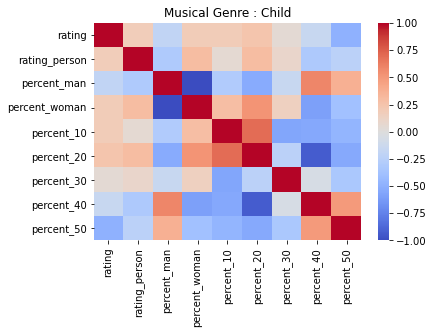

2018년
연령별
어린이/가족 뮤지컬 10대 비율 :  0.39
어린이/가족 뮤지컬 20대 비율 :  4.19
어린이/가족 뮤지컬 30대 비율 :  69.44
어린이/가족 뮤지컬 40대 비율 :  24.4
어린이/가족 뮤지컬 50대 비율 :  1.0
성별
어린이/가족 뮤지컬 남성 비율 :  21.71
어린이/가족 뮤지컬 여성 비율 :  78.3


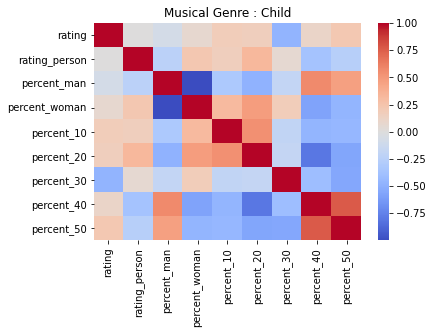

2019년
연령별
어린이/가족 뮤지컬 10대 비율 :  0.16
어린이/가족 뮤지컬 20대 비율 :  4.27
어린이/가족 뮤지컬 30대 비율 :  72.02
어린이/가족 뮤지컬 40대 비율 :  22.13
어린이/가족 뮤지컬 50대 비율 :  0.83
성별
어린이/가족 뮤지컬 남성 비율 :  20.96
어린이/가족 뮤지컬 여성 비율 :  79.04


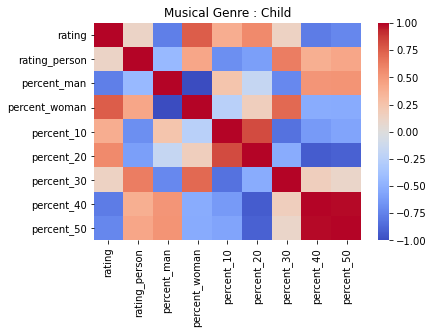

2021년
연령별
어린이/가족 뮤지컬 10대 비율 :  0.0
어린이/가족 뮤지컬 20대 비율 :  3.02
어린이/가족 뮤지컬 30대 비율 :  57.9
어린이/가족 뮤지컬 40대 비율 :  36.92
어린이/가족 뮤지컬 50대 비율 :  1.78
성별
어린이/가족 뮤지컬 남성 비율 :  34.67
어린이/가족 뮤지컬 여성 비율 :  65.32


In [23]:
sns.heatmap(df_2014_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child')
plt.show()
print('2014년')
print('연령별')
print("어린이/가족 뮤지컬 10대 비율 : ", df_2014_d_10)
print("어린이/가족 뮤지컬 20대 비율 : ", df_2014_d_20)
print("어린이/가족 뮤지컬 30대 비율 : ", df_2014_d_30)
print("어린이/가족 뮤지컬 40대 비율 : ", df_2014_d_40)
print("어린이/가족 뮤지컬 50대 비율 : ", df_2014_d_50)
print('성별')
print("어린이/가족 뮤지컬 남성 비율 : ", df_2014_d_m)
print("어린이/가족 뮤지컬 여성 비율 : ", df_2014_d_w)
###
sns.heatmap(df_2015_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child')
plt.show()
print('2015년')
print('연령별')
print("어린이/가족 뮤지컬 10대 비율 : ", df_2015_d_10)
print("어린이/가족 뮤지컬 20대 비율 : ", df_2015_d_20)
print("어린이/가족 뮤지컬 30대 비율 : ", df_2015_d_30)
print("어린이/가족 뮤지컬 40대 비율 : ", df_2015_d_40)
print("어린이/가족 뮤지컬 50대 비율 : ", df_2015_d_50)
print('성별')
print("어린이/가족 뮤지컬 남성 비율 : ", df_2015_d_m)
print("어린이/가족 뮤지컬 여성 비율 : ", df_2015_d_w)

###
sns.heatmap(df_2016_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child')
plt.show()
print('2016년')
print('연령별')
print("어린이/가족 뮤지컬 10대 비율 : ", df_2016_d_10)
print("어린이/가족 뮤지컬 20대 비율 : ", df_2016_d_20)
print("어린이/가족 뮤지컬 30대 비율 : ", df_2016_d_30)
print("어린이/가족 뮤지컬 40대 비율 : ", df_2016_d_40)
print("어린이/가족 뮤지컬 50대 비율 : ", df_2016_d_50)
print('성별')
print("어린이/가족 뮤지컬 남성 비율 : ", df_2016_d_m)
print("어린이/가족 뮤지컬 여성 비율 : ", df_2016_d_w)
###
sns.heatmap(df_2017_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child')
plt.show()
print('2017년')
print('연령별')
print("어린이/가족 뮤지컬 10대 비율 : ", df_2017_d_10)
print("어린이/가족 뮤지컬 20대 비율 : ", df_2017_d_20)
print("어린이/가족 뮤지컬 30대 비율 : ", df_2017_d_30)
print("어린이/가족 뮤지컬 40대 비율 : ", df_2017_d_40)
print("어린이/가족 뮤지컬 50대 비율 : ", df_2017_d_50)
print('성별')
print("어린이/가족 뮤지컬 남성 비율 : ", df_2017_d_m)
print("어린이/가족 뮤지컬 여성 비율 : ", df_2017_d_w)
###
sns.heatmap(df_2018_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child')
plt.show()
print('2018년')
print('연령별')
print("어린이/가족 뮤지컬 10대 비율 : ", df_2018_d_10)
print("어린이/가족 뮤지컬 20대 비율 : ", df_2018_d_20)
print("어린이/가족 뮤지컬 30대 비율 : ", df_2018_d_30)
print("어린이/가족 뮤지컬 40대 비율 : ", df_2018_d_40)
print("어린이/가족 뮤지컬 50대 비율 : ", df_2018_d_50)
print('성별')
print("어린이/가족 뮤지컬 남성 비율 : ", df_2018_d_m)
print("어린이/가족 뮤지컬 여성 비율 : ", df_2018_d_w)
###
sns.heatmap(df_2019_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child')
plt.show()
print('2019년')
print('연령별')
print("어린이/가족 뮤지컬 10대 비율 : ", df_2019_d_10)
print("어린이/가족 뮤지컬 20대 비율 : ", df_2019_d_20)
print("어린이/가족 뮤지컬 30대 비율 : ", df_2019_d_30)
print("어린이/가족 뮤지컬 40대 비율 : ", df_2019_d_40)
print("어린이/가족 뮤지컬 50대 비율 : ", df_2019_d_50)
print('성별')
print("어린이/가족 뮤지컬 남성 비율 : ", df_2019_d_m)
print("어린이/가족 뮤지컬 여성 비율 : ", df_2019_d_w)
###
sns.heatmap(df_2021_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Child')
plt.show()
print('2021년')
print('연령별')
print("어린이/가족 뮤지컬 10대 비율 : ", df_2021_d_10)
print("어린이/가족 뮤지컬 20대 비율 : ", df_2021_d_20)
print("어린이/가족 뮤지컬 30대 비율 : ", df_2021_d_30)
print("어린이/가족 뮤지컬 40대 비율 : ", df_2021_d_40)
print("어린이/가족 뮤지컬 50대 비율 : ", df_2021_d_50)
print('성별')
print("어린이/가족 뮤지컬 남성 비율 : ", df_2021_d_m)
print("어린이/가족 뮤지컬 여성 비율 : ", df_2021_d_w)


### 퍼포먼스

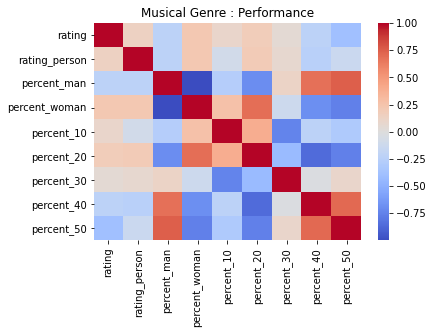

2014년
연령별
퍼포먼스 뮤지컬 10대 비율 :  0.96
퍼포먼스 뮤지컬 20대 비율 :  14.3
퍼포먼스 뮤지컬 30대 비율 :  41.62
퍼포먼스 뮤지컬 40대 비율 :  37.47
퍼포먼스 뮤지컬 50대 비율 :  4.64
성별
퍼포먼스 뮤지컬 남성 비율 :  32.83
퍼포먼스 뮤지컬 여성 비율 :  67.17


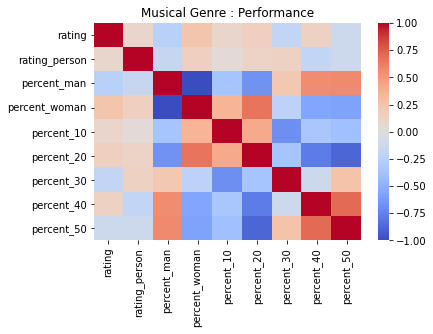

2015년
연령별
퍼포먼스 뮤지컬 10대 비율 :  1.71
퍼포먼스 뮤지컬 20대 비율 :  14.34
퍼포먼스 뮤지컬 30대 비율 :  41.22
퍼포먼스 뮤지컬 40대 비율 :  36.76
퍼포먼스 뮤지컬 50대 비율 :  4.1
성별
퍼포먼스 뮤지컬 남성 비율 :  34.33
퍼포먼스 뮤지컬 여성 비율 :  65.67


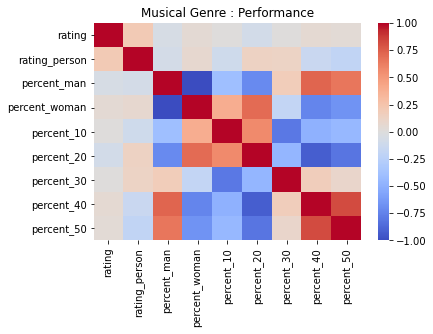

2016년
연령별
퍼포먼스 뮤지컬 10대 비율 :  1.15
퍼포먼스 뮤지컬 20대 비율 :  18.78
퍼포먼스 뮤지컬 30대 비율 :  39.94
퍼포먼스 뮤지컬 40대 비율 :  31.96
퍼포먼스 뮤지컬 50대 비율 :  7.74
성별
퍼포먼스 뮤지컬 남성 비율 :  38.82
퍼포먼스 뮤지컬 여성 비율 :  61.18


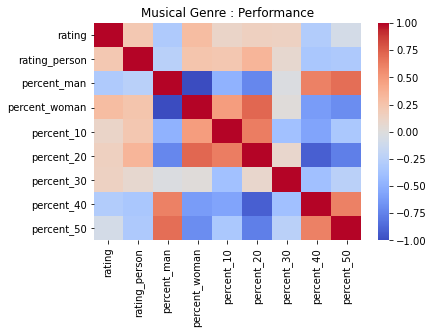

2017년
연령별
퍼포먼스 뮤지컬 10대 비율 :  1.16
퍼포먼스 뮤지컬 20대 비율 :  12.01
퍼포먼스 뮤지컬 30대 비율 :  40.19
퍼포먼스 뮤지컬 40대 비율 :  38.49
퍼포먼스 뮤지컬 50대 비율 :  6.25
성별
퍼포먼스 뮤지컬 남성 비율 :  33.27
퍼포먼스 뮤지컬 여성 비율 :  66.74


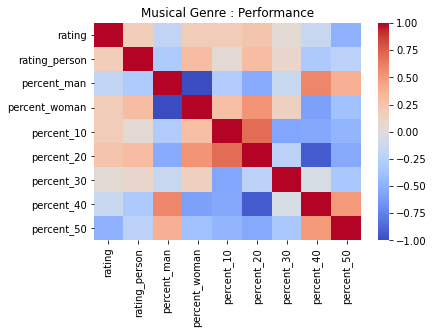

2018년
연령별
퍼포먼스 뮤지컬 10대 비율 :  3.09
퍼포먼스 뮤지컬 20대 비율 :  13.35
퍼포먼스 뮤지컬 30대 비율 :  35.75
퍼포먼스 뮤지컬 40대 비율 :  38.82
퍼포먼스 뮤지컬 50대 비율 :  7.18
성별
퍼포먼스 뮤지컬 남성 비율 :  23.97
퍼포먼스 뮤지컬 여성 비율 :  76.03


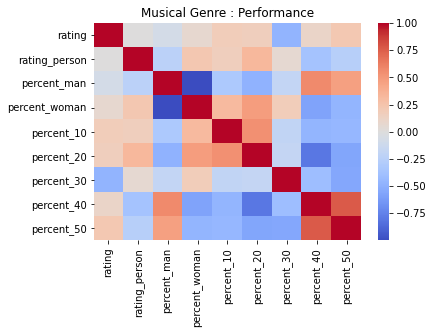

2019년
연령별
퍼포먼스 뮤지컬 10대 비율 :  2.02
퍼포먼스 뮤지컬 20대 비율 :  10.46
퍼포먼스 뮤지컬 30대 비율 :  34.98
퍼포먼스 뮤지컬 40대 비율 :  43.1
퍼포먼스 뮤지컬 50대 비율 :  7.71
성별
퍼포먼스 뮤지컬 남성 비율 :  31.85
퍼포먼스 뮤지컬 여성 비율 :  68.15


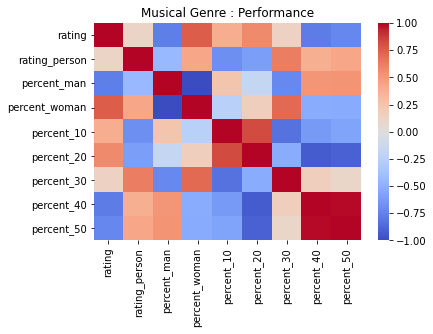

2021년
연령별
퍼포먼스 뮤지컬 10대 비율 :  0.0
퍼포먼스 뮤지컬 20대 비율 :  0.0
퍼포먼스 뮤지컬 30대 비율 :  33.3
퍼포먼스 뮤지컬 40대 비율 :  66.7
퍼포먼스 뮤지컬 50대 비율 :  0.0
성별
퍼포먼스 뮤지컬 남성 비율 :  33.3
퍼포먼스 뮤지컬 여성 비율 :  66.7


In [24]:
sns.heatmap(df_2014_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Performance')
plt.show()
print('2014년')
print('연령별')
print("퍼포먼스 뮤지컬 10대 비율 : ", df_2014_e_10)
print("퍼포먼스 뮤지컬 20대 비율 : ", df_2014_e_20)
print("퍼포먼스 뮤지컬 30대 비율 : ", df_2014_e_30)
print("퍼포먼스 뮤지컬 40대 비율 : ", df_2014_e_40)
print("퍼포먼스 뮤지컬 50대 비율 : ", df_2014_e_50)
print('성별')
print("퍼포먼스 뮤지컬 남성 비율 : ", df_2014_e_m)
print("퍼포먼스 뮤지컬 여성 비율 : ", df_2014_e_w)
###
sns.heatmap(df_2015_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Performance')
plt.show()
print('2015년')
print('연령별')
print("퍼포먼스 뮤지컬 10대 비율 : ", df_2015_e_10)
print("퍼포먼스 뮤지컬 20대 비율 : ", df_2015_e_20)
print("퍼포먼스 뮤지컬 30대 비율 : ", df_2015_e_30)
print("퍼포먼스 뮤지컬 40대 비율 : ", df_2015_e_40)
print("퍼포먼스 뮤지컬 50대 비율 : ", df_2015_e_50)
print('성별')
print("퍼포먼스 뮤지컬 남성 비율 : ", df_2015_e_m)
print("퍼포먼스 뮤지컬 여성 비율 : ", df_2015_e_w)

###
sns.heatmap(df_2016_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Performance')
plt.show()
print('2016년')
print('연령별')
print("퍼포먼스 뮤지컬 10대 비율 : ", df_2016_e_10)
print("퍼포먼스 뮤지컬 20대 비율 : ", df_2016_e_20)
print("퍼포먼스 뮤지컬 30대 비율 : ", df_2016_e_30)
print("퍼포먼스 뮤지컬 40대 비율 : ", df_2016_e_40)
print("퍼포먼스 뮤지컬 50대 비율 : ", df_2016_e_50)
print('성별')
print("퍼포먼스 뮤지컬 남성 비율 : ", df_2016_e_m)
print("퍼포먼스 뮤지컬 여성 비율 : ", df_2016_e_w)
###
sns.heatmap(df_2017_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Performance')
plt.show()
print('2017년')
print('연령별')
print("퍼포먼스 뮤지컬 10대 비율 : ", df_2017_e_10)
print("퍼포먼스 뮤지컬 20대 비율 : ", df_2017_e_20)
print("퍼포먼스 뮤지컬 30대 비율 : ", df_2017_e_30)
print("퍼포먼스 뮤지컬 40대 비율 : ", df_2017_e_40)
print("퍼포먼스 뮤지컬 50대 비율 : ", df_2017_e_50)
print('성별')
print("퍼포먼스 뮤지컬 남성 비율 : ", df_2017_e_m)
print("퍼포먼스 뮤지컬 여성 비율 : ", df_2017_e_w)
###
sns.heatmap(df_2018_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Performance')
plt.show()
print('2018년')
print('연령별')
print("퍼포먼스 뮤지컬 10대 비율 : ", df_2018_e_10)
print("퍼포먼스 뮤지컬 20대 비율 : ", df_2018_e_20)
print("퍼포먼스 뮤지컬 30대 비율 : ", df_2018_e_30)
print("퍼포먼스 뮤지컬 40대 비율 : ", df_2018_e_40)
print("퍼포먼스 뮤지컬 50대 비율 : ", df_2018_e_50)
print('성별')
print("퍼포먼스 뮤지컬 남성 비율 : ", df_2018_e_m)
print("퍼포먼스 뮤지컬 여성 비율 : ", df_2018_e_w)
###
sns.heatmap(df_2019_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Performance')
plt.show()
print('2019년')
print('연령별')
print("퍼포먼스 뮤지컬 10대 비율 : ", df_2019_e_10)
print("퍼포먼스 뮤지컬 20대 비율 : ", df_2019_e_20)
print("퍼포먼스 뮤지컬 30대 비율 : ", df_2019_e_30)
print("퍼포먼스 뮤지컬 40대 비율 : ", df_2019_e_40)
print("퍼포먼스 뮤지컬 50대 비율 : ", df_2019_e_50)
print('성별')
print("퍼포먼스 뮤지컬 남성 비율 : ", df_2019_e_m)
print("퍼포먼스 뮤지컬 여성 비율 : ", df_2019_e_w)
###
sns.heatmap(df_2021_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Performance')
plt.show()
print('2021년')
print('연령별')
print("퍼포먼스 뮤지컬 10대 비율 : ", df_2021_e_10)
print("퍼포먼스 뮤지컬 20대 비율 : ", df_2021_e_20)
print("퍼포먼스 뮤지컬 30대 비율 : ", df_2021_e_30)
print("퍼포먼스 뮤지컬 40대 비율 : ", df_2021_e_40)
print("퍼포먼스 뮤지컬 50대 비율 : ", df_2021_e_50)
print('성별')
print("퍼포먼스 뮤지컬 남성 비율 : ", df_2021_e_m)
print("퍼포먼스 뮤지컬 여성 비율 : ", df_2021_e_w)


### 오리지널

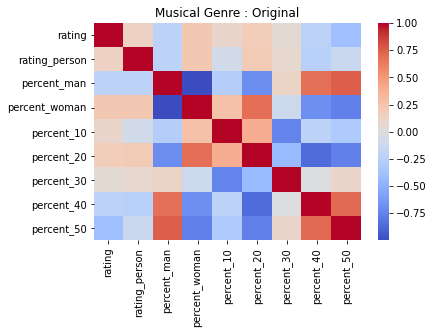

2014년
연령별
오리지널 뮤지컬 10대 비율 :  2.7
오리지널 뮤지컬 20대 비율 :  29.52
오리지널 뮤지컬 30대 비율 :  35.58
오리지널 뮤지컬 40대 비율 :  22.92
오리지널 뮤지컬 50대 비율 :  7.78
성별
오리지널 뮤지컬 남성 비율 :  31.91
오리지널 뮤지컬 여성 비율 :  68.09


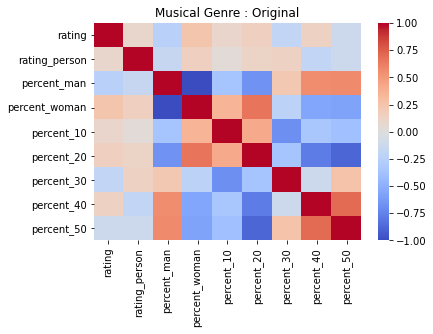

2015년
연령별
오리지널 뮤지컬 10대 비율 :  1.82
오리지널 뮤지컬 20대 비율 :  29.28
오리지널 뮤지컬 30대 비율 :  33.12
오리지널 뮤지컬 40대 비율 :  26.79
오리지널 뮤지컬 50대 비율 :  7.67
성별
오리지널 뮤지컬 남성 비율 :  34.01
오리지널 뮤지컬 여성 비율 :  65.99


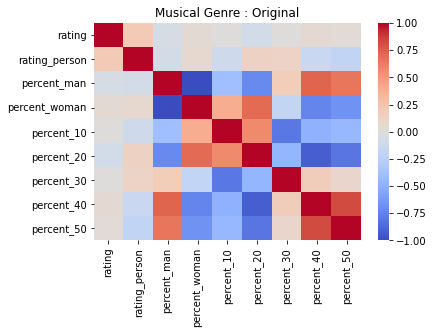

2016년
연령별
오리지널 뮤지컬 10대 비율 :  2.6
오리지널 뮤지컬 20대 비율 :  29.2
오리지널 뮤지컬 30대 비율 :  36.83
오리지널 뮤지컬 40대 비율 :  22.92
오리지널 뮤지컬 50대 비율 :  7.02
성별
오리지널 뮤지컬 남성 비율 :  24.75
오리지널 뮤지컬 여성 비율 :  75.25


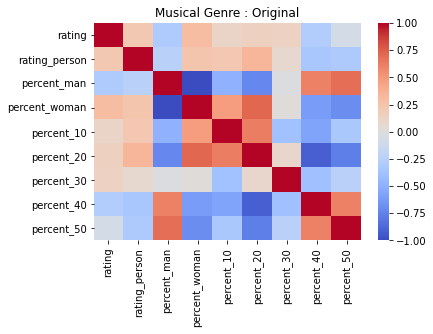

2017년
연령별
오리지널 뮤지컬 10대 비율 :  2.7
오리지널 뮤지컬 20대 비율 :  28.62
오리지널 뮤지컬 30대 비율 :  33.88
오리지널 뮤지컬 40대 비율 :  25.81
오리지널 뮤지컬 50대 비율 :  7.73
성별
오리지널 뮤지컬 남성 비율 :  27.87
오리지널 뮤지컬 여성 비율 :  72.13


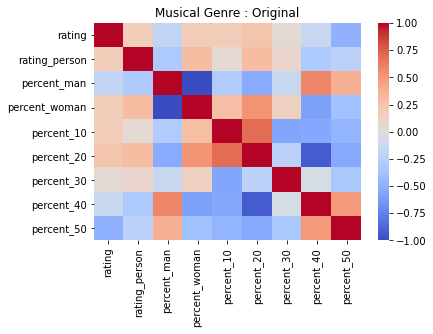

2018년
연령별
오리지널 뮤지컬 10대 비율 :  3.02
오리지널 뮤지컬 20대 비율 :  33.39
오리지널 뮤지컬 30대 비율 :  31.77
오리지널 뮤지컬 40대 비율 :  21.82
오리지널 뮤지컬 50대 비율 :  7.13
성별
오리지널 뮤지컬 남성 비율 :  19.31
오리지널 뮤지컬 여성 비율 :  80.69


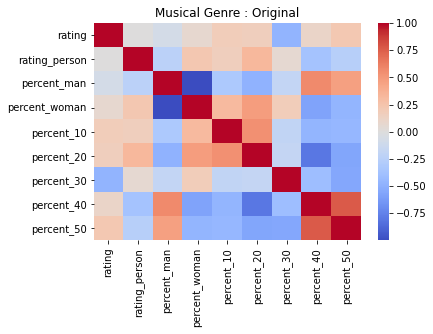

2019년
연령별
오리지널 뮤지컬 10대 비율 :  1.29
오리지널 뮤지컬 20대 비율 :  22.38
오리지널 뮤지컬 30대 비율 :  30.79
오리지널 뮤지컬 40대 비율 :  28.76
오리지널 뮤지컬 50대 비율 :  14.35
성별
오리지널 뮤지컬 남성 비율 :  30.6
오리지널 뮤지컬 여성 비율 :  69.4


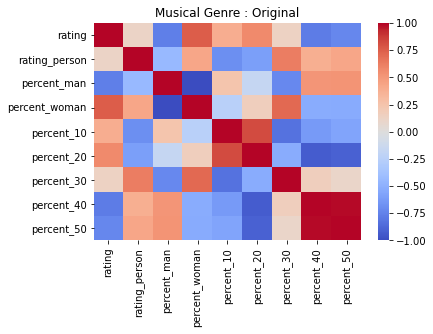

2021년
연령별
오리지널 뮤지컬 10대 비율 :  2.9
오리지널 뮤지컬 20대 비율 :  30.0
오리지널 뮤지컬 30대 비율 :  29.9
오리지널 뮤지컬 40대 비율 :  25.0
오리지널 뮤지컬 50대 비율 :  10.7
성별
오리지널 뮤지컬 남성 비율 :  29.2
오리지널 뮤지컬 여성 비율 :  70.8


In [25]:
sns.heatmap(df_2014_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
print('2014년')
print('연령별')
print("오리지널 뮤지컬 10대 비율 : ", df_2014_f_10)
print("오리지널 뮤지컬 20대 비율 : ", df_2014_f_20)
print("오리지널 뮤지컬 30대 비율 : ", df_2014_f_30)
print("오리지널 뮤지컬 40대 비율 : ", df_2014_f_40)
print("오리지널 뮤지컬 50대 비율 : ", df_2014_f_50)
print('성별')
print("오리지널 뮤지컬 남성 비율 : ", df_2014_f_m)
print("오리지널 뮤지컬 여성 비율 : ", df_2014_f_w)
###
sns.heatmap(df_2015_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
print('2015년')
print('연령별')
print("오리지널 뮤지컬 10대 비율 : ", df_2015_f_10)
print("오리지널 뮤지컬 20대 비율 : ", df_2015_f_20)
print("오리지널 뮤지컬 30대 비율 : ", df_2015_f_30)
print("오리지널 뮤지컬 40대 비율 : ", df_2015_f_40)
print("오리지널 뮤지컬 50대 비율 : ", df_2015_f_50)
print('성별')
print("오리지널 뮤지컬 남성 비율 : ", df_2015_f_m)
print("오리지널 뮤지컬 여성 비율 : ", df_2015_f_w)

###
sns.heatmap(df_2016_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
print('2016년')
print('연령별')
print("오리지널 뮤지컬 10대 비율 : ", df_2016_f_10)
print("오리지널 뮤지컬 20대 비율 : ", df_2016_f_20)
print("오리지널 뮤지컬 30대 비율 : ", df_2016_f_30)
print("오리지널 뮤지컬 40대 비율 : ", df_2016_f_40)
print("오리지널 뮤지컬 50대 비율 : ", df_2016_f_50)
print('성별')
print("오리지널 뮤지컬 남성 비율 : ", df_2016_f_m)
print("오리지널 뮤지컬 여성 비율 : ", df_2016_f_w)
###
sns.heatmap(df_2017_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
print('2017년')
print('연령별')
print("오리지널 뮤지컬 10대 비율 : ", df_2017_f_10)
print("오리지널 뮤지컬 20대 비율 : ", df_2017_f_20)
print("오리지널 뮤지컬 30대 비율 : ", df_2017_f_30)
print("오리지널 뮤지컬 40대 비율 : ", df_2017_f_40)
print("오리지널 뮤지컬 50대 비율 : ", df_2017_f_50)
print('성별')
print("오리지널 뮤지컬 남성 비율 : ", df_2017_f_m)
print("오리지널 뮤지컬 여성 비율 : ", df_2017_f_w)
###
sns.heatmap(df_2018_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
print('2018년')
print('연령별')
print("오리지널 뮤지컬 10대 비율 : ", df_2018_f_10)
print("오리지널 뮤지컬 20대 비율 : ", df_2018_f_20)
print("오리지널 뮤지컬 30대 비율 : ", df_2018_f_30)
print("오리지널 뮤지컬 40대 비율 : ", df_2018_f_40)
print("오리지널 뮤지컬 50대 비율 : ", df_2018_f_50)
print('성별')
print("오리지널 뮤지컬 남성 비율 : ", df_2018_f_m)
print("오리지널 뮤지컬 여성 비율 : ", df_2018_f_w)
###
sns.heatmap(df_2019_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
print('2019년')
print('연령별')
print("오리지널 뮤지컬 10대 비율 : ", df_2019_f_10)
print("오리지널 뮤지컬 20대 비율 : ", df_2019_f_20)
print("오리지널 뮤지컬 30대 비율 : ", df_2019_f_30)
print("오리지널 뮤지컬 40대 비율 : ", df_2019_f_40)
print("오리지널 뮤지컬 50대 비율 : ", df_2019_f_50)
print('성별')
print("오리지널 뮤지컬 남성 비율 : ", df_2019_f_m)
print("오리지널 뮤지컬 여성 비율 : ", df_2019_f_w)
###
sns.heatmap(df_2021_a.corr(), cmap='coolwarm')
plt.title('Musical Genre : Original')
plt.show()
print('2021년')
print('연령별')
print("오리지널 뮤지컬 10대 비율 : ", df_2021_f_10)
print("오리지널 뮤지컬 20대 비율 : ", df_2021_f_20)
print("오리지널 뮤지컬 30대 비율 : ", df_2021_f_30)
print("오리지널 뮤지컬 40대 비율 : ", df_2021_f_40)
print("오리지널 뮤지컬 50대 비율 : ", df_2021_f_50)
print('성별')
print("오리지널 뮤지컬 남성 비율 : ", df_2021_f_m)
print("오리지널 뮤지컬 여성 비율 : ", df_2021_f_w)


# 연도별 장르별 성별 관람율

In [26]:
coeff_year = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]).transpose()

연도별 가중치를 적용한 오리지널 장르의 성별 관람 점수
10대 :  77.02
20대 :  202.98


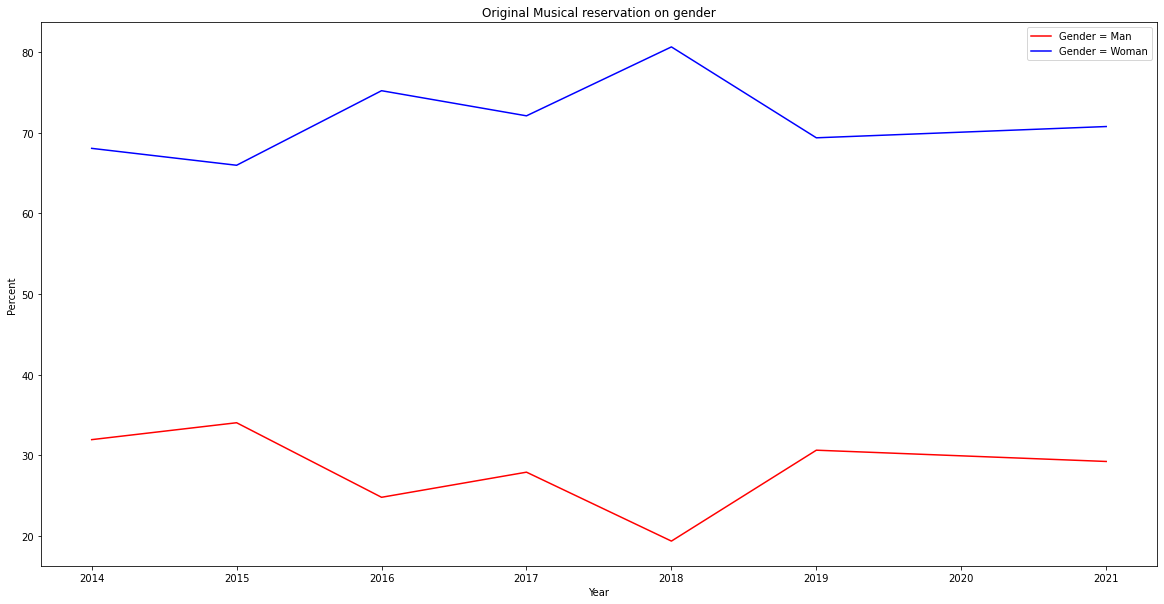

In [27]:
original_m = [df_2014_f_m, df_2015_f_m, df_2016_f_m, df_2017_f_m, df_2018_f_m, df_2019_f_m, df_2021_f_m]
original_w = [df_2014_f_w, df_2015_f_w, df_2016_f_w, df_2017_f_w, df_2018_f_w, df_2019_f_w, df_2021_f_w]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, original_m, color = 'red', label = 'Gender = Man')
plt.plot(x, original_w, color = 'blue', label = 'Gender = Woman')
plt.title('Original Musical reservation on gender')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_original_m = round(np.array(original_m).dot(coeff_year), 2)
coeff_original_w = round(np.array(original_w).dot(coeff_year), 2)
print("연도별 가중치를 적용한 오리지널 장르의 성별 관람 점수")
print("10대 : ", coeff_original_m)
print("20대 : ", coeff_original_w)

연도별 가중치를 적용한 퍼포먼스 장르의 성별 관람 점수
10대 :  89.51
20대 :  190.5


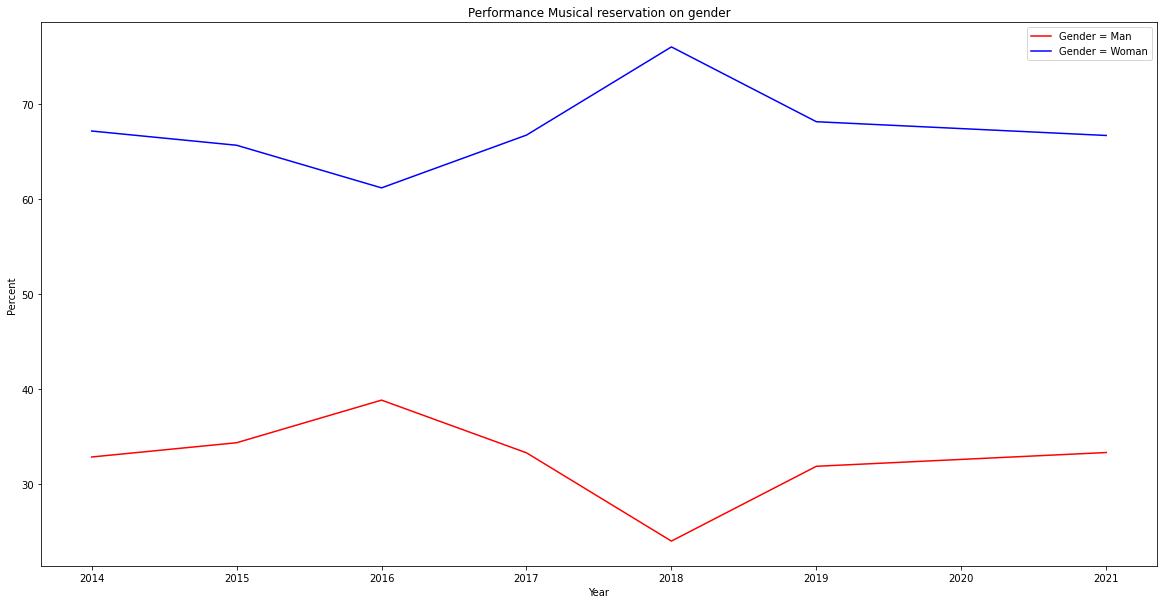

In [28]:
performance_m = [df_2014_e_m, df_2015_e_m, df_2016_e_m, df_2017_e_m, df_2018_e_m, df_2019_e_m, df_2021_e_m]
performance_w = [df_2014_e_w, df_2015_e_w, df_2016_e_w, df_2017_e_w, df_2018_e_w, df_2019_e_w, df_2021_e_w]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, performance_m, color = 'red', label = 'Gender = Man')
plt.plot(x, performance_w, color = 'blue', label = 'Gender = Woman')
plt.title('Performance Musical reservation on gender')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_performance_m = round(np.array(performance_m).dot(coeff_year), 2)
coeff_performance_w = round(np.array(performance_w).dot(coeff_year), 2)
print("연도별 가중치를 적용한 퍼포먼스 장르의 성별 관람 점수")
print("10대 : ", coeff_performance_m)
print("20대 : ", coeff_performance_w)

연도별 가중치를 적용한 어린이/가족 장르의 성별 관람 점수
10대 :  72.14
20대 :  207.86


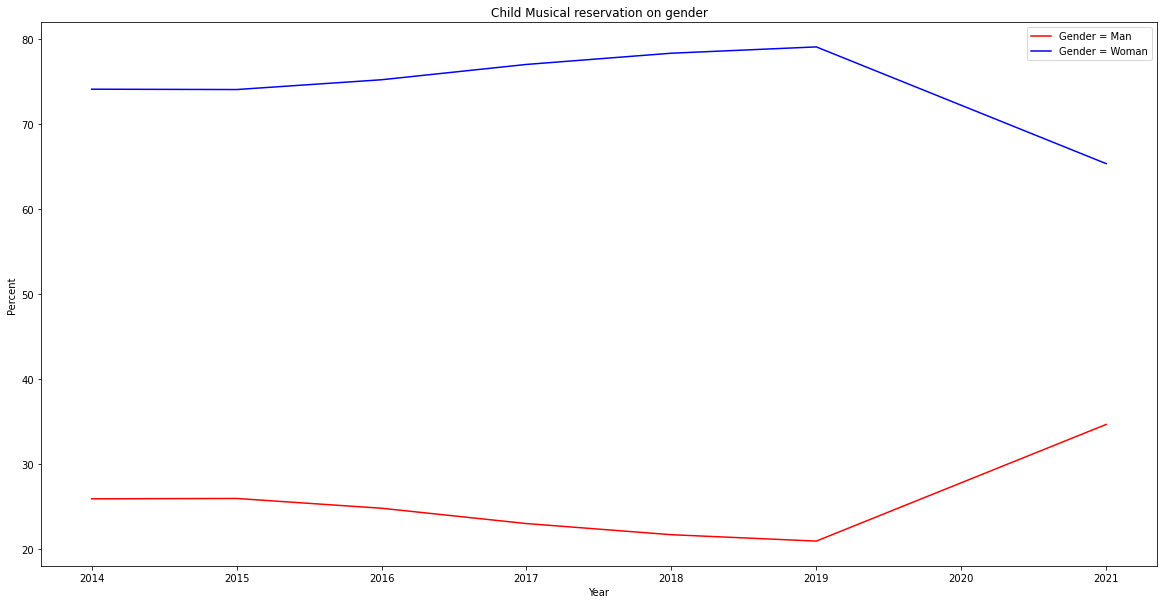

In [29]:
child_m = [df_2014_d_m, df_2015_d_m, df_2016_d_m, df_2017_d_m, df_2018_d_m, df_2019_d_m, df_2021_d_m]
child_w = [df_2014_d_w, df_2015_d_w, df_2016_d_w, df_2017_d_w, df_2018_d_w, df_2019_d_w, df_2021_d_w]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, child_m, color = 'red', label = 'Gender = Man')
plt.plot(x, child_w, color = 'blue', label = 'Gender = Woman')
plt.title('Child Musical reservation on gender')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_child_m = round(np.array(child_m).dot(coeff_year), 2)
coeff_child_w = round(np.array(child_w).dot(coeff_year), 2)
print("연도별 가중치를 적용한 어린이/가족 장르의 성별 관람 점수")
print("10대 : ", coeff_child_m)
print("20대 : ", coeff_child_w)

연도별 가중치를 적용한 뮤지컬 장르의 성별 관람 점수
10대 :  59.3
20대 :  220.7


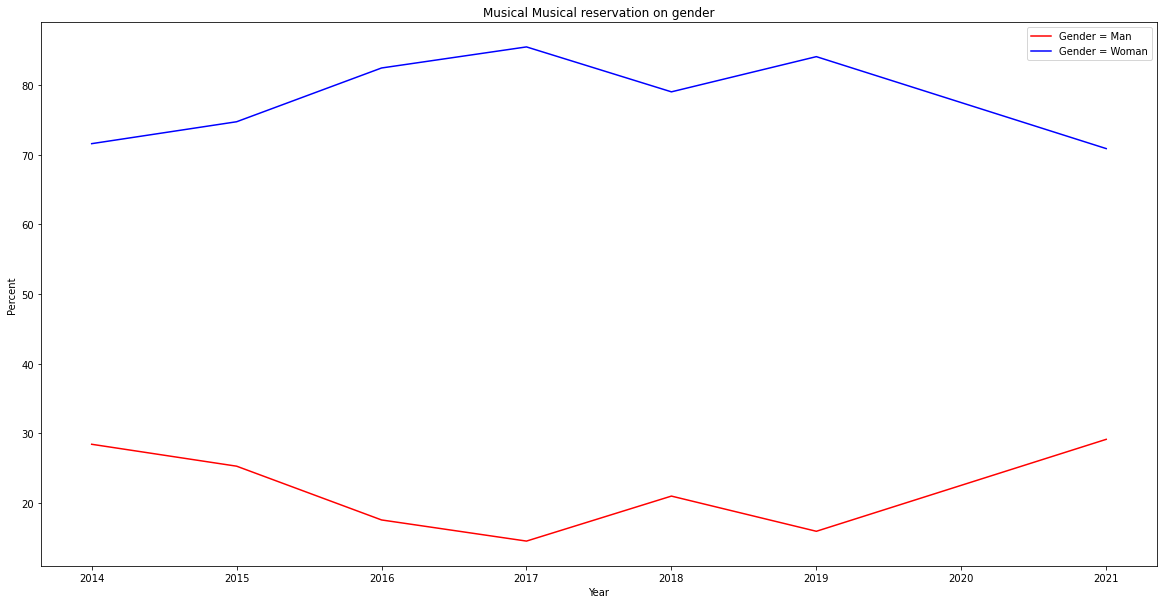

In [30]:
musical_m = [df_2014_c_m, df_2015_c_m, df_2016_c_m, df_2017_c_m, df_2018_c_m, df_2019_c_m, df_2021_c_m]
musical_w = [df_2014_c_w, df_2015_c_w, df_2016_c_w, df_2017_c_w, df_2018_c_w, df_2019_c_w, df_2021_c_w]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, musical_m, color = 'red', label = 'Gender = Man')
plt.plot(x, musical_w, color = 'blue', label = 'Gender = Woman')
plt.title('Musical Musical reservation on gender')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_musical_m = round(np.array(musical_m).dot(coeff_year), 2)
coeff_musical_w = round(np.array(musical_w).dot(coeff_year), 2)
print("연도별 가중치를 적용한 뮤지컬 장르의 성별 관람 점수")
print("10대 : ", coeff_musical_m)
print("20대 : ", coeff_musical_w)

연도별 가중치를 적용한 창작 장르의 성별 관람 점수
10대 :  63.64
20대 :  216.36


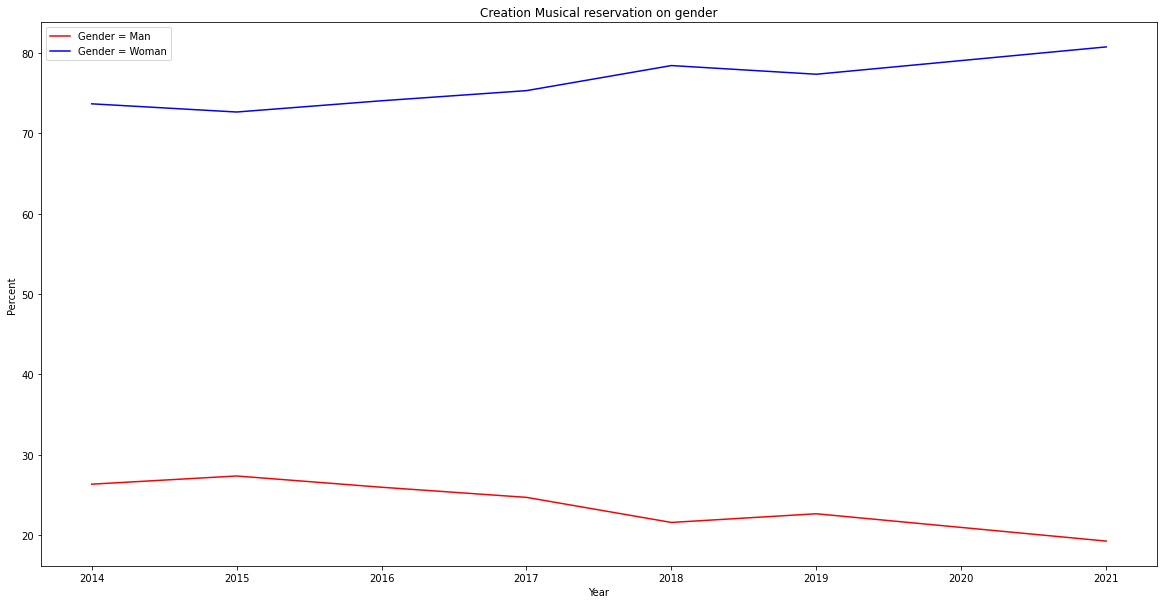

In [31]:
creation_m = [df_2014_b_m, df_2015_b_m, df_2016_b_m, df_2017_b_m, df_2018_b_m, df_2019_b_m, df_2021_b_m]
creation_w = [df_2014_b_w, df_2015_b_w, df_2016_b_w, df_2017_b_w, df_2018_b_w, df_2019_b_w, df_2021_b_w]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, creation_m, color = 'red', label = 'Gender = Man')
plt.plot(x, creation_w, color = 'blue', label = 'Gender = Woman')
plt.title('Creation Musical reservation on gender')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_creation_m = round(np.array(creation_m).dot(coeff_year), 2)
coeff_creation_w = round(np.array(creation_w).dot(coeff_year), 2)
print("연도별 가중치를 적용한 창작 장르의 성별 관람 점수")
print("10대 : ", coeff_creation_m)
print("20대 : ", coeff_creation_w)

연도별 가중치를 적용한 라이선스 장르의 성별 관람 점수
10대 :  55.43
20대 :  224.57


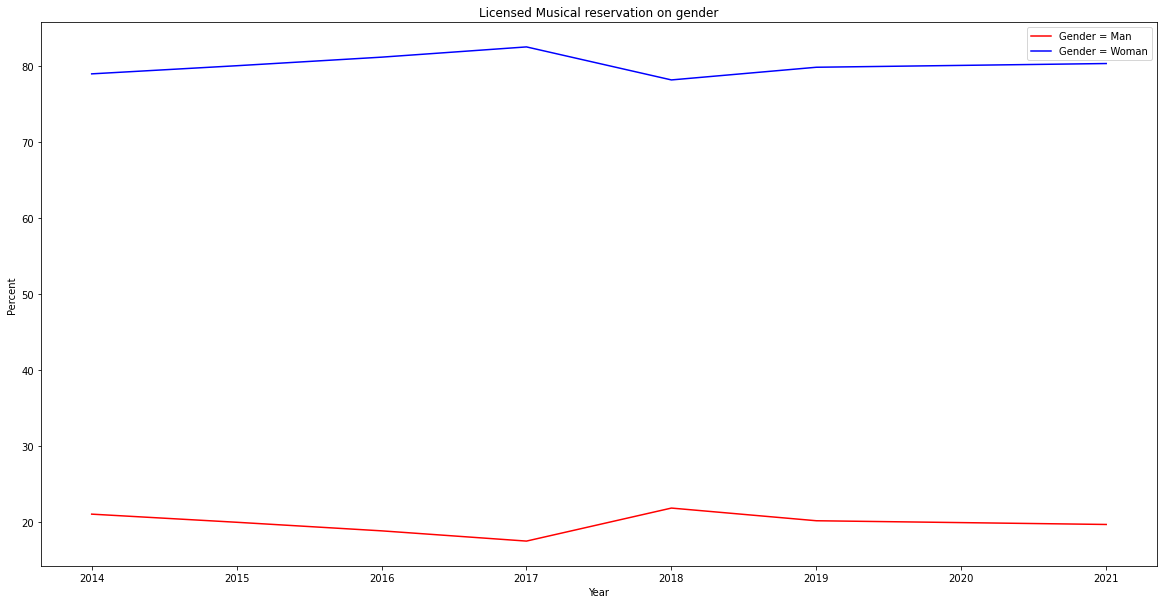

In [32]:
licensed_m = [df_2014_a_m, df_2015_a_m, df_2016_a_m, df_2017_a_m, df_2018_a_m, df_2019_a_m, df_2021_a_m]
licensed_w = [df_2014_a_w, df_2015_a_w, df_2016_a_w, df_2017_a_w, df_2018_a_w, df_2019_a_w, df_2021_a_w]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, licensed_m, color = 'red', label = 'Gender = Man')
plt.plot(x, licensed_w, color = 'blue', label = 'Gender = Woman')
plt.title('Licensed Musical reservation on gender')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_licensed_m = round(np.array(licensed_m).dot(coeff_year), 2)
coeff_licensed_w = round(np.array(licensed_w).dot(coeff_year), 2)
print("연도별 가중치를 적용한 라이선스 장르의 성별 관람 점수")
print("10대 : ", coeff_licensed_m)
print("20대 : ", coeff_licensed_w)

# 연도별 성별 장르 선호도 분석

[]

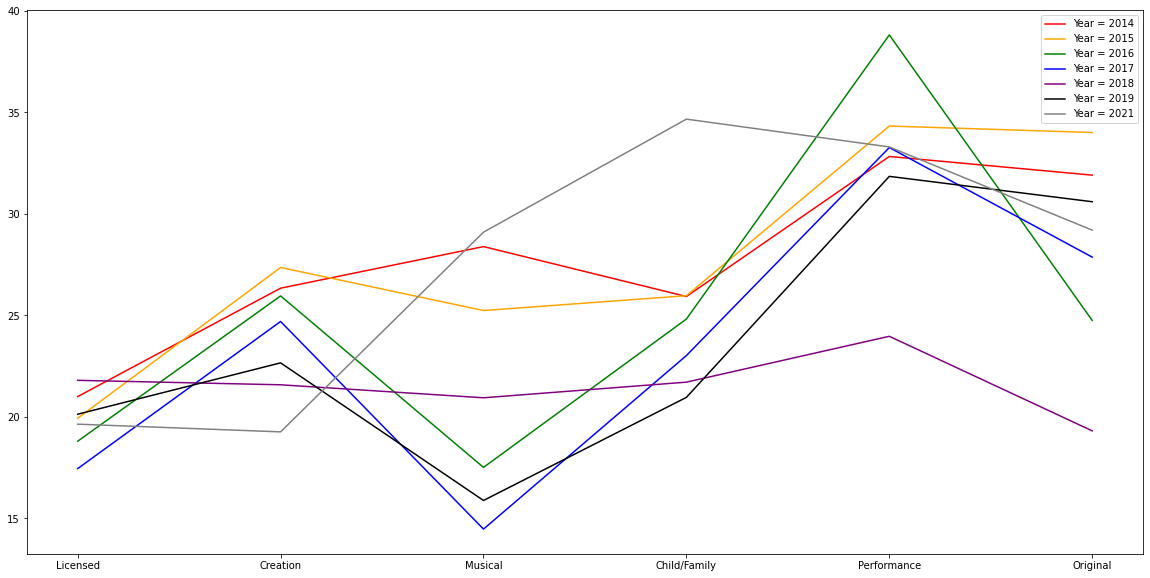

In [33]:
age_2014_m = [df_2014_a_m, df_2014_b_m, df_2014_c_m, df_2014_d_m, df_2014_e_m, df_2014_f_m]
age_2015_m = [df_2015_a_m, df_2015_b_m, df_2015_c_m, df_2015_d_m, df_2015_e_m, df_2015_f_m]
age_2016_m = [df_2016_a_m, df_2016_b_m, df_2016_c_m, df_2016_d_m, df_2016_e_m, df_2016_f_m]
age_2017_m = [df_2017_a_m, df_2017_b_m, df_2017_c_m, df_2017_d_m, df_2017_e_m, df_2017_f_m]
age_2018_m = [df_2018_a_m, df_2018_b_m, df_2018_c_m, df_2018_d_m, df_2018_e_m, df_2018_f_m]
age_2019_m = [df_2019_a_m, df_2019_b_m, df_2019_c_m, df_2019_d_m, df_2019_e_m, df_2019_f_m]
age_2021_m = [df_2021_a_m, df_2021_b_m, df_2021_c_m, df_2021_d_m, df_2021_e_m, df_2021_f_m]
x = ['Licensed', 'Creation', 'Musical', 'Child/Family', 'Performance', 'Original']
plt.figure(figsize = (20, 10))
plt.plot(x, age_2014_m, color = 'red', label = 'Year = 2014')
plt.plot(x, age_2015_m, color = 'orange', label = 'Year = 2015')
plt.plot(x, age_2016_m, color = 'green', label = 'Year = 2016')
plt.plot(x, age_2017_m, color = 'blue', label = 'Year = 2017')
plt.plot(x, age_2018_m, color = 'purple', label = 'Year = 2018')
plt.plot(x, age_2019_m, color = 'black', label = 'Year = 2019')
plt.plot(x, age_2021_m, color = 'gray', label = 'Year = 2021')
plt.legend()
plt.plot()

[]

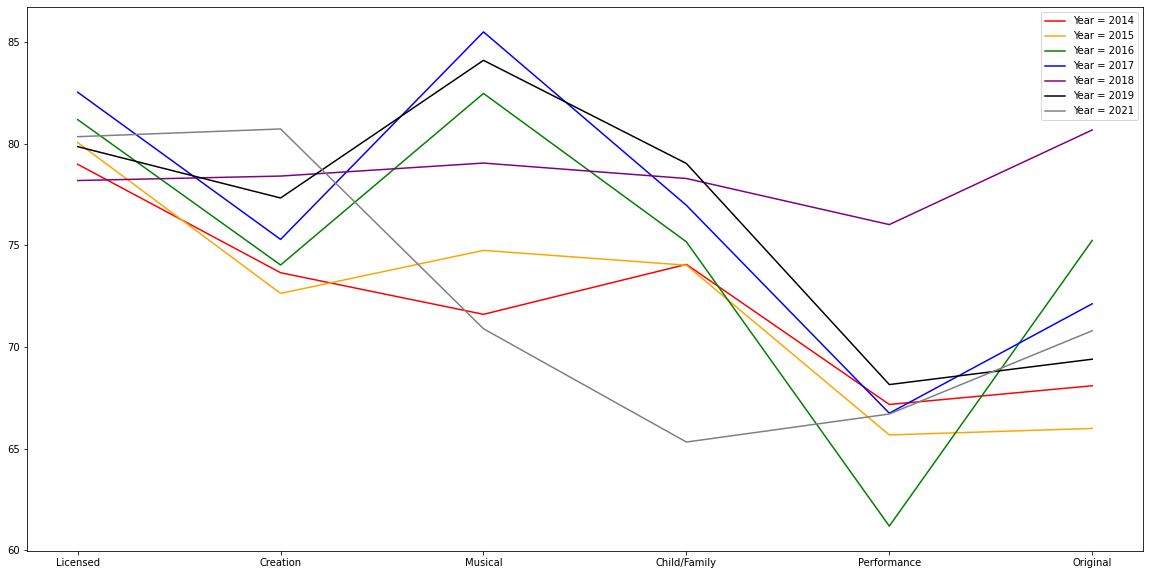

In [34]:
age_2014_w = [df_2014_a_w, df_2014_b_w, df_2014_c_w, df_2014_d_w, df_2014_e_w, df_2014_f_w]
age_2015_w = [df_2015_a_w, df_2015_b_w, df_2015_c_w, df_2015_d_w, df_2015_e_w, df_2015_f_w]
age_2016_w = [df_2016_a_w, df_2016_b_w, df_2016_c_w, df_2016_d_w, df_2016_e_w, df_2016_f_w]
age_2017_w = [df_2017_a_w, df_2017_b_w, df_2017_c_w, df_2017_d_w, df_2017_e_w, df_2017_f_w]
age_2018_w = [df_2018_a_w, df_2018_b_w, df_2018_c_w, df_2018_d_w, df_2018_e_w, df_2018_f_w]
age_2019_w = [df_2019_a_w, df_2019_b_w, df_2019_c_w, df_2019_d_w, df_2019_e_w, df_2019_f_w]
age_2021_w = [df_2021_a_w, df_2021_b_w, df_2021_c_w, df_2021_d_w, df_2021_e_w, df_2021_f_w]
x = ['Licensed', 'Creation', 'Musical', 'Child/Family', 'Performance', 'Original']
plt.figure(figsize = (20, 10))
plt.plot(x, age_2014_w, color = 'red', label = 'Year = 2014')
plt.plot(x, age_2015_w, color = 'orange', label = 'Year = 2015')
plt.plot(x, age_2016_w, color = 'green', label = 'Year = 2016')
plt.plot(x, age_2017_w, color = 'blue', label = 'Year = 2017')
plt.plot(x, age_2018_w, color = 'purple', label = 'Year = 2018')
plt.plot(x, age_2019_w, color = 'black', label = 'Year = 2019')
plt.plot(x, age_2021_w, color = 'gray', label = 'Year = 2021')
plt.legend()
plt.plot()

# 연도별 장르별 연령대 관람율
- 위의 계수들을 보면 시간이 흐름에 따라 특정 연령대의 관람률이 올라가거나 낮아지는 현상을 발견할 수 있다.
- 이에 대한 효과를 보기 위해 장르별로 연도별 연령대 관람율을 그래프로 그려보았다.
- 각 장르마다 연령대별로 관람율에 대한 점수를 매기려 한다
- 연도별로 변하는 특징을 반영하여, 최근으로 올수록 가중치를 높게, 과거로 갈수록 가중치를 낮게 조정한다

In [35]:
coeff_year = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]).transpose()

### 오리지널 장르

연도별 가중치를 적용한 오리지널 장르의 연령대별 관람 점수
10대 :  6.81
20대 :  80.14
30대 :  90.07
40대 :  70.52
50대 :  27.18


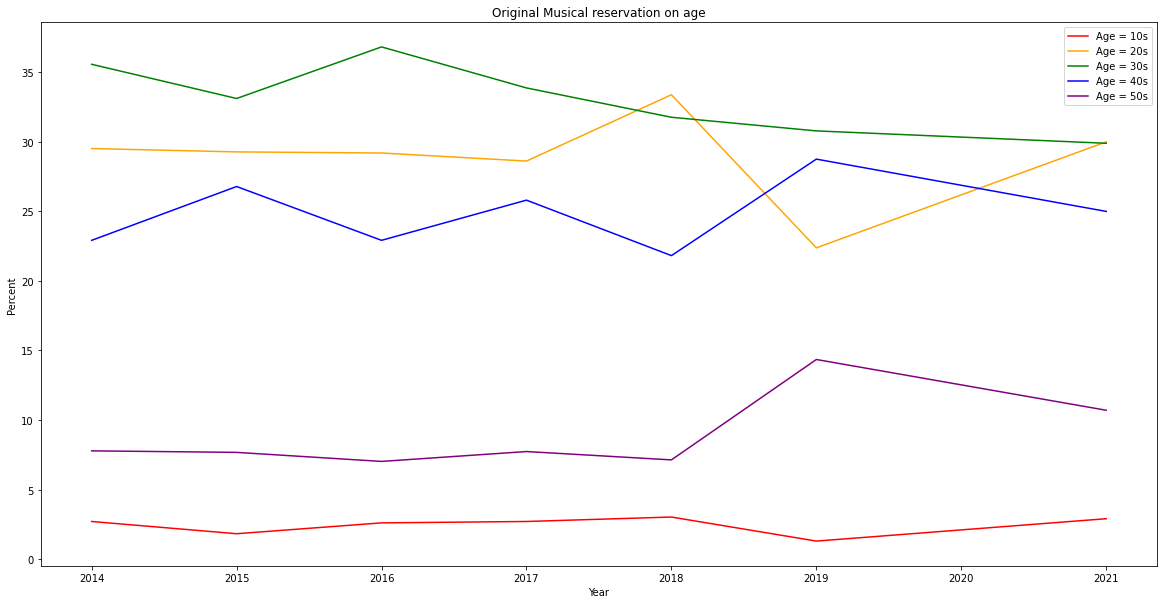

In [36]:
original_10 = [df_2014_f_10, df_2015_f_10, df_2016_f_10, df_2017_f_10, df_2018_f_10, df_2019_f_10, df_2021_f_10]
original_20 = [df_2014_f_20, df_2015_f_20, df_2016_f_20, df_2017_f_20, df_2018_f_20, df_2019_f_20, df_2021_f_20]
original_30 = [df_2014_f_30, df_2015_f_30, df_2016_f_30, df_2017_f_30, df_2018_f_30, df_2019_f_30, df_2021_f_30]
original_40 = [df_2014_f_40, df_2015_f_40, df_2016_f_40, df_2017_f_40, df_2018_f_40, df_2019_f_40, df_2021_f_40]
original_50 = [df_2014_f_50, df_2015_f_50, df_2016_f_50, df_2017_f_50, df_2018_f_50, df_2019_f_50, df_2021_f_50]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, original_10, color = 'red', label = 'Age = 10s')
plt.plot(x, original_20, color = 'orange', label = 'Age = 20s')
plt.plot(x, original_30, color = 'green', label = 'Age = 30s')
plt.plot(x, original_40, color = 'blue', label = 'Age = 40s')
plt.plot(x, original_50, color = 'purple', label = 'Age = 50s')
plt.title('Original Musical reservation on age')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_original_10 = round(np.array(original_10).dot(coeff_year), 2)
coeff_original_20 = round(np.array(original_20).dot(coeff_year), 2)
coeff_original_30 = round(np.array(original_30).dot(coeff_year), 2)
coeff_original_40 = round(np.array(original_40).dot(coeff_year), 2)
coeff_original_50 = round(np.array(original_50).dot(coeff_year), 2)
print("연도별 가중치를 적용한 오리지널 장르의 연령대별 관람 점수")
print("10대 : ", coeff_original_10)
print("20대 : ", coeff_original_20)
print("30대 : ", coeff_original_30)
print("40대 : ", coeff_original_40)
print("50대 : ", coeff_original_50)

### 퍼포먼스 장르

연도별 가중치를 적용한 퍼포먼스 장르의 연령대별 관람 점수
10대 :  4.0
20대 :  27.69
30대 :  102.64
40대 :  128.04
50대 :  14.32


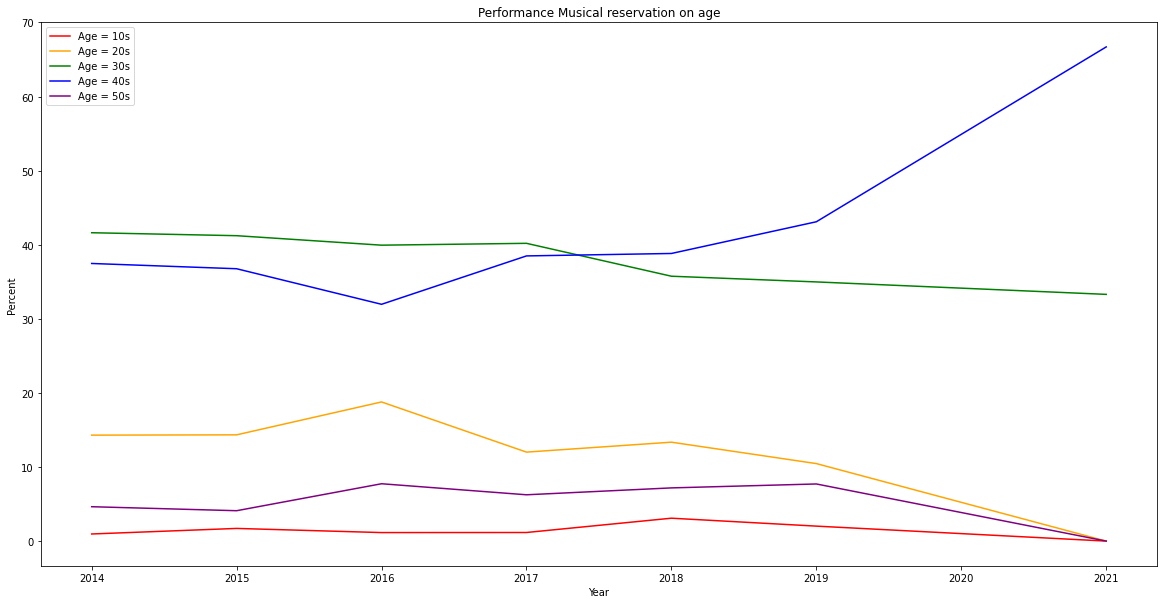

In [37]:
performance_10 = [df_2014_e_10, df_2015_e_10, df_2016_e_10, df_2017_e_10, df_2018_e_10, df_2019_e_10, df_2021_e_10]
performance_20 = [df_2014_e_20, df_2015_e_20, df_2016_e_20, df_2017_e_20, df_2018_e_20, df_2019_e_20, df_2021_e_20]
performance_30 = [df_2014_e_30, df_2015_e_30, df_2016_e_30, df_2017_e_30, df_2018_e_30, df_2019_e_30, df_2021_e_30]
performance_40 = [df_2014_e_40, df_2015_e_40, df_2016_e_40, df_2017_e_40, df_2018_e_40, df_2019_e_40, df_2021_e_40]
performance_50 = [df_2014_e_50, df_2015_e_50, df_2016_e_50, df_2017_e_50, df_2018_e_50, df_2019_e_50, df_2021_e_50]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, performance_10, color = 'red', label = 'Age = 10s')
plt.plot(x, performance_20, color = 'orange', label = 'Age = 20s')
plt.plot(x, performance_30, color = 'green', label = 'Age = 30s')
plt.plot(x, performance_40, color = 'blue', label = 'Age = 40s')
plt.plot(x, performance_50, color = 'purple', label = 'Age = 50s')
plt.title('Performance Musical reservation on age')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_performance_10 = round(np.array(performance_10).dot(coeff_year), 2)
coeff_performance_20 = round(np.array(performance_20).dot(coeff_year), 2)
coeff_performance_30 = round(np.array(performance_30).dot(coeff_year), 2)
coeff_performance_40 = round(np.array(performance_40).dot(coeff_year), 2)
coeff_performance_50 = round(np.array(performance_50).dot(coeff_year), 2)
print("연도별 가중치를 적용한 퍼포먼스 장르의 연령대별 관람 점수")
print("10대 : ", coeff_performance_10)
print("20대 : ", coeff_performance_20)
print("30대 : ", coeff_performance_30)
print("40대 : ", coeff_performance_40)
print("50대 : ", coeff_performance_50)

연도별 가중치를 적용한 어린이/가족 장르의 연령대별 관람 점수
10대 :  0.6
20대 :  11.54
30대 :  189.64
40대 :  73.28
50대 :  3.32


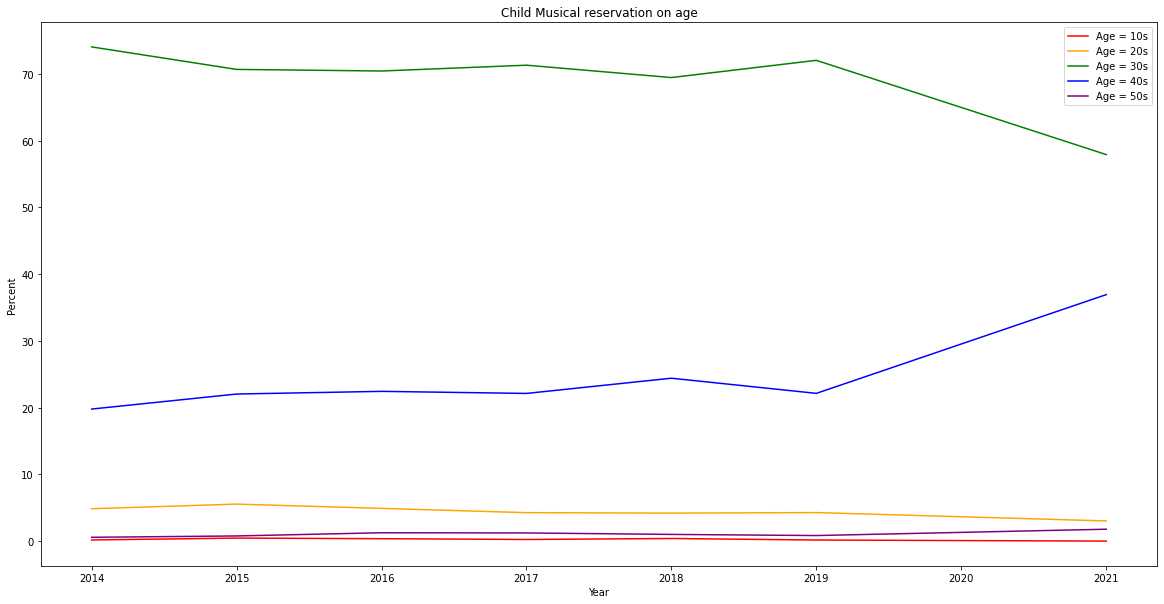

In [38]:
child_10 = [df_2014_d_10, df_2015_d_10, df_2016_d_10, df_2017_d_10, df_2018_d_10, df_2019_d_10, df_2021_d_10]
child_20 = [df_2014_d_20, df_2015_d_20, df_2016_d_20, df_2017_d_20, df_2018_d_20, df_2019_d_20, df_2021_d_20]
child_30 = [df_2014_d_30, df_2015_d_30, df_2016_d_30, df_2017_d_30, df_2018_d_30, df_2019_d_30, df_2021_d_30]
child_40 = [df_2014_d_40, df_2015_d_40, df_2016_d_40, df_2017_d_40, df_2018_d_40, df_2019_d_40, df_2021_d_40]
child_50 = [df_2014_d_50, df_2015_d_50, df_2016_d_50, df_2017_d_50, df_2018_d_50, df_2019_d_50, df_2021_d_50]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, child_10, color = 'red', label = 'Age = 10s')
plt.plot(x, child_20, color = 'orange', label = 'Age = 20s')
plt.plot(x, child_30, color = 'green', label = 'Age = 30s')
plt.plot(x, child_40, color = 'blue', label = 'Age = 40s')
plt.plot(x, child_50, color = 'purple', label = 'Age = 50s')
plt.title('Child Musical reservation on age')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_child_10 = round(np.array(child_10).dot(coeff_year), 2)
coeff_child_20 = round(np.array(child_20).dot(coeff_year), 2)
coeff_child_30 = round(np.array(child_30).dot(coeff_year), 2)
coeff_child_40 = round(np.array(child_40).dot(coeff_year), 2)
coeff_child_50 = round(np.array(child_50).dot(coeff_year), 2)
print("연도별 가중치를 적용한 어린이/가족 장르의 연령대별 관람 점수")
print("10대 : ", coeff_child_10)
print("20대 : ", coeff_child_20)
print("30대 : ", coeff_child_30)
print("40대 : ", coeff_child_40)
print("50대 : ", coeff_child_50)

연도별 가중치를 적용한 뮤지컬 장르의 연령대별 관람 점수
10대 :  8.7
20대 :  79.2
30대 :  96.46
40대 :  78.26
50대 :  13.69


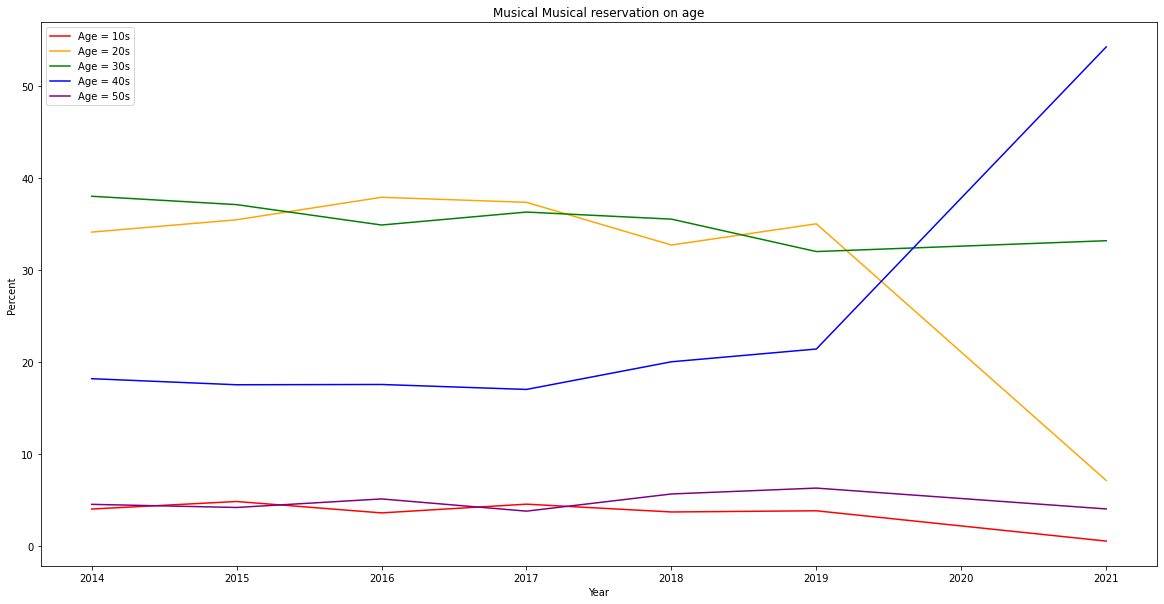

In [39]:
musical_10 = [df_2014_c_10, df_2015_c_10, df_2016_c_10, df_2017_c_10, df_2018_c_10, df_2019_c_10, df_2021_c_10]
musical_20 = [df_2014_c_20, df_2015_c_20, df_2016_c_20, df_2017_c_20, df_2018_c_20, df_2019_c_20, df_2021_c_20]
musical_30 = [df_2014_c_30, df_2015_c_30, df_2016_c_30, df_2017_c_30, df_2018_c_30, df_2019_c_30, df_2021_c_30]
musical_40 = [df_2014_c_40, df_2015_c_40, df_2016_c_40, df_2017_c_40, df_2018_c_40, df_2019_c_40, df_2021_c_40]
musical_50 = [df_2014_c_50, df_2015_c_50, df_2016_c_50, df_2017_c_50, df_2018_c_50, df_2019_c_50, df_2021_c_50]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, musical_10, color = 'red', label = 'Age = 10s')
plt.plot(x, musical_20, color = 'orange', label = 'Age = 20s')
plt.plot(x, musical_30, color = 'green', label = 'Age = 30s')
plt.plot(x, musical_40, color = 'blue', label = 'Age = 40s')
plt.plot(x, musical_50, color = 'purple', label = 'Age = 50s')
plt.title('Musical Musical reservation on age')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_musical_10 = round(np.array(musical_10).dot(coeff_year), 2)
coeff_musical_20 = round(np.array(musical_20).dot(coeff_year), 2)
coeff_musical_30 = round(np.array(musical_30).dot(coeff_year), 2)
coeff_musical_40 = round(np.array(musical_40).dot(coeff_year), 2)
coeff_musical_50 = round(np.array(musical_50).dot(coeff_year), 2)
print("연도별 가중치를 적용한 뮤지컬 장르의 연령대별 관람 점수")
print("10대 : ", coeff_musical_10)
print("20대 : ", coeff_musical_20)
print("30대 : ", coeff_musical_30)
print("40대 : ", coeff_musical_40)
print("50대 : ", coeff_musical_50)

연도별 가중치를 적용한 창작 장르의 연령대별 관람 점수
10대 :  14.76
20대 :  93.41
30대 :  91.21
40대 :  58.76
50대 :  17.81


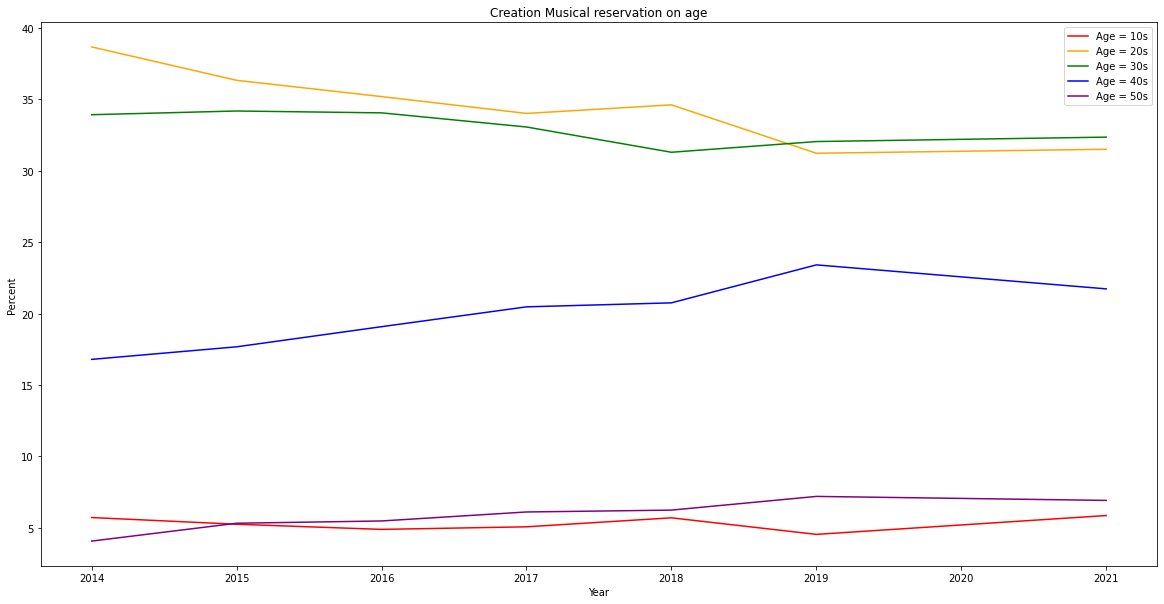

In [40]:
creation_10 = [df_2014_b_10, df_2015_b_10, df_2016_b_10, df_2017_b_10, df_2018_b_10, df_2019_b_10, df_2021_b_10]
creation_20 = [df_2014_b_20, df_2015_b_20, df_2016_b_20, df_2017_b_20, df_2018_b_20, df_2019_b_20, df_2021_b_20]
creation_30 = [df_2014_b_30, df_2015_b_30, df_2016_b_30, df_2017_b_30, df_2018_b_30, df_2019_b_30, df_2021_b_30]
creation_40 = [df_2014_b_40, df_2015_b_40, df_2016_b_40, df_2017_b_40, df_2018_b_40, df_2019_b_40, df_2021_b_40]
creation_50 = [df_2014_b_50, df_2015_b_50, df_2016_b_50, df_2017_b_50, df_2018_b_50, df_2019_b_50, df_2021_b_50]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, creation_10, color = 'red', label = 'Age = 10s')
plt.plot(x, creation_20, color = 'orange', label = 'Age = 20s')
plt.plot(x, creation_30, color = 'green', label = 'Age = 30s')
plt.plot(x, creation_40, color = 'blue', label = 'Age = 40s')
plt.plot(x, creation_50, color = 'purple', label = 'Age = 50s')
plt.title('Creation Musical reservation on age')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_creation_10 = round(np.array(creation_10).dot(coeff_year), 2)
coeff_creation_20 = round(np.array(creation_20).dot(coeff_year), 2)
coeff_creation_30 = round(np.array(creation_30).dot(coeff_year), 2)
coeff_creation_40 = round(np.array(creation_40).dot(coeff_year), 2)
coeff_creation_50 = round(np.array(creation_50).dot(coeff_year), 2)
print("연도별 가중치를 적용한 창작 장르의 연령대별 관람 점수")
print("10대 : ", coeff_creation_10)
print("20대 : ", coeff_creation_20)
print("30대 : ", coeff_creation_30)
print("40대 : ", coeff_creation_40)
print("50대 : ", coeff_creation_50)

연도별 가중치를 적용한 라이선스 장르의 연령대별 관람 점수
10대 :  13.03
20대 :  96.75
30대 :  93.95
40대 :  56.37
50대 :  16.53


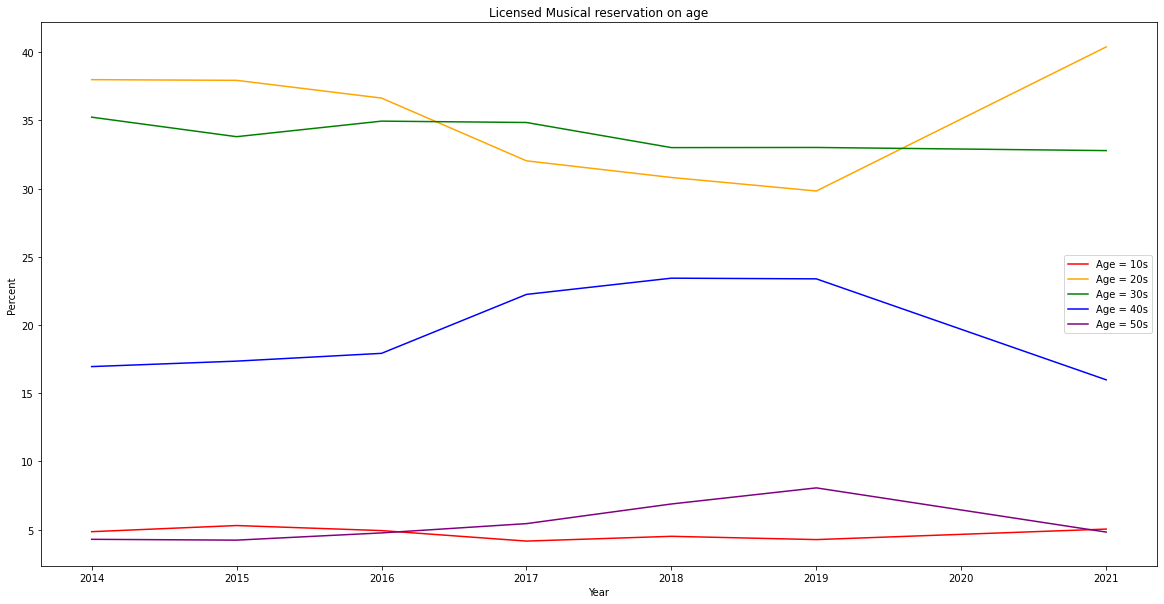

In [41]:
licensed_10 = [df_2014_a_10, df_2015_a_10, df_2016_a_10, df_2017_a_10, df_2018_a_10, df_2019_a_10, df_2021_a_10]
licensed_20 = [df_2014_a_20, df_2015_a_20, df_2016_a_20, df_2017_a_20, df_2018_a_20, df_2019_a_20, df_2021_a_20]
licensed_30 = [df_2014_a_30, df_2015_a_30, df_2016_a_30, df_2017_a_30, df_2018_a_30, df_2019_a_30, df_2021_a_30]
licensed_40 = [df_2014_a_40, df_2015_a_40, df_2016_a_40, df_2017_a_40, df_2018_a_40, df_2019_a_40, df_2021_a_40]
licensed_50 = [df_2014_a_50, df_2015_a_50, df_2016_a_50, df_2017_a_50, df_2018_a_50, df_2019_a_50, df_2021_a_50]
x = [2014, 2015, 2016, 2017, 2018, 2019, 2021]
plt.figure(figsize = (20, 10))
plt.plot(x, licensed_10, color = 'red', label = 'Age = 10s')
plt.plot(x, licensed_20, color = 'orange', label = 'Age = 20s')
plt.plot(x, licensed_30, color = 'green', label = 'Age = 30s')
plt.plot(x, licensed_40, color = 'blue', label = 'Age = 40s')
plt.plot(x, licensed_50, color = 'purple', label = 'Age = 50s')
plt.title('Licensed Musical reservation on age')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.plot()
coeff_licensed_10 = round(np.array(licensed_10).dot(coeff_year), 2)
coeff_licensed_20 = round(np.array(licensed_20).dot(coeff_year), 2)
coeff_licensed_30 = round(np.array(licensed_30).dot(coeff_year), 2)
coeff_licensed_40 = round(np.array(licensed_40).dot(coeff_year), 2)
coeff_licensed_50 = round(np.array(licensed_50).dot(coeff_year), 2)
print("연도별 가중치를 적용한 라이선스 장르의 연령대별 관람 점수")
print("10대 : ", coeff_licensed_10)
print("20대 : ", coeff_licensed_20)
print("30대 : ", coeff_licensed_30)
print("40대 : ", coeff_licensed_40)
print("50대 : ", coeff_licensed_50)

### 다음과 같은 결론을 얻을 수 있습니다

1. 장르마다 연령별 차이가 있다
- 오리지널의 경우 20, 30, 40 대가 모두 좋아함
- 퍼포먼스의 경우 30, 40대에서 선호함
- 어린이/가족의 경우 30대, 40대가 선호하나, 자녀들과 함께 관람하기 위함으로 보임
- 뮤지컬의 경우 20, 30, 40대가 각각 2강 1약의 체제이나, 최근 40대가 급증함
- 창작뮤지컬도 비슷한 경향을 보인다
- 라이선스도 창작 뮤지컬과 비슷한 경향을 보인다.

2. 점점 희석화되는 연령대별 차이
- 40대, 50대도 시간이 지나면서 뮤지컬 관람을 즐기는 경향이 점차 강해짐
- 특수시장인 어린이/가족을 제외한 모든 장르에서 50대의 비중이 높아지고 있음
- 현 추세로 보았을 때 퍼포먼스, 어린이/가족, 퍼포먼스를 제외한 모든 장르에서 20, 30, 40대 구분이 무의미해질 것으로 보임


# 연도별 연령대별 장르 선호도 분석

### 10대

[]

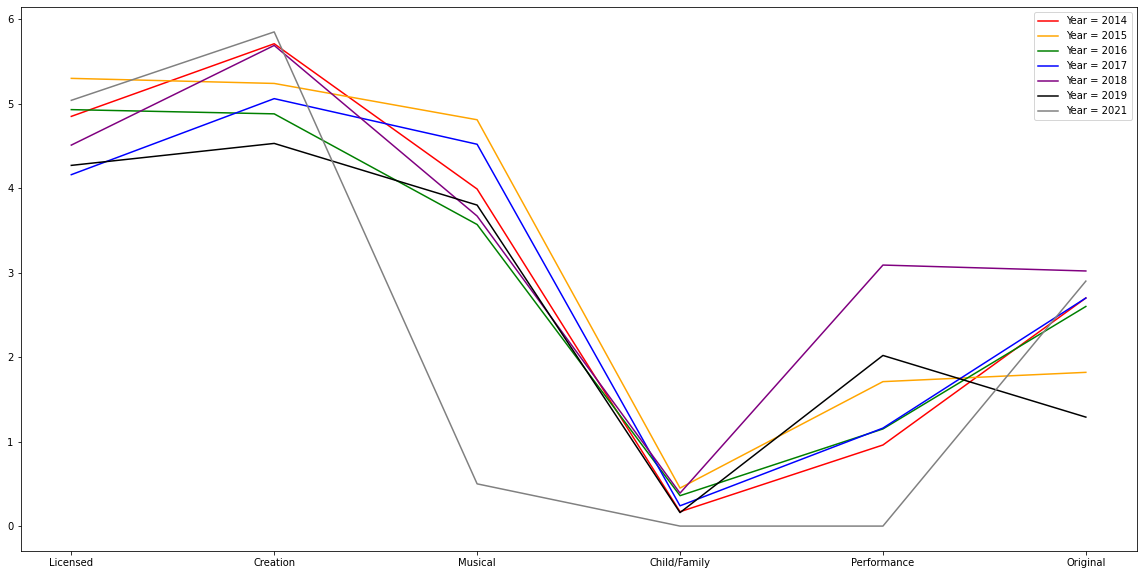

In [42]:
age_2014_10 = [df_2014_a_10, df_2014_b_10, df_2014_c_10, df_2014_d_10, df_2014_e_10, df_2014_f_10]
age_2015_10 = [df_2015_a_10, df_2015_b_10, df_2015_c_10, df_2015_d_10, df_2015_e_10, df_2015_f_10]
age_2016_10 = [df_2016_a_10, df_2016_b_10, df_2016_c_10, df_2016_d_10, df_2016_e_10, df_2016_f_10]
age_2017_10 = [df_2017_a_10, df_2017_b_10, df_2017_c_10, df_2017_d_10, df_2017_e_10, df_2017_f_10]
age_2018_10 = [df_2018_a_10, df_2018_b_10, df_2018_c_10, df_2018_d_10, df_2018_e_10, df_2018_f_10]
age_2019_10 = [df_2019_a_10, df_2019_b_10, df_2019_c_10, df_2019_d_10, df_2019_e_10, df_2019_f_10]
age_2021_10 = [df_2021_a_10, df_2021_b_10, df_2021_c_10, df_2021_d_10, df_2021_e_10, df_2021_f_10]
x = ['Licensed', 'Creation', 'Musical', 'Child/Family', 'Performance', 'Original']
plt.figure(figsize = (20, 10))
plt.plot(x, age_2014_10, color = 'red', label = 'Year = 2014')
plt.plot(x, age_2015_10, color = 'orange', label = 'Year = 2015')
plt.plot(x, age_2016_10, color = 'green', label = 'Year = 2016')
plt.plot(x, age_2017_10, color = 'blue', label = 'Year = 2017')
plt.plot(x, age_2018_10, color = 'purple', label = 'Year = 2018')
plt.plot(x, age_2019_10, color = 'black', label = 'Year = 2019')
plt.plot(x, age_2021_10, color = 'gray', label = 'Year = 2021')
plt.legend()
plt.plot()

### 20대

[]

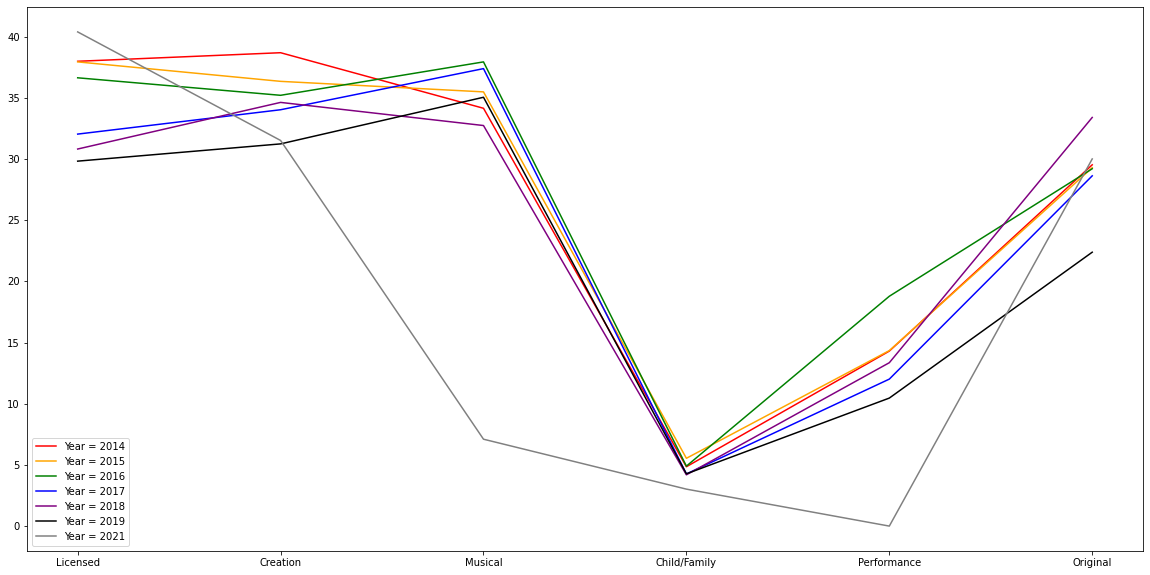

In [43]:
age_2014_20 = [df_2014_a_20, df_2014_b_20, df_2014_c_20, df_2014_d_20, df_2014_e_20, df_2014_f_20]
age_2015_20 = [df_2015_a_20, df_2015_b_20, df_2015_c_20, df_2015_d_20, df_2015_e_20, df_2015_f_20]
age_2016_20 = [df_2016_a_20, df_2016_b_20, df_2016_c_20, df_2016_d_20, df_2016_e_20, df_2016_f_20]
age_2017_20 = [df_2017_a_20, df_2017_b_20, df_2017_c_20, df_2017_d_20, df_2017_e_20, df_2017_f_20]
age_2018_20 = [df_2018_a_20, df_2018_b_20, df_2018_c_20, df_2018_d_20, df_2018_e_20, df_2018_f_20]
age_2019_20 = [df_2019_a_20, df_2019_b_20, df_2019_c_20, df_2019_d_20, df_2019_e_20, df_2019_f_20]
age_2021_20 = [df_2021_a_20, df_2021_b_20, df_2021_c_20, df_2021_d_20, df_2021_e_20, df_2021_f_20]
x = ['Licensed', 'Creation', 'Musical', 'Child/Family', 'Performance', 'Original']
plt.figure(figsize = (20, 10))
plt.plot(x, age_2014_20, color = 'red', label = 'Year = 2014')
plt.plot(x, age_2015_20, color = 'orange', label = 'Year = 2015')
plt.plot(x, age_2016_20, color = 'green', label = 'Year = 2016')
plt.plot(x, age_2017_20, color = 'blue', label = 'Year = 2017')
plt.plot(x, age_2018_20, color = 'purple', label = 'Year = 2018')
plt.plot(x, age_2019_20, color = 'black', label = 'Year = 2019')
plt.plot(x, age_2021_20, color = 'gray', label = 'Year = 2021')
plt.legend()
plt.plot()

### 30대

[]

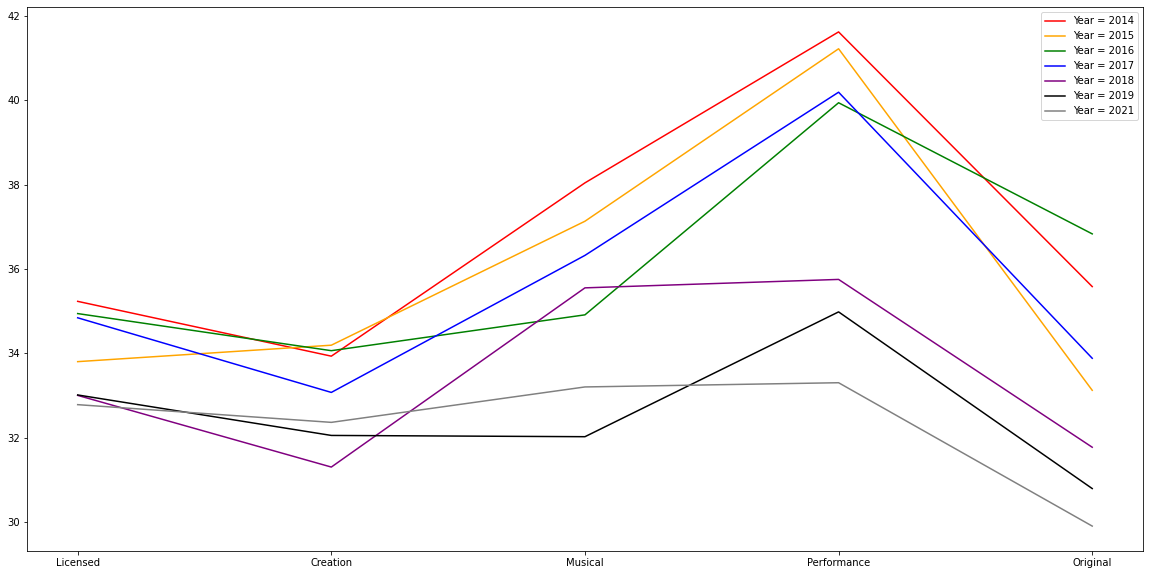

In [44]:
age_2014_30 = [df_2014_a_30, df_2014_b_30, df_2014_c_30, df_2014_e_30, df_2014_f_30]
age_2015_30 = [df_2015_a_30, df_2015_b_30, df_2015_c_30, df_2015_e_30, df_2015_f_30]
age_2016_30 = [df_2016_a_30, df_2016_b_30, df_2016_c_30, df_2016_e_30, df_2016_f_30]
age_2017_30 = [df_2017_a_30, df_2017_b_30, df_2017_c_30, df_2017_e_30, df_2017_f_30]
age_2018_30 = [df_2018_a_30, df_2018_b_30, df_2018_c_30, df_2018_e_30, df_2018_f_30]
age_2019_30 = [df_2019_a_30, df_2019_b_30, df_2019_c_30, df_2019_e_30, df_2019_f_30]
age_2021_30 = [df_2021_a_30, df_2021_b_30, df_2021_c_30, df_2021_e_30, df_2021_f_30]
x = ['Licensed', 'Creation', 'Musical', 'Performance', 'Original']
plt.figure(figsize = (20, 10))
plt.plot(x, age_2014_30, color = 'red', label = 'Year = 2014')
plt.plot(x, age_2015_30, color = 'orange', label = 'Year = 2015')
plt.plot(x, age_2016_30, color = 'green', label = 'Year = 2016')
plt.plot(x, age_2017_30, color = 'blue', label = 'Year = 2017')
plt.plot(x, age_2018_30, color = 'purple', label = 'Year = 2018')
plt.plot(x, age_2019_30, color = 'black', label = 'Year = 2019')
plt.plot(x, age_2021_30, color = 'gray', label = 'Year = 2021')
plt.legend()
plt.plot()

### 40대

[]

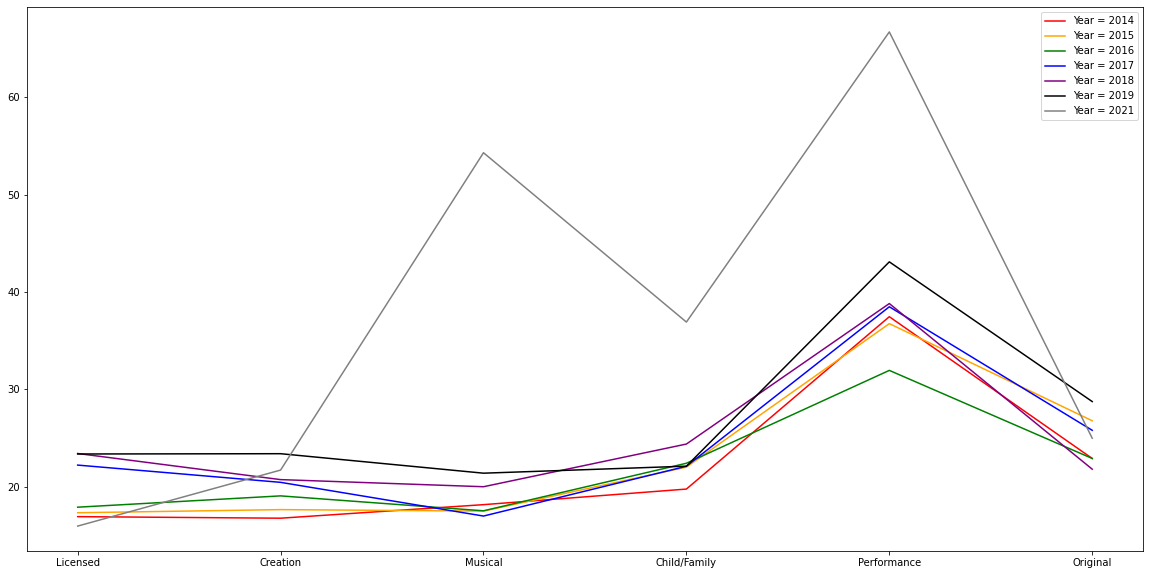

In [45]:
age_2014_40 = [df_2014_a_40, df_2014_b_40, df_2014_c_40, df_2014_d_40, df_2014_e_40, df_2014_f_40]
age_2015_40 = [df_2015_a_40, df_2015_b_40, df_2015_c_40, df_2015_d_40, df_2015_e_40, df_2015_f_40]
age_2016_40 = [df_2016_a_40, df_2016_b_40, df_2016_c_40, df_2016_d_40, df_2016_e_40, df_2016_f_40]
age_2017_40 = [df_2017_a_40, df_2017_b_40, df_2017_c_40, df_2017_d_40, df_2017_e_40, df_2017_f_40]
age_2018_40 = [df_2018_a_40, df_2018_b_40, df_2018_c_40, df_2018_d_40, df_2018_e_40, df_2018_f_40]
age_2019_40 = [df_2019_a_40, df_2019_b_40, df_2019_c_40, df_2019_d_40, df_2019_e_40, df_2019_f_40]
age_2021_40 = [df_2021_a_40, df_2021_b_40, df_2021_c_40, df_2021_d_40, df_2021_e_40, df_2021_f_40]
x = ['Licensed', 'Creation', 'Musical', 'Child/Family', 'Performance', 'Original']
plt.figure(figsize = (20, 10))
plt.plot(x, age_2014_40, color = 'red', label = 'Year = 2014')
plt.plot(x, age_2015_40, color = 'orange', label = 'Year = 2015')
plt.plot(x, age_2016_40, color = 'green', label = 'Year = 2016')
plt.plot(x, age_2017_40, color = 'blue', label = 'Year = 2017')
plt.plot(x, age_2018_40, color = 'purple', label = 'Year = 2018')
plt.plot(x, age_2019_40, color = 'black', label = 'Year = 2019')
plt.plot(x, age_2021_40, color = 'gray', label = 'Year = 2021')
plt.legend()
plt.plot()

### 50대

[]

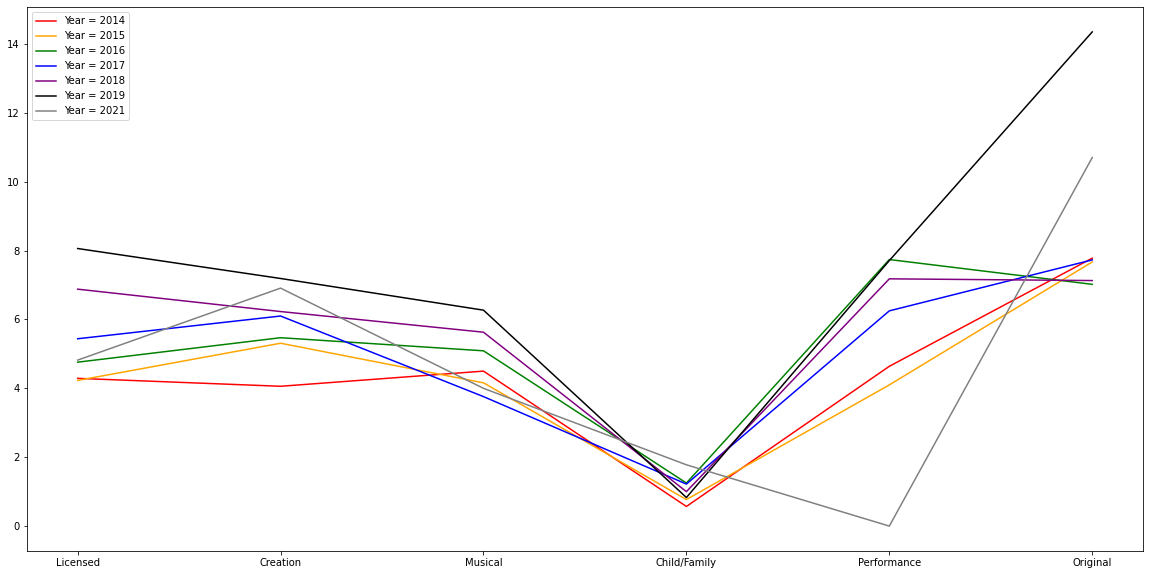

In [46]:
age_2014_50 = [df_2014_a_50, df_2014_b_50, df_2014_c_50, df_2014_d_50, df_2014_e_50, df_2014_f_50]
age_2015_50 = [df_2015_a_50, df_2015_b_50, df_2015_c_50, df_2015_d_50, df_2015_e_50, df_2015_f_50]
age_2016_50 = [df_2016_a_50, df_2016_b_50, df_2016_c_50, df_2016_d_50, df_2016_e_50, df_2016_f_50]
age_2017_50 = [df_2017_a_50, df_2017_b_50, df_2017_c_50, df_2017_d_50, df_2017_e_50, df_2017_f_50]
age_2018_50 = [df_2018_a_50, df_2018_b_50, df_2018_c_50, df_2018_d_50, df_2018_e_50, df_2018_f_50]
age_2019_50 = [df_2019_a_50, df_2019_b_50, df_2019_c_50, df_2019_d_50, df_2019_e_50, df_2019_f_50]
age_2021_50 = [df_2021_a_50, df_2021_b_50, df_2021_c_50, df_2021_d_50, df_2021_e_50, df_2021_f_50]
x = ['Licensed', 'Creation', 'Musical', 'Child/Family', 'Performance', 'Original']
plt.figure(figsize = (20, 10))
plt.plot(x, age_2014_50, color = 'red', label = 'Year = 2014')
plt.plot(x, age_2015_50, color = 'orange', label = 'Year = 2015')
plt.plot(x, age_2016_50, color = 'green', label = 'Year = 2016')
plt.plot(x, age_2017_50, color = 'blue', label = 'Year = 2017')
plt.plot(x, age_2018_50, color = 'purple', label = 'Year = 2018')
plt.plot(x, age_2019_50, color = 'black', label = 'Year = 2019')
plt.plot(x, age_2021_50, color = 'gray', label = 'Year = 2021')
plt.legend()
plt.plot()

### 알 수 있는 점
- 예전에 관람객의 대부분을 차지했던 연령대는 시간이 흐르면서 그래프가 점차 평탄화되는 반면
- 예전에 관람을 잘 안했던 연령대는 시간이 흐르면서 점점 Peak 구간이 강해짐
- 시간이 흐르면서 예전에는 뮤지컬을 잘 안봤던 연령대가 뮤지컬을 찾고 있다고 볼 수 있음
- 혹은 뮤지컬을 좋아하던 세대가 나이가 먹어서도 뮤지컬을 찾게 되는 것으로도 볼 수 있음

# 사용자가 성별과 나이를 입력하면 뮤지컬 추천해주는 알고리즘

In [47]:
df_total = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2021])
df_total = df_total.dropna(axis=0)

In [48]:
df_total.index = [i for i in range(0, len(df_total))]
df_total['Unnamed: 0'] = ['musical' + str(j) for j in range(1, len(df_total)+1)]
df_total

,Unnamed: 0,title,genre,period,place,rating,rating_person,actor,percent_man,percent_woman,percent_10,percent_20,percent_30,percent_40,percent_50
0,musical1,킹키부츠,라이선스,2014/12/02 ~ 2015/02/22,충무아트센터 대극장,9.4,3695.0,[],24.1,75.9,2.8,36.5,38.2,17.2,4.6
1,musical2,싱잉인더레인,라이선스,2014/06/05 ~ 2014/08/03,충무아트센터 대극장,8.7,1351.0,[],17.9,82.1,10.8,41.1,21.8,21.2,4.2
2,musical3,총각네 야채가게,창작,2014/11/21 ~ 2015/01/01,KT&G 상상마당 대치아트홀,8.8,192.0,[],6.5,93.5,17.6,51.3,21.2,7.7,1.7
3,musical4,지킬 앤 하이드,라이선스,2014/11/21 ~ 2015/04/05,블루스퀘어 신한카드홀 (구 인터파크홀),9.4,11338.0,[],24.4,75.6,3.7,38.6,38.3,15.1,3.6
4,musical5,드라큘라,라이선스,2014/07/15 ~ 2014/09/05,예술의전당 오페라극장,9.4,5234.0,[],9.2,90.8,7.7,46.3,28.3,13.9,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,musical4408,페인터즈,뮤지컬,2013/11/01 ~ 오픈런,페인터즈 종로전용관,9.3,96.0,[],29.1,70.9,0.5,7.1,33.2,54.3,4.0
4408,musical4409,천로역정,창작,2019/07/13 ~ 2021/03/01,북촌아트홀,10.0,55.0,[],27.4,72.6,0.9,22.2,33.3,35.9,6.8
4409,musical4410,알라딘과 자스민공주 - 대구,어린이/가족,2021/02/14 ~ 2021/03/01,대구 대백프라자 프라임홀,10.0,1.0,[],36.8,63.2,0.0,5.3,63.2,26.3,5.3
4410,musical4411,세례요한,창작,2019/12/21 ~ 2021/03/01,북촌나래홀,10.0,8.0,[],42.9,57.1,3.6,25.0,35.7,25.0,7.1


In [49]:
title_list = np.array(df_total['title'])

In [50]:
'''
실패지수 낮추기
- 아래 요소들에 대해서 환산 점수에 대한 가점을 부여하여 순위 매기기
1) 매년 열리는 공연
2) 평점이 꾸준히 높거나 상승하는 공연
3) 평가인이 많은 공연
4) 연령대별 장르 우선순위
'''

'\n실패지수 낮추기\n- 아래 요소들에 대해서 환산 점수에 대한 가점을 부여하여 순위 매기기\n1) 매년 열리는 공연\n2) 평점이 꾸준히 높거나 상승하는 공연\n3) 평가인이 많은 공연\n4) 연령대별 장르 우선순위\n'

### 성별과 나이 입력

In [51]:
your_gender = input("성별을 입력하세요(남자/여자) : ")
your_age = int(input("나이를 입력하세요 : "))

성별을 입력하세요(남자/여자) : 여자
나이를 입력하세요 : 25


#### 연령대별 구분

In [52]:
if your_age < 20:
    ages = 10
elif your_age < 30:
    ages = 20
elif your_age < 40:
    ages = 30
elif your_age < 50:
    ages = 40
else:
    ages = 50

#### 성별 구분

In [53]:
if your_gender == '남자':
    gender = 'm'
elif your_gender == '여자':
    gender = 'w'
else:
    print("We don't have choice")

#### 연령대별 장르 추천 순서

In [54]:
# 장르에 대한 연령별 가산점
coeff_age_genre = 3.5

genre_seq = ['라이선스', '창작', '뮤지컬', '어린이/가족', '퍼포먼스', '오리지널']

coeff_10_genre = [coeff_licensed_10, coeff_creation_10, coeff_musical_10, coeff_child_10, coeff_performance_10, coeff_original_10 ]
coeff_20_genre = [coeff_licensed_20, coeff_creation_20, coeff_musical_20, coeff_child_20, coeff_performance_20, coeff_original_20 ]
coeff_30_genre = [coeff_licensed_30, coeff_creation_30, coeff_musical_30, coeff_child_30, coeff_performance_30, coeff_original_30 ]
coeff_40_genre = [coeff_licensed_40, coeff_creation_40, coeff_musical_40, coeff_child_40, coeff_performance_40, coeff_original_40 ]
coeff_50_genre = [coeff_licensed_50, coeff_creation_50, coeff_musical_50, coeff_child_50, coeff_performance_50, coeff_original_50 ]

coeff_10_genre_conv = [round(x/max(coeff_10_genre),7) for x in coeff_10_genre]
coeff_20_genre_conv = [round(x/max(coeff_20_genre),7) for x in coeff_20_genre]
coeff_30_genre_conv = [round(x/max(coeff_30_genre),7) for x in coeff_30_genre]
coeff_40_genre_conv = [round(x/max(coeff_40_genre),7) for x in coeff_40_genre]
coeff_50_genre_conv = [round(x/max(coeff_50_genre),7) for x in coeff_50_genre]

dict_10_genre = dict(zip(genre_seq, coeff_10_genre_conv))
dict_20_genre = dict(zip(genre_seq, coeff_20_genre_conv))
dict_30_genre = dict(zip(genre_seq, coeff_30_genre_conv))
dict_40_genre = dict(zip(genre_seq, coeff_40_genre_conv))
dict_50_genre = dict(zip(genre_seq, coeff_50_genre_conv))

print("10대 : ", dict_10_genre)
print("20대 : ", dict_20_genre)
print("30대 : ", dict_30_genre)
print("40대 : ", dict_40_genre)
print("50대 : ", dict_50_genre)

genre_point_dict = {}

for title in title_list:
    index = df_total[df_total['title'] == title].index[0]
    if ages == 10:
        for genre in genre_seq:
            if df_total[df_total['title'] == title]['genre'][index] == genre:
                genre_point_dict[title] = dict_10_genre[genre]
    elif ages == 20:
        for genre in genre_seq:
            if df_total[df_total['title'] == title]['genre'][index] == genre:
                genre_point_dict[title] = dict_20_genre[genre]
    elif ages == 30:
        for genre in genre_seq:
            if df_total[df_total['title'] == title]['genre'][index] == genre:
                genre_point_dict[title] = dict_30_genre[genre]
    elif ages == 40:
        for genre in genre_seq:
            if df_total[df_total['title'] == title]['genre'][index] == genre:
                genre_point_dict[title] = dict_40_genre[genre]
    elif ages == 50:
        for genre in genre_seq:
            if df_total[df_total['title'] == title]['genre'][index] == genre:
                genre_point_dict[title] = dict_50_genre[genre]
                
print(genre_point_dict)

10대 :  {'라이선스': 0.8827913, '창작': 1.0, '뮤지컬': 0.5894309, '어린이/가족': 0.0406504, '퍼포먼스': 0.2710027, '오리지널': 0.4613821}
20대 :  {'라이선스': 1.0, '창작': 0.965478, '뮤지컬': 0.8186047, '어린이/가족': 0.1192765, '퍼포먼스': 0.2862016, '오리지널': 0.8283204}
30대 :  {'라이선스': 0.4954124, '창작': 0.4809639, '뮤지컬': 0.508648, '어린이/가족': 1.0, '퍼포먼스': 0.541236, '오리지널': 0.4749525}
40대 :  {'라이선스': 0.440253, '창작': 0.4589191, '뮤지컬': 0.6112152, '어린이/가족': 0.5723211, '퍼포먼스': 1.0, '오리지널': 0.5507654}
50대 :  {'라이선스': 0.6081678, '창작': 0.6552612, '뮤지컬': 0.5036792, '어린이/가족': 0.1221486, '퍼포먼스': 0.526858, '오리지널': 1.0}
{'킹키부츠': 1.0, '싱잉인더레인': 1.0, '총각네 야채가게': 0.965478, '지킬 앤 하이드': 1.0, '드라큘라': 1.0, '풀 하우스': 0.965478, '태양왕': 1.0, '봄날은 간다': 0.8186047, '쇼크': 0.2862016, '또봇 아빠의 노래': 0.1192765, '프랑켄슈타인': 0.965478, '담배가게 아가씨': 0.8186047, '서편제': 0.965478, '모차르트! ': 1.0, '라카지': 1.0, '셜록홈즈': 0.965478, '마리 앙투아네트': 1.0, '삼총사': 1.0, '보니앤클라이드': 1.0, '사춘기': 0.8186047, '해를 품은 달': 0.965478, '레베카': 1.0, '그날들': 0.965478, '조로': 1.0, '더 데빌': 0.965478, '올슉업': 0.

#### 성별 장르 추천

In [55]:
coeff_gender_genre = 3.5

genre_seq = ['라이선스', '창작', '뮤지컬', '어린이/가족', '퍼포먼스', '오리지널']

coeff_m_genre = [coeff_licensed_m, coeff_creation_m, coeff_musical_m, coeff_child_m, coeff_performance_m, coeff_original_m ]
coeff_w_genre = [coeff_licensed_w, coeff_creation_w, coeff_musical_w, coeff_child_w, coeff_performance_w, coeff_original_w ]

coeff_m_genre_conv = [round(x/max(coeff_m_genre),7) for x in coeff_m_genre]
coeff_w_genre_conv = [round(x/max(coeff_w_genre),7) for x in coeff_w_genre]

dict_m_genre = dict(zip(genre_seq, coeff_m_genre_conv))
dict_w_genre = dict(zip(genre_seq, coeff_w_genre_conv))

print("남성 : ", dict_m_genre)
print("여성 : ", dict_w_genre)

genre_gender_point_dict = {}

for title in title_list:
    index = df_total[df_total['title'] == title].index[0]
    if gender == 'm':
        for genre in genre_seq:
            if df_total[df_total['title'] == title]['genre'][index] == genre:
                genre_gender_point_dict[title] = dict_m_genre[genre]
    elif gender == 'w':
        for genre in genre_seq:
            if df_total[df_total['title'] == title]['genre'][index] == genre:
                genre_gender_point_dict[title] = dict_w_genre[genre]
    else:
        print("Error occured")

                
print(genre_gender_point_dict)

남성 :  {'라이선스': 0.6192604, '창작': 0.710982, '뮤지컬': 0.6624958, '어린이/가족': 0.8059435, '퍼포먼스': 1.0, '오리지널': 0.8604625}
여성 :  {'라이선스': 1.0, '창작': 0.9634412, '뮤지컬': 0.9827671, '어린이/가족': 0.9255911, '퍼포먼스': 0.8482878, '오리지널': 0.9038607}
{'킹키부츠': 1.0, '싱잉인더레인': 1.0, '총각네 야채가게': 0.9634412, '지킬 앤 하이드': 1.0, '드라큘라': 1.0, '풀 하우스': 0.9634412, '태양왕': 1.0, '봄날은 간다': 0.9827671, '쇼크': 0.8482878, '또봇 아빠의 노래': 0.9255911, '프랑켄슈타인': 0.9634412, '담배가게 아가씨': 0.9827671, '서편제': 0.9634412, '모차르트! ': 1.0, '라카지': 1.0, '셜록홈즈': 0.9634412, '마리 앙투아네트': 1.0, '삼총사': 1.0, '보니앤클라이드': 1.0, '사춘기': 0.9827671, '해를 품은 달': 0.9634412, '레베카': 1.0, '그날들': 0.9634412, '조로': 1.0, '더 데빌': 0.9634412, '올슉업': 0.9827671, '노트르담 드 파리': 1.0, '황태자 루돌프': 1.0, '꽃신': 0.9634412, '블러드 브라더스': 1.0, '모차르트!': 1.0, '미스터쇼': 0.9827671, '원스': 1.0, '해를 품은 달 ': 0.9634412, '시카고': 1.0, '드립걸즈': 0.9634412, '사운드 오브 뮤직': 0.9827671, '보이첵': 0.9827671, '셜록홈즈2': 0.9827671, '들풀2': 0.9827671, '달콤 살벌한 연인': 0.9827671, '헤드윅': 1.0, '사랑은 비를 타고': 0.9634412, '용의자 X의 헌신': 0.96344

#### 여러번 열리는 공연에 대한 가중치
- 매년 열리는 극은 잘되서 열릴 가능성이 높으므로 이에 대한 가중치 산정

In [56]:
# 반복 공연에 대한 가중치
coeff_count = 0.5

name_dict = {}

for name in title_list:
    if name not in name_dict:
        name_dict[name] = 1
    else:
        name_dict[name] += 1

keys = list(name_dict.keys())
values = list(name_dict.values())
values_conv = [round(x*coeff_count/max(values), 7) for x in values]

name_dict_conv = dict(zip(keys, values_conv))
name_dict_conv

{'킹키부츠': 0.1363636,
 '싱잉인더레인': 0.0454545,
 '총각네 야채가게': 0.1363636,
 '지킬 앤 하이드': 0.1363636,
 '드라큘라': 0.1363636,
 '풀 하우스': 0.0454545,
 '태양왕': 0.0454545,
 '봄날은 간다': 0.0909091,
 '쇼크': 0.1363636,
 '또봇 아빠의 노래': 0.0454545,
 '프랑켄슈타인': 0.0909091,
 '담배가게 아가씨': 0.1363636,
 '서편제': 0.0454545,
 '모차르트! ': 0.0909091,
 '라카지': 0.0454545,
 '셜록홈즈': 0.0454545,
 '마리 앙투아네트': 0.0909091,
 '삼총사': 0.1363636,
 '보니앤클라이드': 0.0454545,
 '사춘기': 0.0454545,
 '해를 품은 달': 0.0454545,
 '레베카': 0.1818182,
 '그날들': 0.2272727,
 '조로': 0.0454545,
 '더 데빌': 0.1363636,
 '올슉업': 0.1363636,
 '노트르담 드 파리': 0.1818182,
 '황태자 루돌프': 0.0454545,
 '꽃신': 0.0454545,
 '블러드 브라더스': 0.0454545,
 '모차르트!': 0.0909091,
 '미스터쇼': 0.2727273,
 '원스': 0.0909091,
 '해를 품은 달 ': 0.0454545,
 '시카고': 0.1363636,
 '드립걸즈': 0.2272727,
 '사운드 오브 뮤직': 0.0454545,
 '보이첵': 0.0454545,
 '셜록홈즈2': 0.0454545,
 '들풀2': 0.0454545,
 '달콤 살벌한 연인': 0.0454545,
 '헤드윅': 0.1818182,
 '사랑은 비를 타고': 0.1363636,
 '용의자 X의 헌신': 0.0454545,
 '영웅': 0.2272727,
 '김종욱 찾기': 0.0909091,
 '여신님이 보고 계셔': 0.1818182,


#### 뮤지컬 평점에 대한 점수

In [57]:
# 평점 가중치
coeff_rating = 0.7

rating_list = list(df_total['rating'])

dict_rating = dict(zip(title_list, list(np.round(np.array(rating_list)/10*coeff_rating, 7))))
dict_rating

{'킹키부츠': 0.679,
 '싱잉인더레인': 0.609,
 '총각네 야채가게': 0.651,
 '지킬 앤 하이드': 0.672,
 '드라큘라': 0.63,
 '풀 하우스': 0.616,
 '태양왕': 0.483,
 '봄날은 간다': 0.644,
 '쇼크': 0.679,
 '또봇 아빠의 노래': 0.588,
 '프랑켄슈타인': 0.658,
 '담배가게 아가씨': 0.651,
 '서편제': 0.644,
 '모차르트! ': 0.63,
 '라카지': 0.651,
 '셜록홈즈': 0.637,
 '마리 앙투아네트': 0.651,
 '삼총사': 0.665,
 '보니앤클라이드': 0.658,
 '사춘기': 0.602,
 '해를 품은 달': 0.602,
 '레베카': 0.665,
 '그날들': 0.665,
 '조로': 0.651,
 '더 데빌': 0.651,
 '올슉업': 0.651,
 '노트르담 드 파리': 0.63,
 '황태자 루돌프': 0.644,
 '꽃신': 0.658,
 '블러드 브라더스': 0.63,
 '모차르트!': 0.602,
 '미스터쇼': 0.665,
 '원스': 0.602,
 '해를 품은 달 ': 0.574,
 '시카고': 0.644,
 '드립걸즈': 0.602,
 '사운드 오브 뮤직': 0.609,
 '보이첵': 0.574,
 '셜록홈즈2': 0.609,
 '들풀2': 0.644,
 '달콤 살벌한 연인': 0.679,
 '헤드윅': 0.679,
 '사랑은 비를 타고': 0.644,
 '용의자 X의 헌신': 0.644,
 '영웅': 0.665,
 '김종욱 찾기': 0.644,
 '여신님이 보고 계셔': 0.679,
 '캣츠': 0.658,
 '뮤지컬 이야기쇼 이석준과 함께 10주년': 0.672,
 '블랙메리포핀스': 0.651,
 '러브레터': 0.651,
 '백설공주를 사랑한 난장이': 0.595,
 '사운드 오브 뮤직 ': 0.672,
 '글루미데이': 0.644,
 '카붐': 0.616,
 '당신만이': 0.672,
 '카페인': 0.658,
 

#### 평점을 남긴 사람 숫자에 대한 가중치

In [58]:
# 인원수 점수
coeff_people = 0.4

people_list = np.round(np.array(df_total['rating_person'])/1001,7)

dict_people = dict(zip(title_list, people_list))
dict_people


{'킹키부츠': 2.8701299,
 '싱잉인더레인': 1.3496503,
 '총각네 야채가게': 0.3056943,
 '지킬 앤 하이드': 0.4705295,
 '드라큘라': 0.7102897,
 '풀 하우스': 1.3356643,
 '태양왕': 1.6663337,
 '봄날은 간다': 0.2357642,
 '쇼크': 0.017982,
 '또봇 아빠의 노래': 0.4635365,
 '프랑켄슈타인': 13.7842158,
 '담배가게 아가씨': 0.0779221,
 '서편제': 1.4125874,
 '모차르트! ': 0.0509491,
 '라카지': 2.4675325,
 '셜록홈즈': 0.9480519,
 '마리 앙투아네트': 1.6583417,
 '삼총사': 1.2177822,
 '보니앤클라이드': 2.016983,
 '사춘기': 3.4805195,
 '해를 품은 달': 0.7702298,
 '레베카': 3.4325674,
 '그날들': 1.1938062,
 '조로': 2.046953,
 '더 데빌': 4.5424575,
 '올슉업': 0.5264735,
 '노트르담 드 파리': 4.3406593,
 '황태자 루돌프': 2.5674326,
 '꽃신': 0.0599401,
 '블러드 브라더스': 2.2197802,
 '모차르트!': 2.4075924,
 '미스터쇼': 1.6143856,
 '원스': 0.7562438,
 '해를 품은 달 ': 0.0609391,
 '시카고': 1.5584416,
 '드립걸즈': 0.1188811,
 '사운드 오브 뮤직': 0.2427572,
 '보이첵': 0.4225774,
 '셜록홈즈2': 0.5104895,
 '들풀2': 0.1138861,
 '달콤 살벌한 연인': 0.0729271,
 '헤드윅': 4.8291708,
 '사랑은 비를 타고': 0.6833167,
 '용의자 X의 헌신': 1.0979021,
 '영웅': 1.4065934,
 '김종욱 찾기': 2.5614386,
 '여신님이 보고 계셔': 7.5954046,
 '

### 위 사항 점수 총합하여 뮤지컬 추천

In [61]:
# 점수 종합

total_point = []

for title in title_list:
    point = np.round(coeff_age_genre * genre_point_dict[title] + coeff_gender_genre * genre_gender_point_dict[title] + coeff_count * name_dict_conv[title] + coeff_rating * dict_rating[title] + coeff_people * dict_people[title], 4)
    total_point.append(point)

temp_list = total_point.copy()
temp_list = list(set(temp_list))
temp_list.sort(reverse = True)
final_nom = temp_list[:10]

print(f"{ages}대 {your_gender}이 선호하는 뮤지컬 상위 10위입니다.\n")
for i in range(len(final_nom)):
    index = total_point.index(final_nom[i])
    musical = title_list[index]
    print(f"{i+1}위 : {musical}")
    print(f"환산점수 : {final_nom[i]}")
    print("\n")

20대 여자이 선호하는 뮤지컬 상위 10위입니다.

1위 : 프랑켄슈타인
환산점수 : 12.771


2위 : 사의찬미
환산점수 : 12.7123


3위 : 엘리자벳
환산점수 : 11.3667


4위 : 빌리 엘리어트
환산점수 : 10.9006


5위 : 배니싱
환산점수 : 10.4168


6위 : 팬레터
환산점수 : 10.3997


7위 : 여신님이 보고 계셔
환산점수 : 10.3556


8위 : 웃는 남자
환산점수 : 9.8508


9위 : 비스티
환산점수 : 9.8171


10위 : 베어 더 뮤지컬
환산점수 : 9.6717




남성 50대
뮤지컬 :  프랑켄슈타인  / 점수 :  10.8016
뮤지컬 :  사의찬미  / 점수 :  10.7429
뮤지컬 :  엘리자벳  / 점수 :  8.6627
뮤지컬 :  팬레터  / 점수 :  8.4303
뮤지컬 :  여신님이 보고 계셔  / 점수 :  8.3862
뮤지컬 :  빌리 엘리어트  / 점수 :  8.1966
뮤지컬 :  배니싱  / 점수 :  8.1936
뮤지컬 :  노트르담 드 파리 내한공연  / 점수 :  8.0672
뮤지컬 :  웃는 남자  / 점수 :  7.8815
뮤지컬 :  비스티  / 점수 :  7.8477

여자 20대
뮤지컬 :  프랑켄슈타인  / 점수 :  12.771
뮤지컬 :  사의찬미  / 점수 :  12.7123
뮤지컬 :  엘리자벳  / 점수 :  11.3667
뮤지컬 :  빌리 엘리어트  / 점수 :  10.9006
뮤지컬 :  배니싱  / 점수 :  10.4168
뮤지컬 :  팬레터  / 점수 :  10.3997
뮤지컬 :  여신님이 보고 계셔  / 점수 :  10.3556
뮤지컬 :  웃는 남자  / 점수 :  9.8508
뮤지컬 :  비스티  / 점수 :  9.8171
뮤지컬 :  베어 더 뮤지컬  / 점수 :  9.6717